*Author:* Adedoyin Simeon Adeyemi


Air Pollution TimeSeries Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

C:\Users\computer science\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pollution_data = pd.read_csv("dataset/Recived Manchester data.csv")

C:\Users\computer science\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,5,7,9,15,17,19,21,23,25,27,29,31,33,35,39,43,45,47,49,55,57,59,61,63,65,67,69,71,79,83,85,87,89,91) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
pollution_data.head()

Hourly measurement data supplied by UK-air on 10/09/2022 Unnamed: 1  \
0                           All Data GMT hour ending              NaN   
1  Status: V=Verified P=Provisionaly Verified N=N...              NaN   
2                                                NaN              NaN   
3                                               Date             Time   
4                                         01/01/2010         01:00:00   

         Unnamed: 2 Unnamed: 3                                 Unnamed: 4  \
0               NaN        NaN                                        NaN   
1               NaN        NaN                                        NaN   
2    Bury Prestwich        NaN                                        NaN   
3  Nitrogen dioxide     Status  PM10 particulate matter (Hourly measured)   
4           No data        NaN                                    No data   

  Unnamed: 5        Unnamed: 6 Unnamed: 7  \
0        NaN               NaN        NaN   
1        NaN               NaN        NaN   
2        NaN    Bury Radcliffe        NaN   
3     Status  Nitrogen dioxide     Status   
4        NaN           No data        NaN   

                                  Unnamed: 8 Unnamed: 9  ...  \
0                                        NaN        NaN  ...   
1                                        NaN        NaN  ...   
2                                        NaN        NaN  ...   
3  PM10 particulate matter (Hourly measured)     Status  ...   
4                                    No data        NaN  ...   

                 Unnamed: 82 Unnamed: 83       Unnamed: 84 Unnamed: 85  \
0                        NaN         NaN               NaN         NaN   
1                        NaN         NaN               NaN         NaN   
2  Trafford Wellacre Academy         NaN     Wigan Leigh 2         NaN   
3           Nitrogen dioxide      Status  Nitrogen dioxide      Status   
4                    No data         NaN                15     V ugm-3   

                                 Unnamed: 86           Unnamed: 87  \
0                                        NaN                   NaN   
1                                        NaN                   NaN   
2                                        NaN                   NaN   
3  PM10 particulate matter (Hourly measured)                Status   
4                                         20  V ugm-3 (INDIC.GRAV)   

                                 Unnamed: 88 Unnamed: 89  \
0                                        NaN         NaN   
1                                        NaN         NaN   
2                              Wigan Leigh 3         NaN   
3  PM10 particulate matter (Hourly measured)      Status   
4                                    No data         NaN   

                                  Unnamed: 90 Unnamed: 91  
0                                         NaN         NaN  
1                                         NaN         NaN  
2                                         NaN         NaN  
3  PM2.5 particulate matter (Hourly measured)      Status  
4                                     No data         NaN  

[5 rows x 92 columns]

## Deleting some irrelevant rows

In [4]:
pollution_data.drop(index=[0,1,2], axis=0, inplace=True)

In [5]:
pollution_data.head()

Hourly measurement data supplied by UK-air on 10/09/2022 Unnamed: 1  \
3                                               Date             Time   
4                                         01/01/2010         01:00:00   
5                                         01/01/2010         02:00:00   
6                                         01/01/2010         03:00:00   
7                                         01/01/2010         04:00:00   

         Unnamed: 2 Unnamed: 3                                 Unnamed: 4  \
3  Nitrogen dioxide     Status  PM10 particulate matter (Hourly measured)   
4           No data        NaN                                    No data   
5           No data        NaN                                    No data   
6           No data        NaN                                    No data   
7           No data        NaN                                    No data   

  Unnamed: 5        Unnamed: 6 Unnamed: 7  \
3     Status  Nitrogen dioxide     Status   
4        NaN           No data        NaN   
5        NaN           No data        NaN   
6        NaN           No data        NaN   
7        NaN           No data        NaN   

                                  Unnamed: 8 Unnamed: 9  ...  \
3  PM10 particulate matter (Hourly measured)     Status  ...   
4                                    No data        NaN  ...   
5                                    No data        NaN  ...   
6                                    No data        NaN  ...   
7                                    No data        NaN  ...   

        Unnamed: 82 Unnamed: 83       Unnamed: 84 Unnamed: 85  \
3  Nitrogen dioxide      Status  Nitrogen dioxide      Status   
4           No data         NaN                15     V ugm-3   
5           No data         NaN                21     V ugm-3   
6           No data         NaN                19     V ugm-3   
7           No data         NaN                17     V ugm-3   

                                 Unnamed: 86           Unnamed: 87  \
3  PM10 particulate matter (Hourly measured)                Status   
4                                         20  V ugm-3 (INDIC.GRAV)   
5                                         14  V ugm-3 (INDIC.GRAV)   
6                                         13  V ugm-3 (INDIC.GRAV)   
7                                          7  V ugm-3 (INDIC.GRAV)   

                                 Unnamed: 88 Unnamed: 89  \
3  PM10 particulate matter (Hourly measured)      Status   
4                                    No data         NaN   
5                                    No data         NaN   
6                                    No data         NaN   
7                                    No data         NaN   

                                  Unnamed: 90 Unnamed: 91  
3  PM2.5 particulate matter (Hourly measured)      Status  
4                                     No data         NaN  
5                                     No data         NaN  
6                                     No data         NaN  
7                                     No data         NaN  

[5 rows x 92 columns]

## Changing column names

In [6]:
pollution_data.iloc[0].values

array(['Date', 'Time', 'Nitrogen dioxide', 'Status',
       'PM10 particulate matter (Hourly measured)', 'Status',
       'Nitrogen dioxide', 'Status',
       'PM10 particulate matter (Hourly measured)', 'Status',
       'Nitrogen dioxide', 'Status',
       'PM10 particulate matter (Hourly measured)', 'Status',
       'Carbon monoxide', 'Status', 'Sulphur dioxide', 'Status',
       'Sulphur dioxide', 'Status',
       'PM10 particulate matter (Hourly measured)', 'Status', 'Ozone',
       'Status', 'Nitrogen dioxide', 'Status', 'Sulphur dioxide',
       'Status', 'Carbon monoxide', 'Status',
       'PM10 particulate matter (Hourly measured)', 'Status', 'Ozone',
       'Status', 'Ozone', 'Status', 'Nitrogen dioxide', 'Status',
       'Carbon monoxide', 'Status',
       'PM10 particulate matter (Hourly measured)', 'Status',
       'PM2.5 particulate matter (Hourly measured)', 'Status',
       'Nitrogen dioxide', 'Status',
       'PM10 particulate matter (Hourly measured)', 'Status', 'Ozone

In [7]:
curr_colnames = pollution_data.columns
new_colnames = [f'{col}_{i}' for i,col in enumerate(pollution_data.iloc[0].values)]

In [8]:
len(curr_colnames) == len(new_colnames)

True

In [9]:
col_mapper = {curr_colnames[i]:new_colnames[i] for i in range(len(new_colnames))}

In [10]:
col_mapper

{'Hourly measurement data supplied by UK-air on 10/09/2022': 'Date_0',
 'Unnamed: 1': 'Time_1',
 'Unnamed: 2': 'Nitrogen dioxide_2',
 'Unnamed: 3': 'Status_3',
 'Unnamed: 4': 'PM10 particulate matter (Hourly measured)_4',
 'Unnamed: 5': 'Status_5',
 'Unnamed: 6': 'Nitrogen dioxide_6',
 'Unnamed: 7': 'Status_7',
 'Unnamed: 8': 'PM10 particulate matter (Hourly measured)_8',
 'Unnamed: 9': 'Status_9',
 'Unnamed: 10': 'Nitrogen dioxide_10',
 'Unnamed: 11': 'Status_11',
 'Unnamed: 12': 'PM10 particulate matter (Hourly measured)_12',
 'Unnamed: 13': 'Status_13',
 'Unnamed: 14': 'Carbon monoxide_14',
 'Unnamed: 15': 'Status_15',
 'Unnamed: 16': 'Sulphur dioxide_16',
 'Unnamed: 17': 'Status_17',
 'Unnamed: 18': 'Sulphur dioxide_18',
 'Unnamed: 19': 'Status_19',
 'Unnamed: 20': 'PM10 particulate matter (Hourly measured)_20',
 'Unnamed: 21': 'Status_21',
 'Unnamed: 22': 'Ozone_22',
 'Unnamed: 23': 'Status_23',
 'Unnamed: 24': 'Nitrogen dioxide_24',
 'Unnamed: 25': 'Status_25',
 'Unnamed: 26': 'S

In [11]:
pollution_data.rename(columns=col_mapper, inplace=True)
pollution_data.head()

Date_0    Time_1 Nitrogen dioxide_2 Status_3  \
3        Date      Time   Nitrogen dioxide   Status   
4  01/01/2010  01:00:00            No data      NaN   
5  01/01/2010  02:00:00            No data      NaN   
6  01/01/2010  03:00:00            No data      NaN   
7  01/01/2010  04:00:00            No data      NaN   

  PM10 particulate matter (Hourly measured)_4 Status_5 Nitrogen dioxide_6  \
3   PM10 particulate matter (Hourly measured)   Status   Nitrogen dioxide   
4                                     No data      NaN            No data   
5                                     No data      NaN            No data   
6                                     No data      NaN            No data   
7                                     No data      NaN            No data   

  Status_7 PM10 particulate matter (Hourly measured)_8 Status_9  ...  \
3   Status   PM10 particulate matter (Hourly measured)   Status  ...   
4      NaN                                     No data      NaN  ...   
5      NaN                                     No data      NaN  ...   
6      NaN                                     No data      NaN  ...   
7      NaN                                     No data      NaN  ...   

  Nitrogen dioxide_82 Status_83 Nitrogen dioxide_84 Status_85  \
3    Nitrogen dioxide    Status    Nitrogen dioxide    Status   
4             No data       NaN                  15   V ugm-3   
5             No data       NaN                  21   V ugm-3   
6             No data       NaN                  19   V ugm-3   
7             No data       NaN                  17   V ugm-3   

  PM10 particulate matter (Hourly measured)_86             Status_87  \
3    PM10 particulate matter (Hourly measured)                Status   
4                                           20  V ugm-3 (INDIC.GRAV)   
5                                           14  V ugm-3 (INDIC.GRAV)   
6                                           13  V ugm-3 (INDIC.GRAV)   
7                                            7  V ugm-3 (INDIC.GRAV)   

  PM10 particulate matter (Hourly measured)_88 Status_89  \
3    PM10 particulate matter (Hourly measured)    Status   
4                                      No data       NaN   
5                                      No data       NaN   
6                                      No data       NaN   
7                                      No data       NaN   

  PM2.5 particulate matter (Hourly measured)_90 Status_91  
3    PM2.5 particulate matter (Hourly measured)    Status  
4                                       No data       NaN  
5                                       No data       NaN  
6                                       No data       NaN  
7                                       No data       NaN  

[5 rows x 92 columns]

In [12]:
pollution_data.drop(index=3, axis=0, inplace=True)
pollution_data.head()

Date_0    Time_1 Nitrogen dioxide_2 Status_3  \
4  01/01/2010  01:00:00            No data      NaN   
5  01/01/2010  02:00:00            No data      NaN   
6  01/01/2010  03:00:00            No data      NaN   
7  01/01/2010  04:00:00            No data      NaN   
8  01/01/2010  05:00:00            No data      NaN   

  PM10 particulate matter (Hourly measured)_4 Status_5 Nitrogen dioxide_6  \
4                                     No data      NaN            No data   
5                                     No data      NaN            No data   
6                                     No data      NaN            No data   
7                                     No data      NaN            No data   
8                                     No data      NaN            No data   

  Status_7 PM10 particulate matter (Hourly measured)_8 Status_9  ...  \
4      NaN                                     No data      NaN  ...   
5      NaN                                     No data      NaN  ...   
6      NaN                                     No data      NaN  ...   
7      NaN                                     No data      NaN  ...   
8      NaN                                     No data      NaN  ...   

  Nitrogen dioxide_82 Status_83 Nitrogen dioxide_84 Status_85  \
4             No data       NaN                  15   V ugm-3   
5             No data       NaN                  21   V ugm-3   
6             No data       NaN                  19   V ugm-3   
7             No data       NaN                  17   V ugm-3   
8             No data       NaN                  25   V ugm-3   

  PM10 particulate matter (Hourly measured)_86             Status_87  \
4                                           20  V ugm-3 (INDIC.GRAV)   
5                                           14  V ugm-3 (INDIC.GRAV)   
6                                           13  V ugm-3 (INDIC.GRAV)   
7                                            7  V ugm-3 (INDIC.GRAV)   
8                                            8  V ugm-3 (INDIC.GRAV)   

  PM10 particulate matter (Hourly measured)_88 Status_89  \
4                                      No data       NaN   
5                                      No data       NaN   
6                                      No data       NaN   
7                                      No data       NaN   
8                                      No data       NaN   

  PM2.5 particulate matter (Hourly measured)_90 Status_91  
4                                       No data       NaN  
5                                       No data       NaN  
6                                       No data       NaN  
7                                       No data       NaN  
8                                       No data       NaN  

[5 rows x 92 columns]

## Dropping all status columns since it's not useful for our work

In [15]:
status_cols = [col for col in pollution_data.columns if col.lower().startswith('status')]
status_cols

[]

In [14]:
pollution_data.drop(columns=status_cols, inplace=True)
pollution_data.head()

Date_0    Time_1 Nitrogen dioxide_2  \
4  01/01/2010  01:00:00            No data   
5  01/01/2010  02:00:00            No data   
6  01/01/2010  03:00:00            No data   
7  01/01/2010  04:00:00            No data   
8  01/01/2010  05:00:00            No data   

  PM10 particulate matter (Hourly measured)_4 Nitrogen dioxide_6  \
4                                     No data            No data   
5                                     No data            No data   
6                                     No data            No data   
7                                     No data            No data   
8                                     No data            No data   

  PM10 particulate matter (Hourly measured)_8 Nitrogen dioxide_10  \
4                                     No data             No data   
5                                     No data             No data   
6                                     No data             No data   
7                                     No data             No data   
8                                     No data             No data   

  PM10 particulate matter (Hourly measured)_12 Carbon monoxide_14  \
4                                      No data            No data   
5                                      No data                0.3   
6                                      No data            No data   
7                                      No data                0.5   
8                                      No data                0.3   

  Sulphur dioxide_16  ... Nitrogen dioxide_72  \
4            No data  ...                  57   
5            No data  ...                  69   
6            No data  ...                  73   
7            No data  ...                  59   
8            No data  ...                  73   

  PM10 particulate matter (Hourly measured)_74 Nitrogen dioxide_76  \
4                                           34                  69   
5                                           65                  73   
6                                           43                  63   
7                                           23                  57   
8                                           25                  57   

  Sulphur dioxide_78 PM10 particulate matter (Hourly measured)_80  \
4                  3                                           69   
5            No data                                           48   
6                  0                                           29   
7                  0                                           16   
8                  0                                           10   

  Nitrogen dioxide_82 Nitrogen dioxide_84  \
4             No data                  15   
5             No data                  21   
6             No data                  19   
7             No data                  17   
8             No data                  25   

  PM10 particulate matter (Hourly measured)_86  \
4                                           20   
5                                           14   
6                                           13   
7                                            7   
8                                            8   

  PM10 particulate matter (Hourly measured)_88  \
4                                      No data   
5                                      No data   
6                                      No data   
7                                      No data   
8                                      No data   

  PM2.5 particulate matter (Hourly measured)_90  
4                                       No data  
5                                       No data  
6                                       No data  
7                                       No data  
8                                       No data  

[5 rows x 47 columns]

## Grouping the columns by pollutant type

In order of Pollutant to find the average of each pollutant type values

In [16]:
cols = list(pollution_data.columns[2:]).copy()
cols.sort()

In [17]:
cols

['Carbon monoxide_14',
 'Carbon monoxide_28',
 'Carbon monoxide_38',
 'Carbon monoxide_58',
 'Nitrogen dioxide_10',
 'Nitrogen dioxide_2',
 'Nitrogen dioxide_24',
 'Nitrogen dioxide_36',
 'Nitrogen dioxide_44',
 'Nitrogen dioxide_50',
 'Nitrogen dioxide_54',
 'Nitrogen dioxide_6',
 'Nitrogen dioxide_62',
 'Nitrogen dioxide_68',
 'Nitrogen dioxide_72',
 'Nitrogen dioxide_76',
 'Nitrogen dioxide_82',
 'Nitrogen dioxide_84',
 'Ozone_22',
 'Ozone_32',
 'Ozone_34',
 'Ozone_48',
 'Ozone_66',
 'PM10 particulate matter (Hourly measured)_12',
 'PM10 particulate matter (Hourly measured)_20',
 'PM10 particulate matter (Hourly measured)_30',
 'PM10 particulate matter (Hourly measured)_4',
 'PM10 particulate matter (Hourly measured)_40',
 'PM10 particulate matter (Hourly measured)_46',
 'PM10 particulate matter (Hourly measured)_52',
 'PM10 particulate matter (Hourly measured)_60',
 'PM10 particulate matter (Hourly measured)_64',
 'PM10 particulate matter (Hourly measured)_70',
 'PM10 particulate m

In [18]:
sorted_cols = list(pollution_data.columns[:2])
sorted_cols.extend(cols)

sorted_pollution_data = pollution_data[sorted_cols]
sorted_pollution_data.head()

Date_0    Time_1 Carbon monoxide_14 Carbon monoxide_28  \
4  01/01/2010  01:00:00            No data            No data   
5  01/01/2010  02:00:00                0.3            No data   
6  01/01/2010  03:00:00            No data            No data   
7  01/01/2010  04:00:00                0.5            No data   
8  01/01/2010  05:00:00                0.3            No data   

  Carbon monoxide_38 Carbon monoxide_58 Nitrogen dioxide_10  \
4                0.1                0.2             No data   
5                0.1                0.1             No data   
6                0.1                0.2             No data   
7                0.1                0.1             No data   
8                0.1                0.1             No data   

  Nitrogen dioxide_2 Nitrogen dioxide_24 Nitrogen dioxide_36  ...  \
4            No data             No data                  11  ...   
5            No data             No data                  13  ...   
6            No data             No data                  11  ...   
7            No data             No data                  11  ...   
8            No data             No data                   8  ...   

  PM10 particulate matter (Hourly measured)_80  \
4                                           69   
5                                           48   
6                                           29   
7                                           16   
8                                           10   

  PM10 particulate matter (Hourly measured)_86  \
4                                           20   
5                                           14   
6                                           13   
7                                            7   
8                                            8   

  PM10 particulate matter (Hourly measured)_88  \
4                                      No data   
5                                      No data   
6                                      No data   
7                                      No data   
8                                      No data   

  PM2.5 particulate matter (Hourly measured)_42  \
4                                       No data   
5                                       No data   
6                                       No data   
7                                       No data   
8                                       No data   

  PM2.5 particulate matter (Hourly measured)_90 Sulphur dioxide_16  \
4                                       No data            No data   
5                                       No data            No data   
6                                       No data            No data   
7                                       No data            No data   
8                                       No data            No data   

  Sulphur dioxide_18 Sulphur dioxide_26 Sulphur dioxide_56 Sulphur dioxide_78  
4                  0            No data                  0                  3  
5                  0            No data                  0            No data  
6                  0            No data                  0                  0  
7                  0            No data                  0                  0  
8                  0            No data                  0                  0  

[5 rows x 47 columns]

## Replacing the "No data" values with NaN

In [19]:
sorted_pollution_data.replace(to_replace='No data', value=np.NaN, inplace=True)

In [20]:
sorted_pollution_data.tail()

Date_0    Time_1 Carbon monoxide_14 Carbon monoxide_28  \
88395  1/31/2020  24:00:00                NaN                NaN   
88396        NaN       NaN                NaN                NaN   
88397        NaN       NaN                NaN                NaN   
88398        NaN       NaN                NaN                NaN   
88399        End       NaN                NaN                NaN   

      Carbon monoxide_38 Carbon monoxide_58 Nitrogen dioxide_10  \
88395                NaN                NaN            33.77788   
88396                NaN                NaN                 NaN   
88397                NaN                NaN                 NaN   
88398                NaN                NaN                 NaN   
88399                NaN                NaN                 NaN   

      Nitrogen dioxide_2 Nitrogen dioxide_24 Nitrogen dioxide_36  ...  \
88395                NaN                 NaN            50.83813  ...   
88396                NaN                 NaN                 NaN  ...   
88397                NaN                 NaN                 NaN  ...   
88398                NaN                 NaN                 NaN  ...   
88399                NaN                 NaN                 NaN  ...   

      PM10 particulate matter (Hourly measured)_80  \
88395                                          5.8   
88396                                          NaN   
88397                                          NaN   
88398                                          NaN   
88399                                          NaN   

      PM10 particulate matter (Hourly measured)_86  \
88395                                          NaN   
88396                                          NaN   
88397                                          NaN   
88398                                          NaN   
88399                                          NaN   

      PM10 particulate matter (Hourly measured)_88  \
88395                                          NaN   
88396                                          NaN   
88397                                          NaN   
88398                                          NaN   
88399                                          NaN   

      PM2.5 particulate matter (Hourly measured)_42  \
88395                                             5   
88396                                           NaN   
88397                                           NaN   
88398                                           NaN   
88399                                           NaN   

      PM2.5 particulate matter (Hourly measured)_90 Sulphur dioxide_16  \
88395                                           NaN            1.61256   
88396                                           NaN                NaN   
88397                                           NaN                NaN   
88398                                           NaN                NaN   
88399                                           NaN                NaN   

      Sulphur dioxide_18 Sulphur dioxide_26 Sulphur dioxide_56  \
88395                NaN                NaN                NaN   
88396                NaN                NaN                NaN   
88397                NaN                NaN                NaN   
88398                NaN                NaN                NaN   
88399                NaN                NaN                NaN   

      Sulphur dioxide_78  
88395                NaN  
88396                NaN  
88397                NaN  
88398                NaN  
88399                NaN  

[5 rows x 47 columns]

In [21]:
# Deleting last few rows containing only null values

sorted_pollution_data.drop(index=list(range(88396,88400)), axis=0, inplace=True)
sorted_pollution_data.tail()

Date_0    Time_1 Carbon monoxide_14 Carbon monoxide_28  \
88391  1/31/2020  20:00:00                NaN                NaN   
88392  1/31/2020  21:00:00                NaN                NaN   
88393  1/31/2020  22:00:00                NaN                NaN   
88394  1/31/2020  23:00:00                NaN                NaN   
88395  1/31/2020  24:00:00                NaN                NaN   

      Carbon monoxide_38 Carbon monoxide_58 Nitrogen dioxide_10  \
88391                NaN                NaN            42.96237   
88392                NaN                NaN            57.72267   
88393                NaN                NaN            39.38095   
88394                NaN                NaN            45.56025   
88395                NaN                NaN            33.77788   

      Nitrogen dioxide_2 Nitrogen dioxide_24 Nitrogen dioxide_36  ...  \
88391                NaN                 NaN            85.20076  ...   
88392                NaN                 NaN            77.81878  ...   
88393                NaN                 NaN            73.42622  ...   
88394                NaN                 NaN            65.28533  ...   
88395                NaN                 NaN            50.83813  ...   

      PM10 particulate matter (Hourly measured)_80  \
88391                                            0   
88392                                          1.9   
88393                                            1   
88394                                            0   
88395                                          5.8   

      PM10 particulate matter (Hourly measured)_86  \
88391                                          NaN   
88392                                          NaN   
88393                                          NaN   
88394                                          NaN   
88395                                          NaN   

      PM10 particulate matter (Hourly measured)_88  \
88391                                          NaN   
88392                                          NaN   
88393                                          NaN   
88394                                          NaN   
88395                                          NaN   

      PM2.5 particulate matter (Hourly measured)_42  \
88391                                             7   
88392                                             8   
88393                                             6   
88394                                             2   
88395                                             5   

      PM2.5 particulate matter (Hourly measured)_90 Sulphur dioxide_16  \
88391                                           NaN            1.40223   
88392                                           NaN            1.40223   
88393                                           NaN            1.40223   
88394                                           NaN            1.26201   
88395                                           NaN            1.61256   

      Sulphur dioxide_18 Sulphur dioxide_26 Sulphur dioxide_56  \
88391                NaN                NaN                NaN   
88392                NaN                NaN                NaN   
88393                NaN                NaN                NaN   
88394                NaN                NaN                NaN   
88395                NaN                NaN                NaN   

      Sulphur dioxide_78  
88391                NaN  
88392                NaN  
88393                NaN  
88394                NaN  
88395                NaN  

[5 rows x 47 columns]

In [22]:
# Moderating the datatype of some columns from object into floating point

data_temp = sorted_pollution_data[sorted_pollution_data.columns[2:]]
data_temp = data_temp.astype(np.float32)

In [23]:
# Merging moderated datatypes with other existing columns (fields)

sorted_pollution_data = pd.concat([sorted_pollution_data[['Date_0','Time_1']], data_temp], axis='columns')

## Grouping same pollutants in order to extract the maximum value

In [24]:
CO = sorted_pollution_data[[x for x in sorted_pollution_data.columns if x.lower().startswith('carbon monoxide')]]
NO2 = sorted_pollution_data[[x for x in sorted_pollution_data.columns if x.lower().startswith('nitrogen dioxide')]]
SO2 = sorted_pollution_data[[x for x in sorted_pollution_data.columns if x.lower().startswith('sulphur dioxide')]]
PM10_hr = sorted_pollution_data[[x for x in sorted_pollution_data.columns if x.lower().startswith('pm10')]]
PM25_hr = sorted_pollution_data[[x for x in sorted_pollution_data.columns if x.lower().startswith('pm2.5')]]
Ozone = sorted_pollution_data[[x for x in sorted_pollution_data.columns if x.lower().startswith('ozone')]]

In [25]:
CO.head()

Carbon monoxide_14  Carbon monoxide_28  Carbon monoxide_38  \
4                 NaN                 NaN                 0.1   
5                 0.3                 NaN                 0.1   
6                 NaN                 NaN                 0.1   
7                 0.5                 NaN                 0.1   
8                 0.3                 NaN                 0.1   

   Carbon monoxide_58  
4                 0.2  
5                 0.1  
6                 0.2  
7                 0.1  
8                 0.1

In [26]:
CO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88392 entries, 4 to 88395
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Carbon monoxide_14  16575 non-null  float32
 1   Carbon monoxide_28  7999 non-null   float32
 2   Carbon monoxide_38  13226 non-null  float32
 3   Carbon monoxide_58  8327 non-null   float32
dtypes: float32(4)
memory usage: 2.0 MB


In [27]:
NO2.head()

Nitrogen dioxide_10  Nitrogen dioxide_2  Nitrogen dioxide_24  \
4                  NaN                 NaN                  NaN   
5                  NaN                 NaN                  NaN   
6                  NaN                 NaN                  NaN   
7                  NaN                 NaN                  NaN   
8                  NaN                 NaN                  NaN   

   Nitrogen dioxide_36  Nitrogen dioxide_44  Nitrogen dioxide_50  \
4                 11.0                  NaN                 61.0   
5                 13.0                  NaN                 55.0   
6                 11.0                  NaN                 65.0   
7                 11.0                  NaN                 69.0   
8                  8.0                  NaN                 65.0   

   Nitrogen dioxide_54  Nitrogen dioxide_6  Nitrogen dioxide_62  \
4                 42.0                 NaN                  NaN   
5                 40.0                 NaN                  NaN   
6                 38.0                 NaN                  NaN   
7                 31.0                 NaN                  NaN   
8                 27.0                 NaN                  NaN   

   Nitrogen dioxide_68  Nitrogen dioxide_72  Nitrogen dioxide_76  \
4                  NaN                 57.0                 69.0   
5                  NaN                 69.0                 73.0   
6                  NaN                 73.0                 63.0   
7                  NaN                 59.0                 57.0   
8                  NaN                 73.0                 57.0   

   Nitrogen dioxide_82  Nitrogen dioxide_84  
4                  NaN                 15.0  
5                  NaN                 21.0  
6                  NaN                 19.0  
7                  NaN                 17.0  
8                  NaN                 25.0

In [28]:
NO2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88392 entries, 4 to 88395
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nitrogen dioxide_10  79681 non-null  float32
 1   Nitrogen dioxide_2   52781 non-null  float32
 2   Nitrogen dioxide_24  7895 non-null   float32
 3   Nitrogen dioxide_36  84897 non-null  float32
 4   Nitrogen dioxide_44  30385 non-null  float32
 5   Nitrogen dioxide_50  78404 non-null  float32
 6   Nitrogen dioxide_54  8952 non-null   float32
 7   Nitrogen dioxide_6   54321 non-null  float32
 8   Nitrogen dioxide_62  51361 non-null  float32
 9   Nitrogen dioxide_68  51413 non-null  float32
 10  Nitrogen dioxide_72  80689 non-null  float32
 11  Nitrogen dioxide_76  84117 non-null  float32
 12  Nitrogen dioxide_82  53003 non-null  float32
 13  Nitrogen dioxide_84  21830 non-null  float32
dtypes: float32(14)
memory usage: 5.4 MB


In [29]:
SO2.head()

Sulphur dioxide_16  Sulphur dioxide_18  Sulphur dioxide_26  \
4                 NaN                 0.0                 NaN   
5                 NaN                 0.0                 NaN   
6                 NaN                 0.0                 NaN   
7                 NaN                 0.0                 NaN   
8                 NaN                 0.0                 NaN   

   Sulphur dioxide_56  Sulphur dioxide_78  
4                 0.0                 3.0  
5                 0.0                 NaN  
6                 0.0                 0.0  
7                 0.0                 0.0  
8                 0.0                 0.0

In [30]:
SO2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88392 entries, 4 to 88395
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sulphur dioxide_16  33575 non-null  float32
 1   Sulphur dioxide_18  52573 non-null  float32
 2   Sulphur dioxide_26  6928 non-null   float32
 3   Sulphur dioxide_56  9182 non-null   float32
 4   Sulphur dioxide_78  29293 non-null  float32
dtypes: float32(5)
memory usage: 2.4 MB


In [31]:
PM10_hr.head()

PM10 particulate matter (Hourly measured)_12  \
4                                           NaN   
5                                           NaN   
6                                           NaN   
7                                           NaN   
8                                           NaN   

   PM10 particulate matter (Hourly measured)_20  \
4                                           NaN   
5                                           NaN   
6                                           NaN   
7                                           NaN   
8                                           NaN   

   PM10 particulate matter (Hourly measured)_30  \
4                                           NaN   
5                                           NaN   
6                                           NaN   
7                                           NaN   
8                                           NaN   

   PM10 particulate matter (Hourly measured)_4  \
4                                          NaN   
5                                          NaN   
6                                          NaN   
7                                          NaN   
8                                          NaN   

   PM10 particulate matter (Hourly measured)_40  \
4                                          20.0   
5                                          22.0   
6                                          13.0   
7                                          10.0   
8                                           8.0   

   PM10 particulate matter (Hourly measured)_46  \
4                                           NaN   
5                                           NaN   
6                                           NaN   
7                                           NaN   
8                                           NaN   

   PM10 particulate matter (Hourly measured)_52  \
4                                          53.0   
5                                          46.0   
6                                          26.0   
7                                          36.0   
8                                          33.0   

   PM10 particulate matter (Hourly measured)_60  \
4                                          17.0   
5                                          16.0   
6                                          16.0   
7                                          13.0   
8                                          14.0   

   PM10 particulate matter (Hourly measured)_64  \
4                                           NaN   
5                                           NaN   
6                                           NaN   
7                                           NaN   
8                                           NaN   

   PM10 particulate matter (Hourly measured)_70  \
4                                           NaN   
5                                           NaN   
6                                           NaN   
7                                           NaN   
8                                           NaN   

   PM10 particulate matter (Hourly measured)_74  \
4                                          34.0   
5                                          65.0   
6                                          43.0   
7                                          23.0   
8                                          25.0   

   PM10 particulate matter (Hourly measured)_8  \
4                                          NaN   
5                                          NaN   
6                                          NaN   
7                                          NaN   
8                                          NaN   

   PM10 particulate matter (Hourly measured)_80  \
4                                          69.0   
5                                          48.0   
6                                          29.0   
7                                          16.0   
8                                          10.0   

   PM10 particulate matt

In [32]:
PM10_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88392 entries, 4 to 88395
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   PM10 particulate matter (Hourly measured)_12  82098 non-null  float32
 1   PM10 particulate matter (Hourly measured)_20  48306 non-null  float32
 2   PM10 particulate matter (Hourly measured)_30  6030 non-null   float32
 3   PM10 particulate matter (Hourly measured)_4   51765 non-null  float32
 4   PM10 particulate matter (Hourly measured)_40  81506 non-null  float32
 5   PM10 particulate matter (Hourly measured)_46  30688 non-null  float32
 6   PM10 particulate matter (Hourly measured)_52  82519 non-null  float32
 7   PM10 particulate matter (Hourly measured)_60  9343 non-null   float32
 8   PM10 particulate matter (Hourly measured)_64  50472 non-null  float32
 9   PM10 particulate matter (Hourly measured)_70  55088 non-null 

In [33]:
PM25_hr.head()

PM2.5 particulate matter (Hourly measured)_42  \
4                                            NaN   
5                                            NaN   
6                                            NaN   
7                                            NaN   
8                                            NaN   

   PM2.5 particulate matter (Hourly measured)_90  
4                                            NaN  
5                                            NaN  
6                                            NaN  
7                                            NaN  
8                                            NaN

In [34]:
PM25_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88392 entries, 4 to 88395
Data columns (total 2 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   PM2.5 particulate matter (Hourly measured)_42  24845 non-null  float32
 1   PM2.5 particulate matter (Hourly measured)_90  0 non-null      float32
dtypes: float32(2)
memory usage: 1.3 MB


In [35]:
Ozone.head()

Ozone_22  Ozone_32  Ozone_34  Ozone_48  Ozone_66
4       NaN       NaN      58.0       NaN      26.0
5       NaN       NaN      52.0       NaN      28.0
6       NaN       NaN      54.0       NaN      10.0
7       NaN       NaN      56.0       NaN      12.0
8       NaN       NaN      60.0       NaN      12.0

In [36]:
Ozone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88392 entries, 4 to 88395
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ozone_22  7386 non-null   float32
 1   Ozone_32  4149 non-null   float32
 2   Ozone_34  51527 non-null  float32
 3   Ozone_48  23164 non-null  float32
 4   Ozone_66  22987 non-null  float32
dtypes: float32(5)
memory usage: 2.4 MB


## Extracting the average value of each pollutant across all regions

Creating new derived dataset of maximum value of each pollutant type per hour across all regions

In [37]:
# sorted_pollution_data['CO'] = CO.mean(axis=1, skipna=True, numeric_only=True)
# sorted_pollution_data['NO2'] = NO2.mean(axis=1, skipna=True, numeric_only=True)
# sorted_pollution_data['SO2'] = SO2.mean(axis=1, skipna=True, numeric_only=True)
# sorted_pollution_data['PM10'] = PM10_hr.mean(axis=1, skipna=True, numeric_only=True)
# sorted_pollution_data['PM25'] = PM25_hr.mean(axis=1, skipna=True, numeric_only=True)
# sorted_pollution_data['Ozone'] = Ozone.mean(axis=1, skipna=True, numeric_only=True)

In [38]:
sorted_pollution_data['CO'] = CO.max(axis=1, skipna=True, numeric_only=True)
sorted_pollution_data['NO2'] = NO2.max(axis=1, skipna=True, numeric_only=True)
sorted_pollution_data['SO2'] = SO2.max(axis=1, skipna=True, numeric_only=True)
sorted_pollution_data['PM10'] = PM10_hr.max(axis=1, skipna=True, numeric_only=True)
sorted_pollution_data['PM25'] = PM25_hr.max(axis=1, skipna=True, numeric_only=True)
sorted_pollution_data['Ozone'] = Ozone.max(axis=1, skipna=True, numeric_only=True)

In [39]:
Ozone.max(axis=1, skipna=True, numeric_only=True)

4        58.00000
5        52.00000
6        54.00000
7        56.00000
8        60.00000
           ...   
88391    12.87783
88392    20.76424
88393    17.86923
88394    25.25651
88395    31.94499
Length: 88392, dtype: float32

In [40]:
new_pollution_dataset = sorted_pollution_data[['Date_0','Time_1','CO','NO2','SO2','PM10','PM25','Ozone']]
new_pollution_dataset

Date_0    Time_1   CO        NO2      SO2       PM10  PM25  \
4      01/01/2010  01:00:00  0.2  69.000000  3.00000  69.000000   NaN   
5      01/01/2010  02:00:00  0.3  73.000000  0.00000  65.000000   NaN   
6      01/01/2010  03:00:00  0.2  73.000000  0.00000  43.000000   NaN   
7      01/01/2010  04:00:00  0.5  69.000000  0.00000  36.000000   NaN   
8      01/01/2010  05:00:00  0.3  73.000000  0.00000  33.000000   NaN   
...           ...       ...  ...        ...      ...        ...   ...   
88391   1/31/2020  20:00:00  NaN  85.200760  1.40223  14.500000   7.0   
88392   1/31/2020  21:00:00  NaN  77.818779  1.40223  13.500000   8.0   
88393   1/31/2020  22:00:00  NaN  73.426224  1.40223  19.299999   6.0   
88394   1/31/2020  23:00:00  NaN  65.285332  1.26201  20.299999   2.0   
88395   1/31/2020  24:00:00  NaN  50.838131  1.61256  13.500000   5.0   

          Ozone  
4      58.00000  
5      52.00000  
6      54.00000  
7      56.00000  
8      60.00000  
...         ...  
88391  12.87783  
88392  20.76424  
88393  17.86923  
88394  25.25651  
88395  31.94499  

[88392 rows x 8 columns]

In [41]:
new_pollution_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88392 entries, 4 to 88395
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date_0  88392 non-null  object 
 1   Time_1  88392 non-null  object 
 2   CO      17373 non-null  float32
 3   NO2     88392 non-null  float32
 4   SO2     86498 non-null  float32
 5   PM10    88392 non-null  float32
 6   PM25    24845 non-null  float32
 7   Ozone   79630 non-null  float32
dtypes: float32(6), object(2)
memory usage: 4.0+ MB


# Dealing with Missing values

In [42]:
# Assessing missing data
new_pollution_dataset.isnull().sum()

Date_0        0
Time_1        0
CO        71019
NO2           0
SO2        1894
PM10          0
PM25      63547
Ozone      8762
dtype: int64

In [43]:
# Replacing missing data with 0.0
new_pollution_dataset.CO.fillna(value=0.0, inplace=True)
new_pollution_dataset.SO2.fillna(value=0.0, inplace=True)
new_pollution_dataset.PM25.fillna(value=0.0, inplace=True)
new_pollution_dataset.Ozone.fillna(value=0.0, inplace=True)

C:\Users\computer science\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [44]:
# Verifying if missing value still exists
new_pollution_dataset.isnull().sum()

Date_0    0
Time_1    0
CO        0
NO2       0
SO2       0
PM10      0
PM25      0
Ozone     0
dtype: int64

In [45]:
# Cleaned data
new_pollution_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88392 entries, 4 to 88395
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date_0  88392 non-null  object 
 1   Time_1  88392 non-null  object 
 2   CO      88392 non-null  float32
 3   NO2     88392 non-null  float32
 4   SO2     88392 non-null  float32
 5   PM10    88392 non-null  float32
 6   PM25    88392 non-null  float32
 7   Ozone   88392 non-null  float32
dtypes: float32(6), object(2)
memory usage: 4.0+ MB


In [46]:
new_pollution_dataset.head()

Date_0    Time_1   CO   NO2  SO2  PM10  PM25  Ozone
4  01/01/2010  01:00:00  0.2  69.0  3.0  69.0   0.0   58.0
5  01/01/2010  02:00:00  0.3  73.0  0.0  65.0   0.0   52.0
6  01/01/2010  03:00:00  0.2  73.0  0.0  43.0   0.0   54.0
7  01/01/2010  04:00:00  0.5  69.0  0.0  36.0   0.0   56.0
8  01/01/2010  05:00:00  0.3  73.0  0.0  33.0   0.0   60.0

In [47]:
new_pollution_dataset.tail()

Date_0    Time_1   CO        NO2      SO2       PM10  PM25     Ozone
88391  1/31/2020  20:00:00  0.0  85.200760  1.40223  14.500000   7.0  12.87783
88392  1/31/2020  21:00:00  0.0  77.818779  1.40223  13.500000   8.0  20.76424
88393  1/31/2020  22:00:00  0.0  73.426224  1.40223  19.299999   6.0  17.86923
88394  1/31/2020  23:00:00  0.0  65.285332  1.26201  20.299999   2.0  25.25651
88395  1/31/2020  24:00:00  0.0  50.838131  1.61256  13.500000   5.0  31.94499

In [48]:
# Data Summary
new_pollution_dataset.describe()

CO           NO2           SO2          PM10          PM25  \
count  88392.000000  88392.000000  88392.000000  88392.000000  88392.000000   
mean       0.056448     77.147919      2.405532     32.957096      2.782729   
std        0.144149     35.612755      2.734354     20.755749      6.913686   
min        0.000000      3.825000     -0.373290      1.900000     -5.000000   
25%        0.000000     51.637501      0.699817     20.100000      0.000000   
50%        0.000000     72.675003      2.597380     28.200001      0.000000   
75%        0.000000     98.000000      3.000000     40.000000      2.000000   
max        2.900000    548.887512     72.000000    683.200012    325.000000   

              Ozone  
count  88392.000000  
mean      35.706997  
std       26.489473  
min       -0.824720  
25%        9.978500  
50%       36.000000  
75%       56.000000  
max      163.647400

## Analysing correlations among pollutants in 

In [49]:
new_pollution_dataset.corr()

CO       NO2       SO2      PM10      PM25     Ozone
CO     1.000000  0.202644  0.357511  0.174076 -0.157591  0.049159
NO2    0.202644  1.000000  0.215337  0.441350  0.002683 -0.139845
SO2    0.357511  0.215337  1.000000  0.249703 -0.039419 -0.037382
PM10   0.174076  0.441350  0.249703  1.000000  0.187353 -0.104262
PM25  -0.157591  0.002683 -0.039419  0.187353  1.000000 -0.199928
Ozone  0.049159 -0.139845 -0.037382 -0.104262 -0.199928  1.000000

<AxesSubplot:>

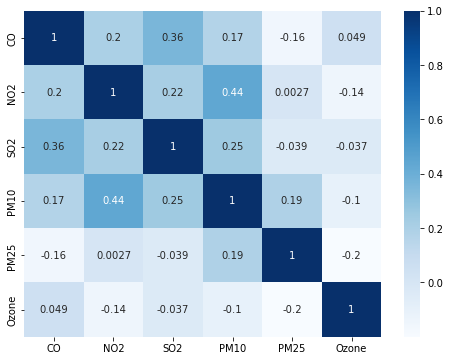

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(new_pollution_dataset.corr(), annot=True, cmap='Blues')

# Estimating Hourly Pollution AQI

In [51]:
us_aqi_table_value = {
    'o3': [(0.000, 0.062), (0.063, 0.124), (0.125, 0.164), (0.165, 0.204), (0.205, 0.404), (0.405, 0.504), (0.505, 0.604)],
    'o3_8': [(0.000, 0.054), (0.055, 0.070), (0.071, 0.085), (0.086, 0.105), (0.106, 0.200), (0.201, 0.400), (0.401, 0.800)],
    'pm25_24': [(0.0, 12.0), (12.1, 35.4),(35.5, 55.4), (55.5, 150.4), (150.5, 250.4), (250.5, 350.4), (350.5, 500.4)],
    'pm10_24': [(0, 54), (55, 154), (155, 254), (255, 354), (355, 424), (425, 504), (505, 604)],
    'co_8': [(0.0, 4.4), (4.5, 9.4), (9.5, 12.4), (12.5, 15.4), (15.5, 30.4), (30.4, 40.4), (40.5, 50.4)],
    'so2': [(0, 35), (36, 75), (76, 185), (186, 304), (305, 604), (605, 804), (805, 1004)],
    'no2': [(0, 53), (54, 100), (101, 360), (361, 649), (650, 1249), (1250, 1649), (1650,2049)],
    'AQI': [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 400), (401, 500)],
    'category': ['good', 'moderate', 'unhealthy_for_sensitive_groups', 'unhealthy', 'v_unhealthy', 'hazardous','v_harzardous']
}


uk_table_aqi_value = {
    'o3': [(0,33), (34,66), (67,100), (101,120), (121,140), (141,160), (161,187), (188,213), (214,240), (241,10000)],
    'o3_revised': [(0,34), (35, 69), (70, 104), (105,126), (127,147), (148,169), (170, 187),(188,213), (214,240),(241,10000)],
    'pm25_24': [(0,11), (12,23), (24,35), (36,41), (42,47), (48,53), (54,58), (59,64), (65,70), (71, 10000)],
    'pm25_revised': [(0,17),(18,33), (34,49), (50,58), (59,66), (67,73), (74,83), (84,92), (93, 100), (101, 10000)],
    'pm10_24': [(0,16), (17,33), (34,50), (51,58), (59,66), (67,75), (76,83), (84,91), (92,100), (101, 10000)],
    'pm10_revised': [(0,22), (23,45), (46, 67), (68,80), (81, 93), (94, 106), (107,130), (131, 153), (154, 176), (177, 10000)],
    #     'co_8': [(0, 53), (54, 100), (101, 360), (361, 649), (650, 1249), (1250, 1649), (1650,2049)],
    'so2': [(0,88), (89,177), (178,266), (267,354), (355,443), (444,532), (533,710), (711,887), (888,1064), (1065, 10000)],
    'no2': [(0, 67), (68,134), (135,200), (201,267), (268,334), (335,400), (401,467), (468,534), (535,600), (601,10000)],
    'AQI': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'category': ['Low_1', 'Low_2', 'Low_3', 'Moderate_1', 'Moderate_2', 'Moderate_3', 'High_1', 'High_2', 'High_3', 'Very_high']
}

us_aqi_lookup_df = pd.DataFrame(us_aqi_table_value)
uk_aqi_lookup_df = pd.DataFrame(uk_table_aqi_value)

In [52]:
us_aqi_lookup_df

o3            o3_8         pm25_24     pm10_24          co_8  \
0    (0.0, 0.062)    (0.0, 0.054)     (0.0, 12.0)     (0, 54)    (0.0, 4.4)   
1  (0.063, 0.124)   (0.055, 0.07)    (12.1, 35.4)   (55, 154)    (4.5, 9.4)   
2  (0.125, 0.164)  (0.071, 0.085)    (35.5, 55.4)  (155, 254)   (9.5, 12.4)   
3  (0.165, 0.204)  (0.086, 0.105)   (55.5, 150.4)  (255, 354)  (12.5, 15.4)   
4  (0.205, 0.404)    (0.106, 0.2)  (150.5, 250.4)  (355, 424)  (15.5, 30.4)   
5  (0.405, 0.504)    (0.201, 0.4)  (250.5, 350.4)  (425, 504)  (30.4, 40.4)   
6  (0.505, 0.604)    (0.401, 0.8)  (350.5, 500.4)  (505, 604)  (40.5, 50.4)   

           so2           no2         AQI                        category  
0      (0, 35)       (0, 53)     (0, 50)                            good  
1     (36, 75)     (54, 100)   (51, 100)                        moderate  
2    (76, 185)    (101, 360)  (101, 150)  unhealthy_for_sensitive_groups  
3   (186, 304)    (361, 649)  (151, 200)                       unhealthy  
4   (305, 604)   (650, 1249)  (201, 300)                     v_unhealthy  
5   (605, 804)  (1250, 1649)  (301, 400)                       hazardous  
6  (805, 1004)  (1650, 2049)  (401, 500)                    v_harzardous

In [53]:
uk_aqi_lookup_df

o3    o3_revised      pm25_24  pm25_revised       pm10_24  \
0       (0, 33)       (0, 34)      (0, 11)       (0, 17)       (0, 16)   
1      (34, 66)      (35, 69)     (12, 23)      (18, 33)      (17, 33)   
2     (67, 100)     (70, 104)     (24, 35)      (34, 49)      (34, 50)   
3    (101, 120)    (105, 126)     (36, 41)      (50, 58)      (51, 58)   
4    (121, 140)    (127, 147)     (42, 47)      (59, 66)      (59, 66)   
5    (141, 160)    (148, 169)     (48, 53)      (67, 73)      (67, 75)   
6    (161, 187)    (170, 187)     (54, 58)      (74, 83)      (76, 83)   
7    (188, 213)    (188, 213)     (59, 64)      (84, 92)      (84, 91)   
8    (214, 240)    (214, 240)     (65, 70)     (93, 100)     (92, 100)   
9  (241, 10000)  (241, 10000)  (71, 10000)  (101, 10000)  (101, 10000)   

   pm10_revised            so2           no2  AQI    category  
0       (0, 22)        (0, 88)       (0, 67)    1       Low_1  
1      (23, 45)      (89, 177)     (68, 134)    2       Low_2  
2      (46, 67)     (178, 266)    (135, 200)    3       Low_3  
3      (68, 80)     (267, 354)    (201, 267)    4  Moderate_1  
4      (81, 93)     (355, 443)    (268, 334)    5  Moderate_2  
5     (94, 106)     (444, 532)    (335, 400)    6  Moderate_3  
6    (107, 130)     (533, 710)    (401, 467)    7      High_1  
7    (131, 153)     (711, 887)    (468, 534)    8      High_2  
8    (154, 176)    (888, 1064)    (535, 600)    9      High_3  
9  (177, 10000)  (1065, 10000)  (601, 10000)   10   Very_high

In [54]:
def get_info(value, colname='o3', lookup_table=us_aqi_lookup_df):
    result = lookup_table[
        lookup_table[colname].map(
            lambda x: True if x[0] <= value and x[1] >= value else False)]

    if len(result) < 1:
        return lookup_table.iloc[-1:, :] # returns maximum AQI
    else:
        return result
    

def get_aqi_category(value, lookup_table):
    return get_info(value=value, colname='AQI', lookup_table=lookup_table)['category'].values[0]


def moderate_value(value, colname):
    if colname.lower().startswith('o3'):
        return round(value, 3)
    elif colname.lower().startswith('pm25'):
        return round(value, 1)
    elif colname.lower().startswith('pm10'):
        return int(value)
    elif colname.lower().startswith('co'):
        return round(value, 1)
    elif colname.lower().startswith('so2'):
        return int(value)
    elif colname.lower().startswith('no2'):
        return int(value)

    
def get_AQI_USA(value, colname, lookup_table=us_aqi_lookup_df):
    moderated_value = moderate_value(value, colname)
    
    row = get_info(moderated_value, colname, lookup_table)
    
    Cp = moderated_value
    Ilo, Ihi = row.AQI.values[0]
    BPlo, BPhi = row[colname].values[0]

    aqi = ((Ihi - Ilo) / (BPhi - BPlo)) * (Cp - BPlo) + Ilo
    analysis = {'Cp': Cp, 'Ihi': Ihi, 'Ilo': Ilo, 'BPhi': BPhi, 'BPlo': BPlo}

    return {"aqi_result": int(aqi), "data_used": analysis}


def get_info_uk(value, colname='o3', lookup_table=us_aqi_lookup_df):
    result = lookup_table[
        lookup_table[colname].map(
            lambda x: True if x == value else False)]

    if len(result) < 1:
        return lookup_table.iloc[-1:, :] # returns maximum AQI
    else:
        return result
    

def get_aqi_category_uk(value, lookup_table):
    return get_info_uk(value=value, colname='AQI', lookup_table=lookup_table)['category'].values[0]


def get_AQI_UK(value, colname, lookup_table=uk_aqi_lookup_df):
    moderated_value = moderate_value(value, colname)
    
    row = get_info(moderated_value, colname, lookup_table)

    return {"aqi_result": row.AQI.values[0]}

def regulate_time(value):
    if value.startswith('24'):
        return '00:00:00'
    else: 
        return value

In [55]:
# Testing the get_AQI_USA function for USA

res = get_AQI_USA(value=0.07893333, colname='o3_8', lookup_table=us_aqi_lookup_df)
Ihi = res['data_used']['Ihi']
Ilo = res['data_used']['Ilo']
BPhi = res['data_used']['BPhi']
BPlo = res['data_used']['BPlo']
Cp = res['data_used']['Cp']

computed_res = int(((Ihi - Ilo) / (BPhi - BPlo)) * (Cp - BPlo) + Ilo)
print(res['data_used'])
print(f'Computed: {computed_res}\t Returned: {res["aqi_result"]}')

{'Cp': 0.079, 'Ihi': 150, 'Ilo': 101, 'BPhi': 0.085, 'BPlo': 0.071}
Computed: 129	 Returned: 129


In [56]:
# Testing the get_AQI_UK function for UK

get_AQI_UK(value=100, colname='pm10_revised', lookup_table=uk_aqi_lookup_df)
    

{'aqi_result': 6}

### Making copies of the data values before manipulation
One, to be used for UK AQI Computations, and the other, to be used for US AQI computations

In [57]:
# Making a copy of the data values before manipulation, to be used for UK AQI Computations later
new_pollution_dataset_uk  = new_pollution_dataset.copy()
new_pollution_dataset_us  = new_pollution_dataset.copy()

In [58]:
# UK data copy
new_pollution_dataset_uk.head()

Date_0    Time_1   CO   NO2  SO2  PM10  PM25  Ozone
4  01/01/2010  01:00:00  0.2  69.0  3.0  69.0   0.0   58.0
5  01/01/2010  02:00:00  0.3  73.0  0.0  65.0   0.0   52.0
6  01/01/2010  03:00:00  0.2  73.0  0.0  43.0   0.0   54.0
7  01/01/2010  04:00:00  0.5  69.0  0.0  36.0   0.0   56.0
8  01/01/2010  05:00:00  0.3  73.0  0.0  33.0   0.0   60.0

In [59]:
# US data copy
new_pollution_dataset_us.head()

Date_0    Time_1   CO   NO2  SO2  PM10  PM25  Ozone
4  01/01/2010  01:00:00  0.2  69.0  3.0  69.0   0.0   58.0
5  01/01/2010  02:00:00  0.3  73.0  0.0  65.0   0.0   52.0
6  01/01/2010  03:00:00  0.2  73.0  0.0  43.0   0.0   54.0
7  01/01/2010  04:00:00  0.5  69.0  0.0  36.0   0.0   56.0
8  01/01/2010  05:00:00  0.3  73.0  0.0  33.0   0.0   60.0

# My Custom Visualization Utility Function for Analysis

In [175]:
def plot_series_data(data, period='month', length=1, reversed=False, title=None, multi_variate=False):
    import matplotlib.pyplot as pyplot
    
    if not reversed:
        if period == 'hour':
            data[:length].plot(figsize=(20,8))

        elif period == 'day':
            data[:24 * length].plot(figsize=(20,8))

        elif period == 'week':
            data[:24 * 7 * length].plot(figsize=(20,8))

        elif period == 'month':
            data[:24 * 30 * length].plot(figsize=(20,8))

        elif period == 'year':
            data[:24 * 365 * length].plot(figsize=(20,8))

        else:
            period = 'month'
            length = 1
            data[:length].plot(figsize=(20,8))
    else:
        if period == 'hour':
            data[-length:].plot(figsize=(20,8))

        elif period == 'day':
            data[-24 * length:].plot(figsize=(20,8))

        elif period == 'week':
            data[-24 * 7 * length:].plot(figsize=(20,8))

        elif period == 'month':
            data[-24 * 30 * length:].plot(figsize=(20,8))

        elif period == 'year':
            data[-24 * 365 * length:].plot(figsize=(20,8))

        else:
            period = 'month'
            length = 1
            data[-length:].plot(figsize=(20,8))
    
    if title is not None:
         pyplot.title(f'Time-Series Plot of the {"First" if not reversed else "Last"} {length} {period.capitalize()}(s)'.upper() + f' {title.upper()}\n')
    
    else:
        pyplot.title(f'Time-Series Plot of the {"First" if not reversed else "Last"} {length} {period.capitalize()}(s)'.upper() + '\n')
    
    pyplot.xlabel('date_time')
    
    if not multi_variate:
        pyplot.ylabel(data.name + '-AQI')
        
    else:
        pyplot.ylabel('AQI-Value')
        
    pyplot.show()

# USA-BASED AQI Computations

Calculations are based on instrcutions found on:

- [United States Environmental Protection Agency](https://www.epa.gov/outdoor-air-quality-data/how-aqi-calculated)
- [US-AQI Calculation Documention](https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf)

In [61]:
new_pollution_dataset_us.head()

Date_0    Time_1   CO   NO2  SO2  PM10  PM25  Ozone
4  01/01/2010  01:00:00  0.2  69.0  3.0  69.0   0.0   58.0
5  01/01/2010  02:00:00  0.3  73.0  0.0  65.0   0.0   52.0
6  01/01/2010  03:00:00  0.2  73.0  0.0  43.0   0.0   54.0
7  01/01/2010  04:00:00  0.5  69.0  0.0  36.0   0.0   56.0
8  01/01/2010  05:00:00  0.3  73.0  0.0  33.0   0.0   60.0

## Regularization and unit conversion of Pollutant Value units into US-Based global units

**Air Pollutant Unit Conversion Rates**

- **Ozone:**
1 microgram/m3 (O3) = 0.001 ppm ``` (Ozone) ```
    
    
- **CO:**
1 milligram/m3 (CO) = 0.873 ppm ``` (Carbon Monoxide) ``` Note that CO is values are in milligram/m3
  
  
- **SO2:**
1 microgram/m3 (SO2) = 0.369 ppb ``` (Sulphur dioxide) ```
    
    
- **NO2:**
1 microgram/m3 (SO2) = 0.514 ppb ``` (Nitrogen dioxide) ```
    
    
-  **PM2.5**: Already in microgram/m3 unit


-  **PM10**: Already in microgram/m3 unit


In [62]:
# Converting datatype from float to int type (required for US-AQI computations, as stated in the docs)

new_pollution_dataset_us.PM10 = new_pollution_dataset_us.PM10.astype(np.int32)
new_pollution_dataset_us.SO2 = new_pollution_dataset_us.SO2.astype(np.int32)
new_pollution_dataset_us.NO2 = new_pollution_dataset_us.NO2.astype(np.int32)


# Truncating to appropriate decimal places

new_pollution_dataset_us.Ozone = new_pollution_dataset_us.Ozone.apply(lambda x: round(x, 3))
new_pollution_dataset_us.PM25 = new_pollution_dataset_us.PM25.apply(lambda x: round(x, 1))
new_pollution_dataset_us.CO = new_pollution_dataset_us.CO.apply(lambda x: round(x, 1))

In [63]:
mapped_conversion_unit_rates = {'CO': 0.873, 'NO2': 0.514, 'SO2': 0.369, 'PM25': 1.0, 'PM10': 1, 'Ozone': 0.001}

In [64]:
# Before conversion of units
new_pollution_dataset_us.head()

Date_0    Time_1   CO  NO2  SO2  PM10  PM25  Ozone
4  01/01/2010  01:00:00  0.2   69    3    69   0.0   58.0
5  01/01/2010  02:00:00  0.3   73    0    65   0.0   52.0
6  01/01/2010  03:00:00  0.2   73    0    43   0.0   54.0
7  01/01/2010  04:00:00  0.5   69    0    36   0.0   56.0
8  01/01/2010  05:00:00  0.3   73    0    33   0.0   60.0

In [65]:
# Converting the values from their original units into appropriate global units
for pollutant, conversion_rate in mapped_conversion_unit_rates.items():
    new_pollution_dataset_us[pollutant] = new_pollution_dataset_us[pollutant] * conversion_rate

In [67]:
# After conversion of units
new_pollution_dataset_us.head()

Date_0    Time_1      CO     NO2    SO2  PM10  PM25  Ozone
4  01/01/2010  01:00:00  0.1746  35.466  1.107    69   0.0  0.058
5  01/01/2010  02:00:00  0.2619  37.522  0.000    65   0.0  0.052
6  01/01/2010  03:00:00  0.1746  37.522  0.000    43   0.0  0.054
7  01/01/2010  04:00:00  0.4365  35.466  0.000    36   0.0  0.056
8  01/01/2010  05:00:00  0.2619  37.522  0.000    33   0.0  0.060

## Computing the US Air Quality Index (US-AQI) from Each Pollutant Value

In [68]:
mapped_cols = {'CO':'co_8', 'NO2':'no2', 'SO2':'so2', 'PM25':'pm25_24', 'PM10':'pm10_24', 'Ozone':'o3'}

In [69]:
us_computed_aqi_ds = pd.DataFrame()

for key,val in mapped_cols.items():
    us_computed_aqi_ds[f'{key}_aqi'] = new_pollution_dataset_us[key].apply(
        lambda x: get_AQI_USA(x, colname=val, lookup_table=us_aqi_lookup_df)["aqi_result"])
    print(f'Done for col: {key}')

Done for col: CO
Done for col: NO2
Done for col: SO2
Done for col: PM25
Done for col: PM10
Done for col: Ozone


In [70]:
us_computed_aqi_ds.head()

CO_aqi  NO2_aqi  SO2_aqi  PM25_aqi  PM10_aqi  Ozone_aqi
4       2       33        1         0        57         46
5       3       34        0         0        55         41
6       2       34        0         0        39         43
7       4       33        0         0        33         45
8       3       34        0         0        30         48

**We estimated the targetlable as the value of the pollutant with the maximum aqi value**

This is the method recommended in the official documentation

In [71]:
us_target_label = us_computed_aqi_ds.max(axis=1)
us_aqi_category = us_target_label.apply(lambda x: get_aqi_category(x, lookup_table=us_aqi_lookup_df))

## Merging the US dataset with Computed AQI values

In [72]:
us_merged_pollution_dataset = pd.concat([new_pollution_dataset_us, us_computed_aqi_ds], axis=1)

# regulating Time value from 1-24hrs into 0-23hrs
us_merged_pollution_dataset.Time_1 = us_merged_pollution_dataset.Time_1.apply(regulate_time)

# Combining date and time fields as date_time and changing data type to datetime
us_merged_pollution_dataset['date_time'] = us_merged_pollution_dataset.Date_0 + " " + us_merged_pollution_dataset.Time_1
us_merged_pollution_dataset.date_time = us_merged_pollution_dataset.date_time.astype(np.datetime64)

# Adding the target label and category columns
us_merged_pollution_dataset['target_label'] = us_target_label
us_merged_pollution_dataset['aqi_category'] = us_aqi_category


In [73]:
us_merged_pollution_dataset.date_time.head()

4   2010-01-01 01:00:00
5   2010-01-01 02:00:00
6   2010-01-01 03:00:00
7   2010-01-01 04:00:00
8   2010-01-01 05:00:00
Name: date_time, dtype: datetime64[ns]

In [74]:
us_merged_pollution_dataset.head()

Date_0    Time_1      CO     NO2    SO2  PM10  PM25  Ozone  CO_aqi  \
4  01/01/2010  01:00:00  0.1746  35.466  1.107    69   0.0  0.058       2   
5  01/01/2010  02:00:00  0.2619  37.522  0.000    65   0.0  0.052       3   
6  01/01/2010  03:00:00  0.1746  37.522  0.000    43   0.0  0.054       2   
7  01/01/2010  04:00:00  0.4365  35.466  0.000    36   0.0  0.056       4   
8  01/01/2010  05:00:00  0.2619  37.522  0.000    33   0.0  0.060       3   

   NO2_aqi  SO2_aqi  PM25_aqi  PM10_aqi  Ozone_aqi           date_time  \
4       33        1         0        57         46 2010-01-01 01:00:00   
5       34        0         0        55         41 2010-01-01 02:00:00   
6       34        0         0        39         43 2010-01-01 03:00:00   
7       33        0         0        33         45 2010-01-01 04:00:00   
8       34        0         0        30         48 2010-01-01 05:00:00   

   target_label aqi_category  
4            57     moderate  
5            55     moderate  
6            43         good  
7            45         good  
8            48         good

In [75]:
us_merged_pollution_dataset.tail()

Date_0    Time_1   CO     NO2    SO2  PM10  PM25     Ozone  CO_aqi  \
88391  1/31/2020  20:00:00  0.0  43.690  0.369    14   7.0  0.012878       0   
88392  1/31/2020  21:00:00  0.0  39.578  0.369    13   8.0  0.020764       0   
88393  1/31/2020  22:00:00  0.0  37.522  0.369    19   6.0  0.017869       0   
88394  1/31/2020  23:00:00  0.0  33.410  0.369    20   2.0  0.025257       0   
88395  1/31/2020  00:00:00  0.0  25.700  0.369    13   5.0  0.031945       0   

       NO2_aqi  SO2_aqi  PM25_aqi  PM10_aqi  Ozone_aqi           date_time  \
88391       40        0        29        12         10 2020-01-31 20:00:00   
88392       36        0        33        12         16 2020-01-31 21:00:00   
88393       34        0        25        17         14 2020-01-31 22:00:00   
88394       31        0         8        18         20 2020-01-31 23:00:00   
88395       23        0        20        12         25 2020-01-31 00:00:00   

       target_label aqi_category  
88391            40         good  
88392            36         good  
88393            34         good  
88394            31         good  
88395            25         good

In [76]:
us_merged_pollution_dataset = us_merged_pollution_dataset[['date_time', 'Date_0', 'Time_1', 'CO', 'NO2', 'SO2', 'PM10', 'PM25', 'Ozone',
       'CO_aqi', 'NO2_aqi', 'SO2_aqi', 'PM25_aqi', 'PM10_aqi', 'Ozone_aqi', 'target_label', 'aqi_category']]

us_merged_pollution_dataset.set_index(keys='date_time', drop=True, inplace=True)

# Renaming Columns
us_merged_pollution_dataset.rename(columns={'Date_0':'Date', 'Time_1':'Time'}, inplace=True)

In [77]:
us_merged_pollution_dataset.head()

Date      Time      CO     NO2    SO2  PM10  PM25  \
date_time                                                                      
2010-01-01 01:00:00  01/01/2010  01:00:00  0.1746  35.466  1.107    69   0.0   
2010-01-01 02:00:00  01/01/2010  02:00:00  0.2619  37.522  0.000    65   0.0   
2010-01-01 03:00:00  01/01/2010  03:00:00  0.1746  37.522  0.000    43   0.0   
2010-01-01 04:00:00  01/01/2010  04:00:00  0.4365  35.466  0.000    36   0.0   
2010-01-01 05:00:00  01/01/2010  05:00:00  0.2619  37.522  0.000    33   0.0   

                     Ozone  CO_aqi  NO2_aqi  SO2_aqi  PM25_aqi  PM10_aqi  \
date_time                                                                  
2010-01-01 01:00:00  0.058       2       33        1         0        57   
2010-01-01 02:00:00  0.052       3       34        0         0        55   
2010-01-01 03:00:00  0.054       2       34        0         0        39   
2010-01-01 04:00:00  0.056       4       33        0         0        33   
2010-01-01 05:00:00  0.060       3       34        0         0        30   

                     Ozone_aqi  target_label aqi_category  
date_time                                                  
2010-01-01 01:00:00         46            57     moderate  
2010-01-01 02:00:00         41            55     moderate  
2010-01-01 03:00:00         43            43         good  
2010-01-01 04:00:00         45            45         good  
2010-01-01 05:00:00         48            48         good

## Saving a copy of the cleaned US dataset

In [107]:
# Saving a copy of the cleaned dataset
us_merged_pollution_dataset.index = pd.date_range(start='2010-01-01 01:00:0', end='2020-02-1 00:00:00',freq="H")
us_merged_pollution_dataset.to_csv('cleaned_data/us_merged_pollution_dataset.csv')

In [108]:
# Retrieving the saved Dataset
us_merged_pollution_dataset = pd.read_csv('cleaned_data/us_merged_pollution_dataset.csv', index_col=0, parse_dates=True)
us_merged_pollution_dataset.head()

Date      Time      CO     NO2    SO2  PM10  PM25  \
2010-01-01 01:00:00  01/01/2010  01:00:00  0.1746  35.466  1.107    69   0.0   
2010-01-01 02:00:00  01/01/2010  02:00:00  0.2619  37.522  0.000    65   0.0   
2010-01-01 03:00:00  01/01/2010  03:00:00  0.1746  37.522  0.000    43   0.0   
2010-01-01 04:00:00  01/01/2010  04:00:00  0.4365  35.466  0.000    36   0.0   
2010-01-01 05:00:00  01/01/2010  05:00:00  0.2619  37.522  0.000    33   0.0   

                     Ozone  CO_aqi  NO2_aqi  SO2_aqi  PM25_aqi  PM10_aqi  \
2010-01-01 01:00:00  0.058       2       33        1         0        57   
2010-01-01 02:00:00  0.052       3       34        0         0        55   
2010-01-01 03:00:00  0.054       2       34        0         0        39   
2010-01-01 04:00:00  0.056       4       33        0         0        33   
2010-01-01 05:00:00  0.060       3       34        0         0        30   

                     Ozone_aqi  target_label aqi_category  
2010-01-01 01:00:00         46            57     moderate  
2010-01-01 02:00:00         41            55     moderate  
2010-01-01 03:00:00         43            43         good  
2010-01-01 04:00:00         45            45         good  
2010-01-01 05:00:00         48            48         good

In [109]:
us_merged_pollution_dataset.tail()

Date      Time   CO     NO2    SO2  PM10  PM25  \
2020-01-31 20:00:00  1/31/2020  20:00:00  0.0  43.690  0.369    14   7.0   
2020-01-31 21:00:00  1/31/2020  21:00:00  0.0  39.578  0.369    13   8.0   
2020-01-31 22:00:00  1/31/2020  22:00:00  0.0  37.522  0.369    19   6.0   
2020-01-31 23:00:00  1/31/2020  23:00:00  0.0  33.410  0.369    20   2.0   
2020-02-01 00:00:00  1/31/2020  00:00:00  0.0  25.700  0.369    13   5.0   

                        Ozone  CO_aqi  NO2_aqi  SO2_aqi  PM25_aqi  PM10_aqi  \
2020-01-31 20:00:00  0.012878       0       40        0        29        12   
2020-01-31 21:00:00  0.020764       0       36        0        33        12   
2020-01-31 22:00:00  0.017869       0       34        0        25        17   
2020-01-31 23:00:00  0.025257       0       31        0         8        18   
2020-02-01 00:00:00  0.031945       0       23        0        20        12   

                     Ozone_aqi  target_label aqi_category  
2020-01-31 20:00:00         10            40         good  
2020-01-31 21:00:00         16            36         good  
2020-01-31 22:00:00         14            34         good  
2020-01-31 23:00:00         20            31         good  
2020-02-01 00:00:00         25            25         good

In [110]:
us_merged_pollution_dataset.shape

(88392, 16)

## Analyzing the Computed US-AQI for each pollutant across Manchester

In [111]:
us_merged_pollution_dataset.index = pd.date_range(start='2010-01-01 01:00:0', end='2020-02-1 00:00:00',freq="H")
us_merged_pollution_dataset.index.freq

<Hour>

In [162]:
us_merged_pollution_dataset[us_merged_pollution_dataset.columns[8:]].head()

CO_aqi  NO2_aqi  SO2_aqi  PM25_aqi  PM10_aqi  Ozone_aqi  \
2010-01-01 01:00:00       2       33        1         0        57         46   
2010-01-01 02:00:00       3       34        0         0        55         41   
2010-01-01 03:00:00       2       34        0         0        39         43   
2010-01-01 04:00:00       4       33        0         0        33         45   
2010-01-01 05:00:00       3       34        0         0        30         48   

                     target_label aqi_category  
2010-01-01 01:00:00            57     moderate  
2010-01-01 02:00:00            55     moderate  
2010-01-01 03:00:00            43         good  
2010-01-01 04:00:00            45         good  
2010-01-01 05:00:00            48         good

### Analyzing for the Entire Manchester

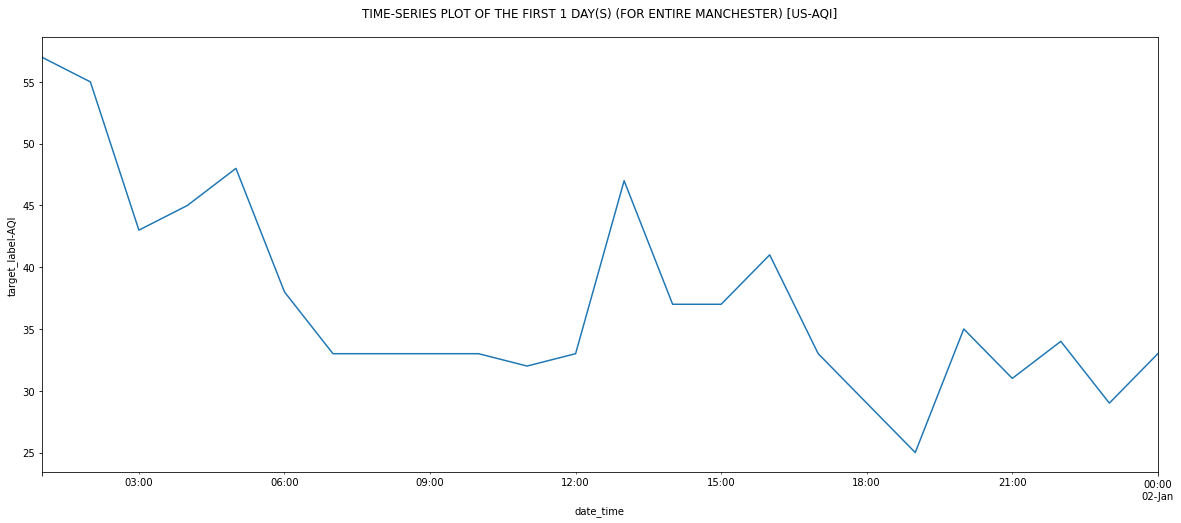

In [174]:
# First 1 Day for the Entire Manchester
plot_series_data(data=us_merged_pollution_dataset.target_label, period='day', 
                 length=1, title='(FOR ENTIRE MANCHESTER) [US-AQI]')

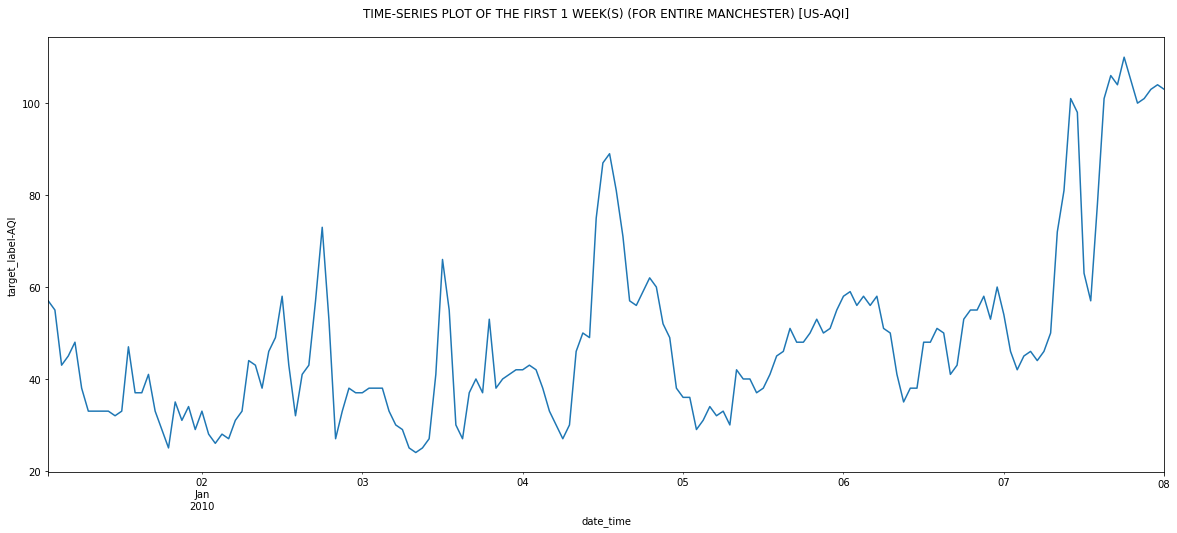

In [176]:
# First 1 Week for the Entire Manchester
plot_series_data(data=us_merged_pollution_dataset.target_label, period='week', 
                 length=1, title='(FOR ENTIRE MANCHESTER) [US-AQI]')

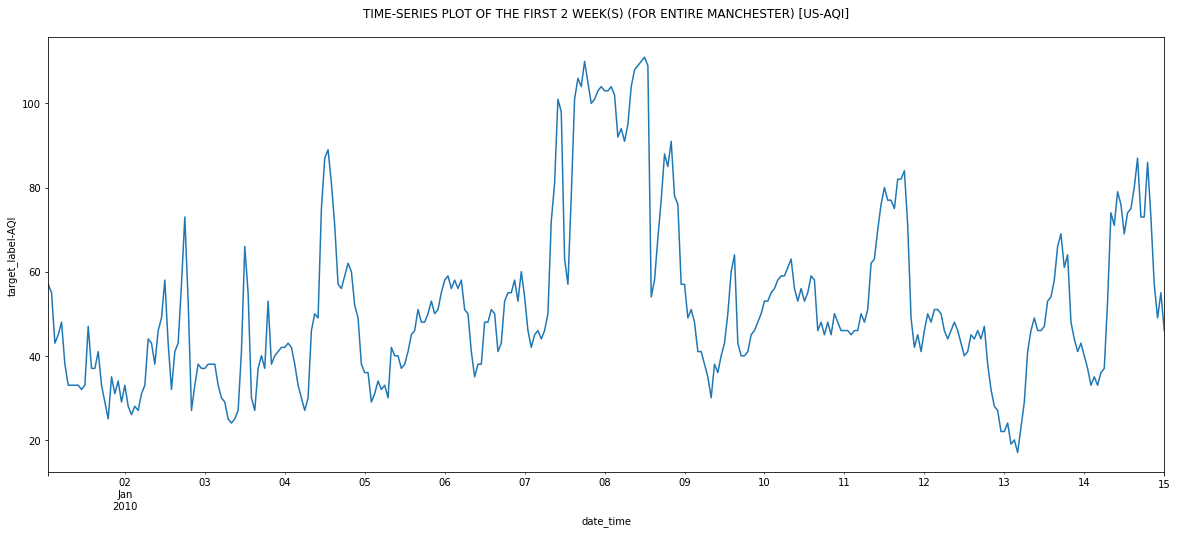

In [168]:
# First 2 Week for the Entire Manchester
plot_series_data(data=us_merged_pollution_dataset.target_label, 
                 period='week', length=2, title='(FOR ENTIRE MANCHESTER) [US-AQI]')

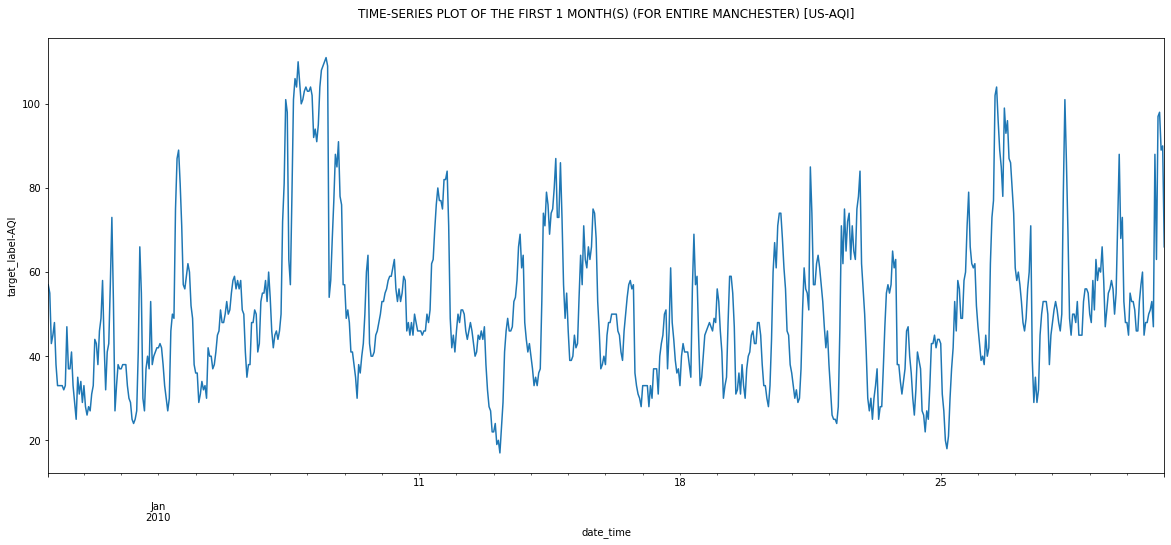

In [169]:
# First 1 Month for the Entire Manchester
plot_series_data(data=us_merged_pollution_dataset.target_label, 
                 period='month', length=1, title='(FOR ENTIRE MANCHESTER) [US-AQI]')

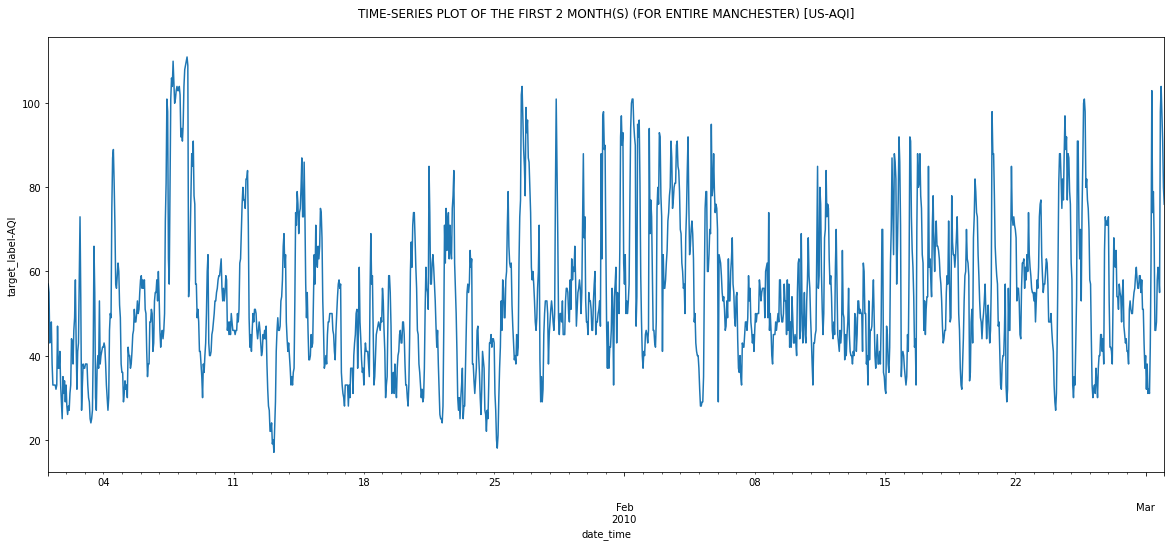

In [253]:
# First 2 Month for the Entire Manchester
plot_series_data(data=us_merged_pollution_dataset.target_label, 
                 period='month', length=2, title='(FOR ENTIRE MANCHESTER) [US-AQI]')

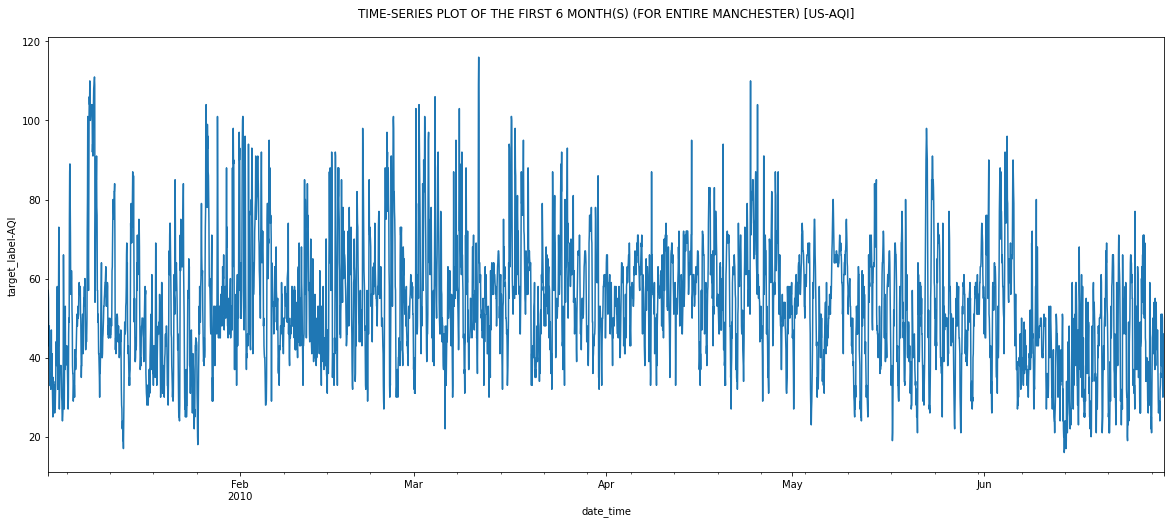

In [254]:
# First 6 Month for the Entire Manchester
plot_series_data(data=us_merged_pollution_dataset.target_label, 
                 period='month', length=6, title='(FOR ENTIRE MANCHESTER) [US-AQI]')

#### Recent Time

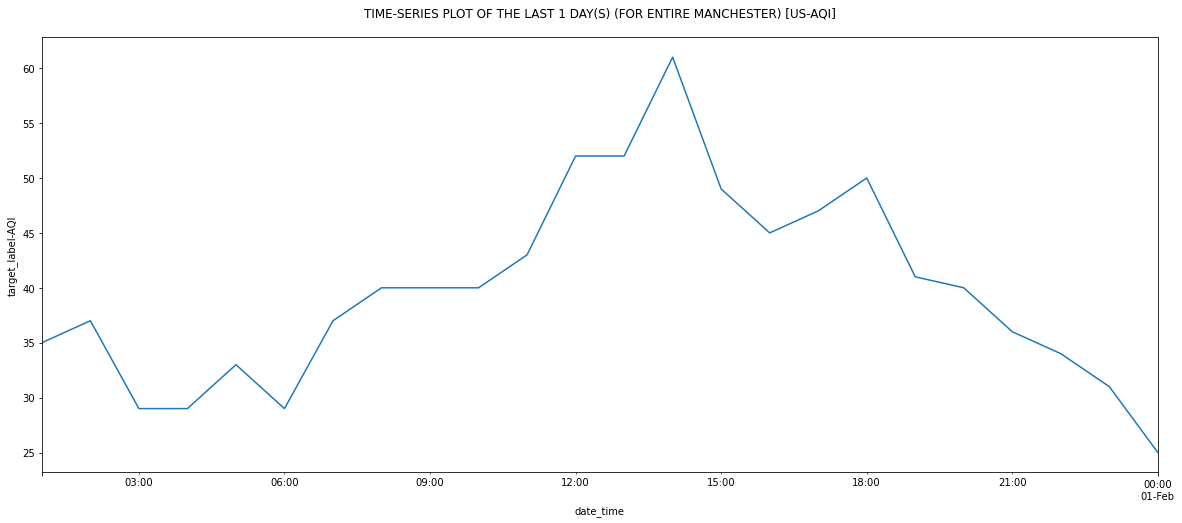

In [225]:
# Last 1 Day for the Entire Manchester
plot_series_data(data=us_merged_pollution_dataset.target_label, period='day', 
                 length=1, title='(FOR ENTIRE MANCHESTER) [US-AQI]', reversed=True)

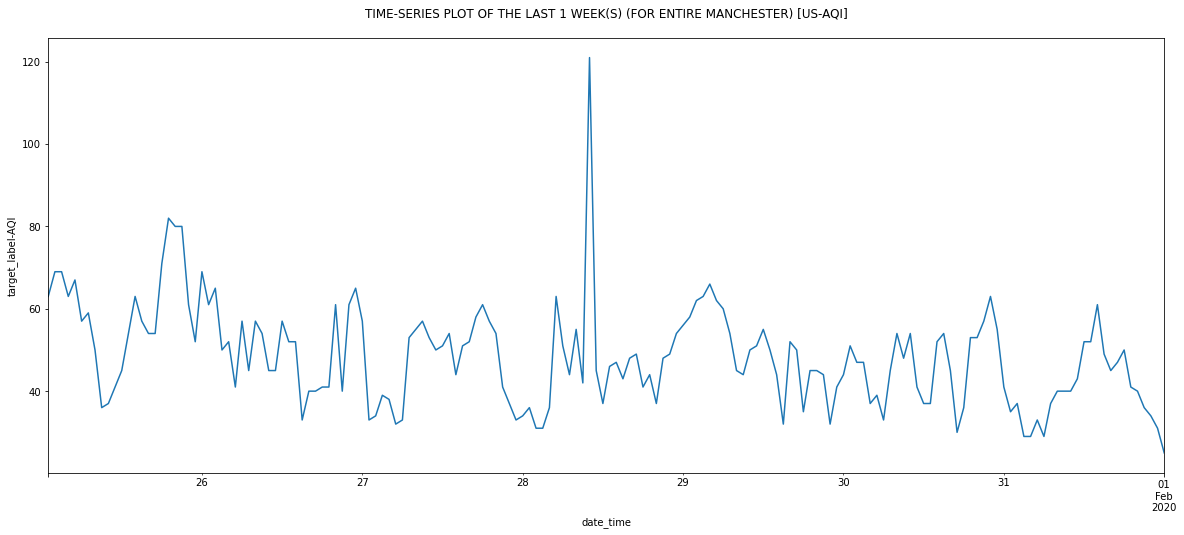

In [226]:
# Last 1 Week for the Entire Manchester
plot_series_data(data=us_merged_pollution_dataset.target_label, period='week', 
                 length=1, title='(FOR ENTIRE MANCHESTER) [US-AQI]', reversed=True)

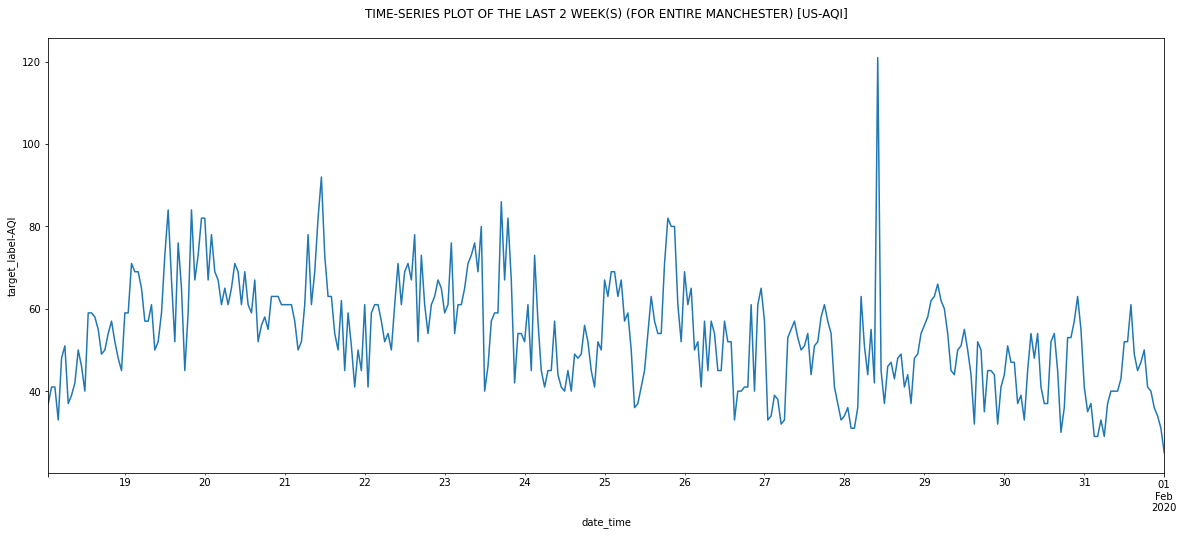

In [228]:
# Last 2 Weeks for the Entire Manchester
plot_series_data(data=us_merged_pollution_dataset.target_label, period='week', 
                 length=2, title='(FOR ENTIRE MANCHESTER) [US-AQI]', reversed=True)

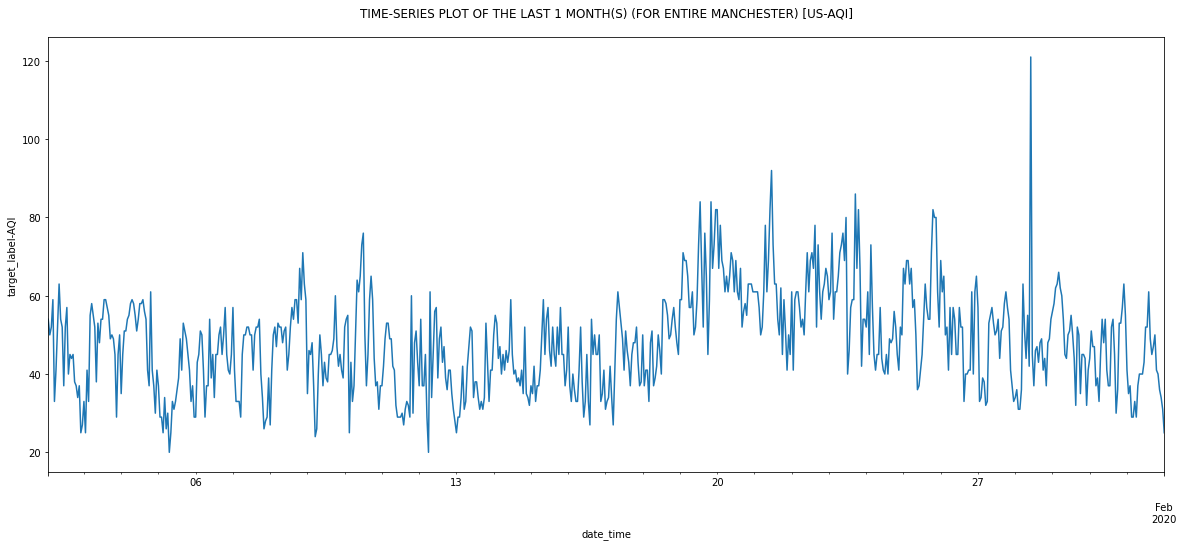

In [229]:
# Last 1 Month for the Entire Manchester
plot_series_data(data=us_merged_pollution_dataset.target_label, period='month', 
                 length=1, title='(FOR ENTIRE MANCHESTER) [US-AQI]', reversed=True)

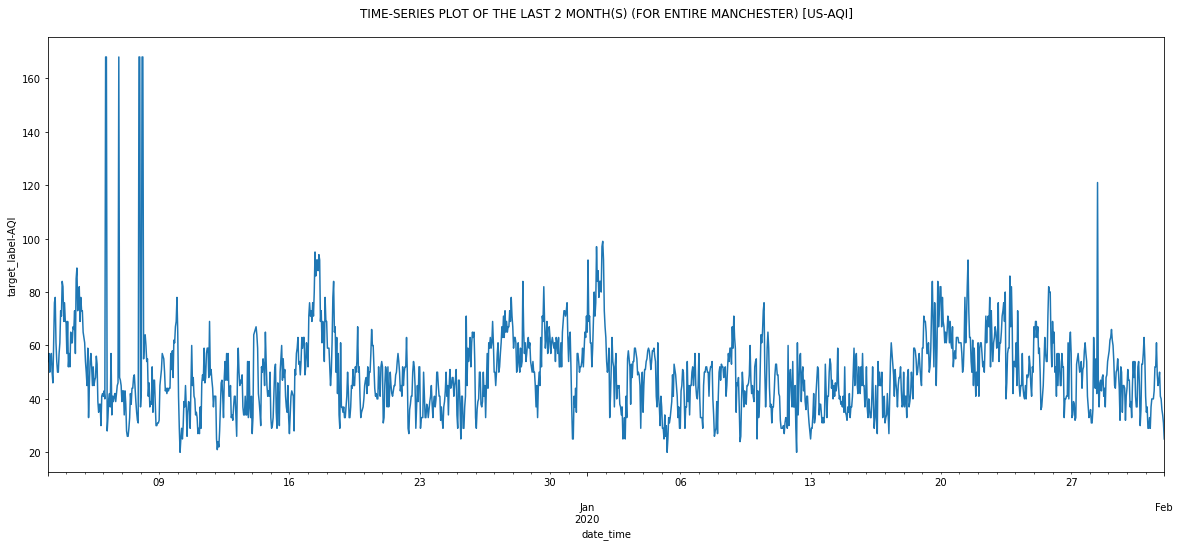

In [230]:
# Last 2 Month for the Entire Manchester
plot_series_data(data=us_merged_pollution_dataset.target_label, period='month', 
                 length=2, title='(FOR ENTIRE MANCHESTER) [US-AQI]', reversed=True)

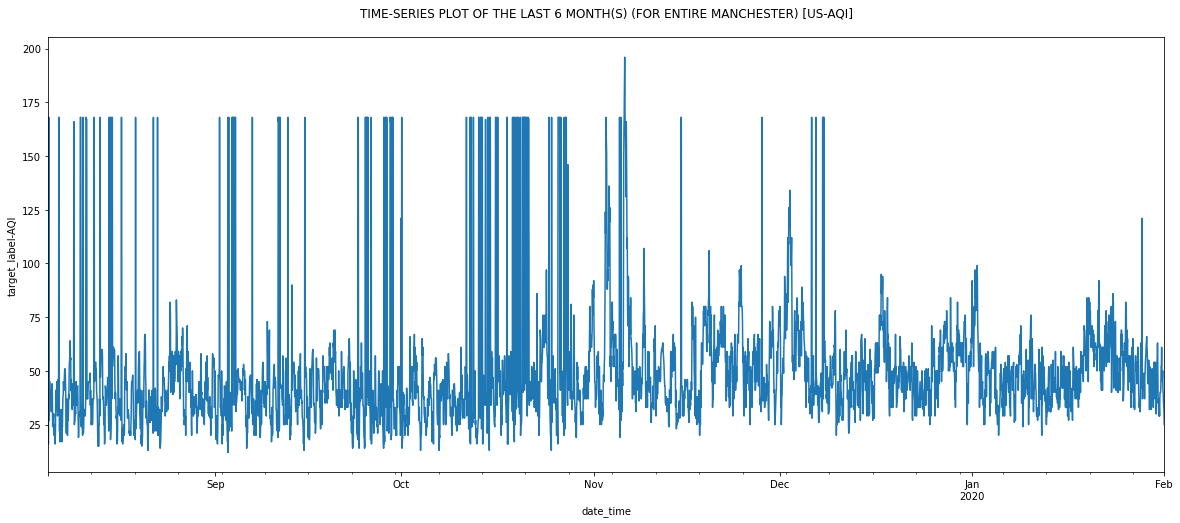

In [231]:
# Last 6 Month for the Entire Manchester
plot_series_data(data=us_merged_pollution_dataset.target_label, period='month', 
                 length=6, title='(FOR ENTIRE MANCHESTER) [US-AQI]', reversed=True)

### Analyzing for Individual Pollutant

In [234]:
us_individual_pollutants = us_merged_pollution_dataset[['CO_aqi',
       'NO2_aqi', 'SO2_aqi', 'PM25_aqi', 'PM10_aqi', 'Ozone_aqi']]

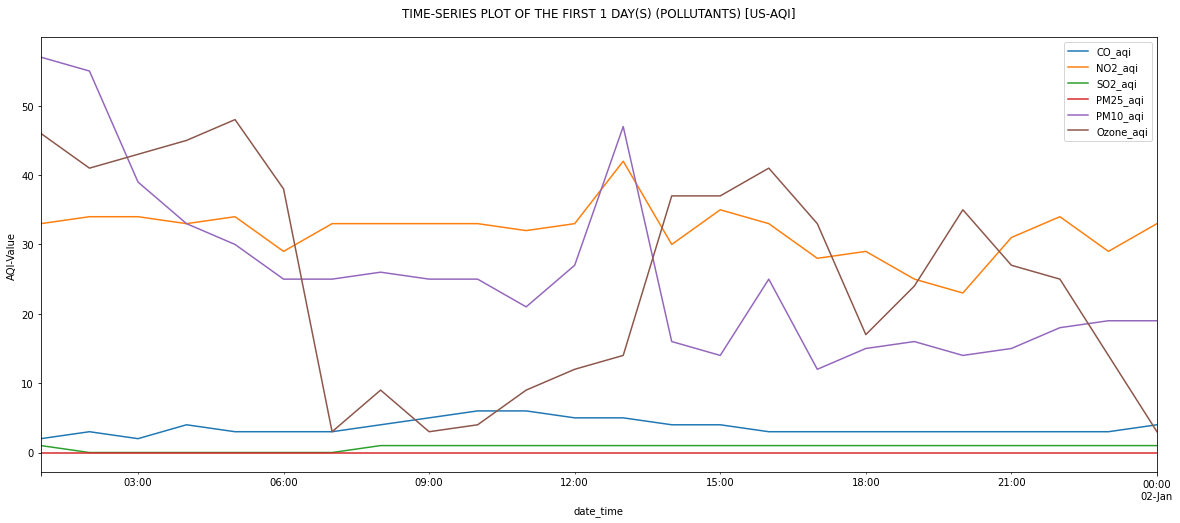

In [235]:
# First 1 Day
plot_series_data(data=us_individual_pollutants, period='day', length=1, multi_variate=True, title="(Pollutants) [US-AQI]")

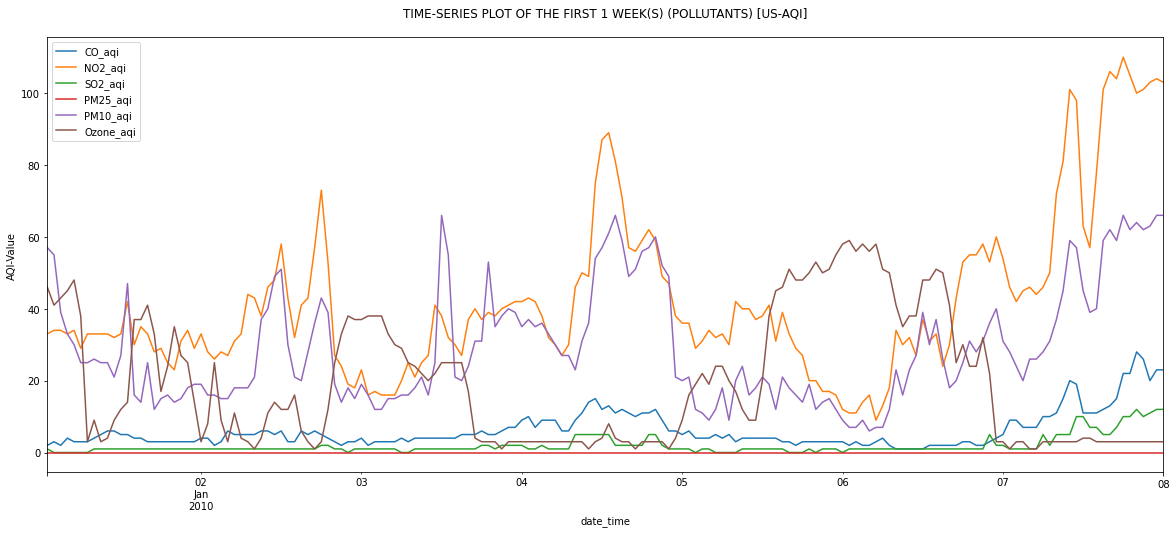

In [236]:
# First 1 Week
plot_series_data(data=us_individual_pollutants, period='week', length=1, multi_variate=True, title="(Pollutants) [US-AQI]")

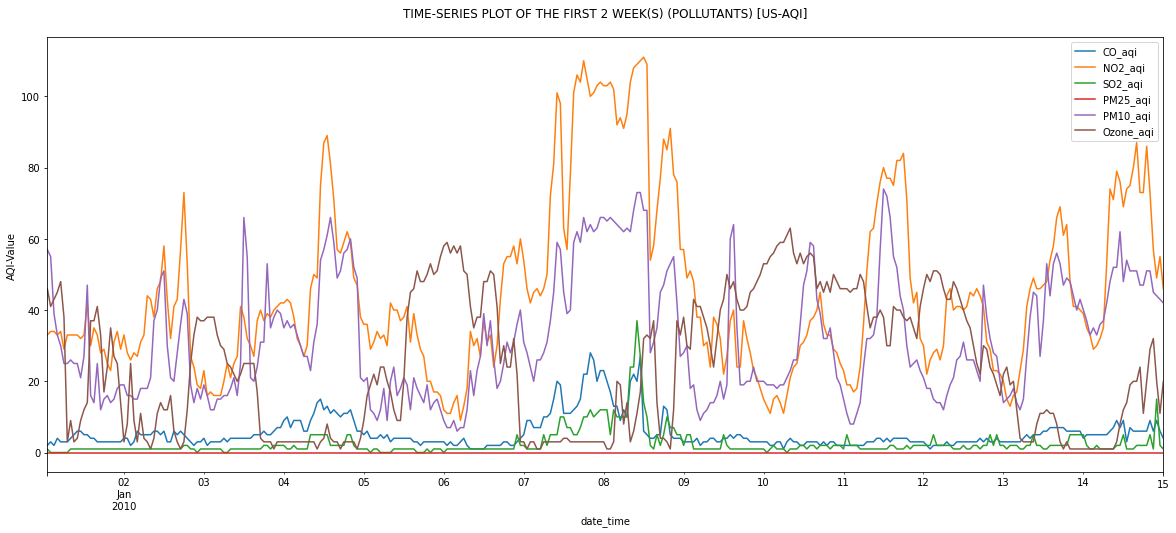

In [238]:
# First 2 Weeks
plot_series_data(data=us_individual_pollutants, period='week', length=2, multi_variate=True, title="(Pollutants) [US-AQI]")

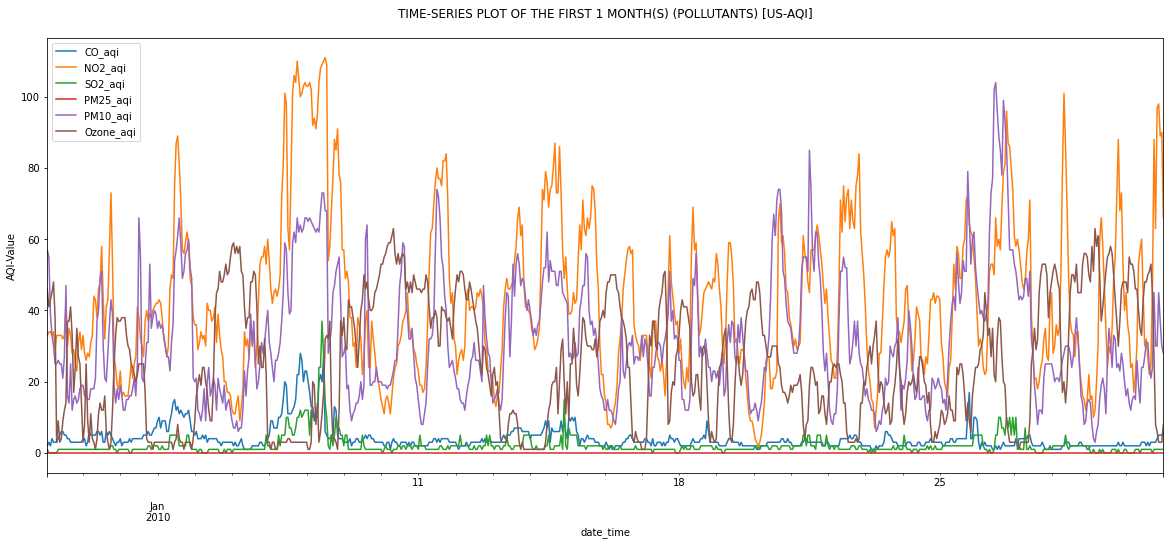

In [239]:
# First 1 month
plot_series_data(data=us_individual_pollutants, period='month', length=1, multi_variate=True, title="(Pollutants) [US-AQI]")

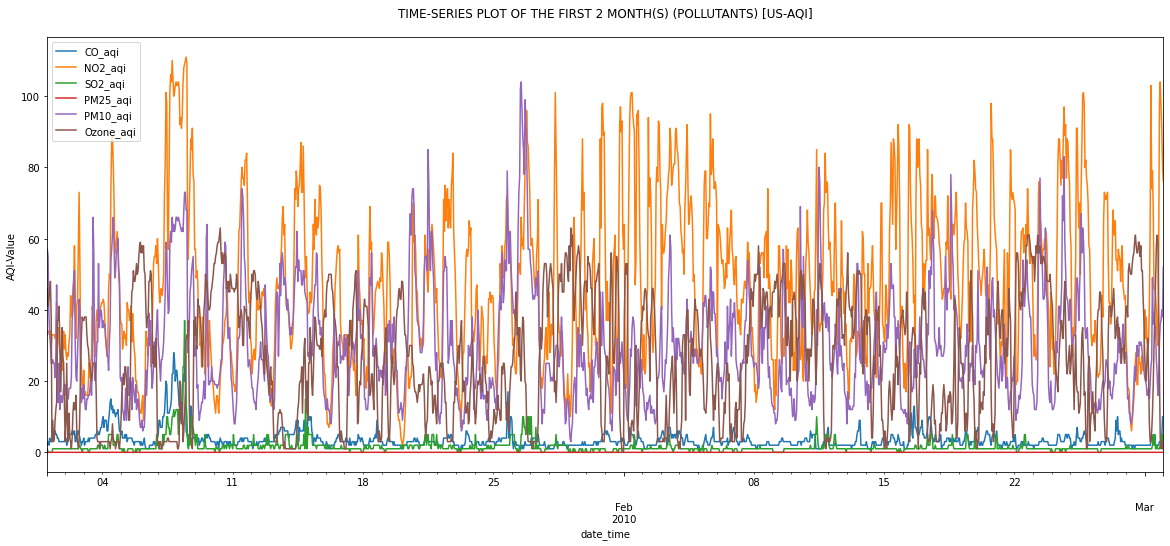

In [255]:
# First 2 months
plot_series_data(data=us_individual_pollutants, period='month', length=2, multi_variate=True, title="(Pollutants) [US-AQI]")

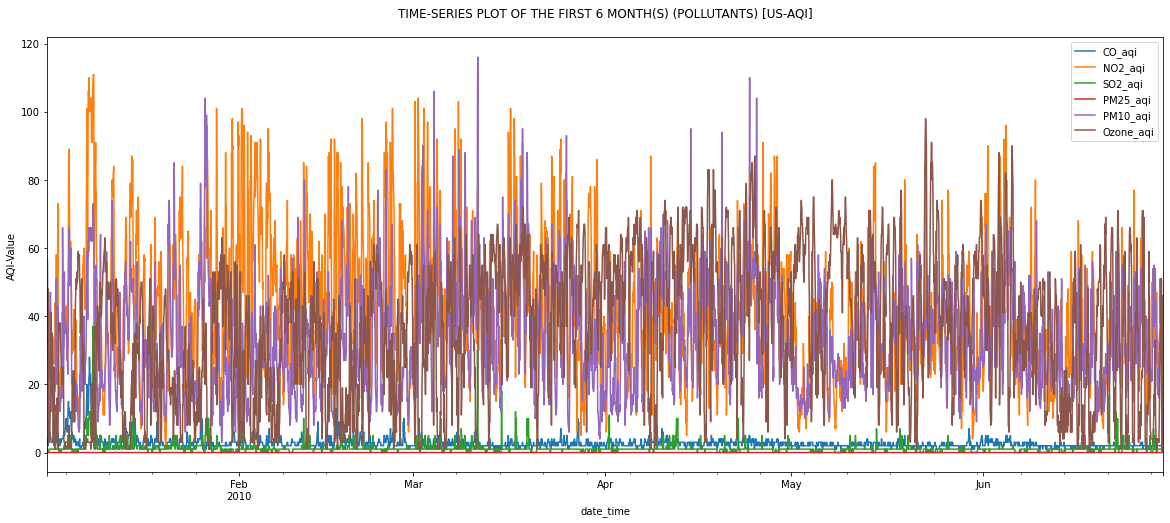

In [240]:
# First 6 month
plot_series_data(data=us_individual_pollutants, period='month', length=6, multi_variate=True, title="(Pollutants) [US-AQI]")

#### Recent Times

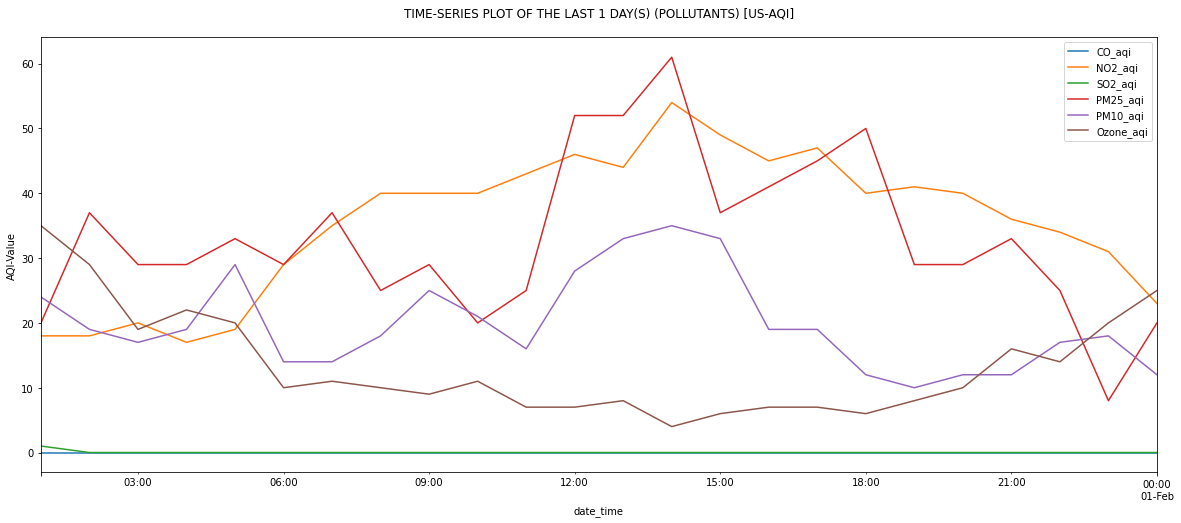

In [241]:
# Last 1 Day
plot_series_data(data=us_individual_pollutants, period='day', length=1, 
                 multi_variate=True, title="(Pollutants) [US-AQI]", reversed=True)

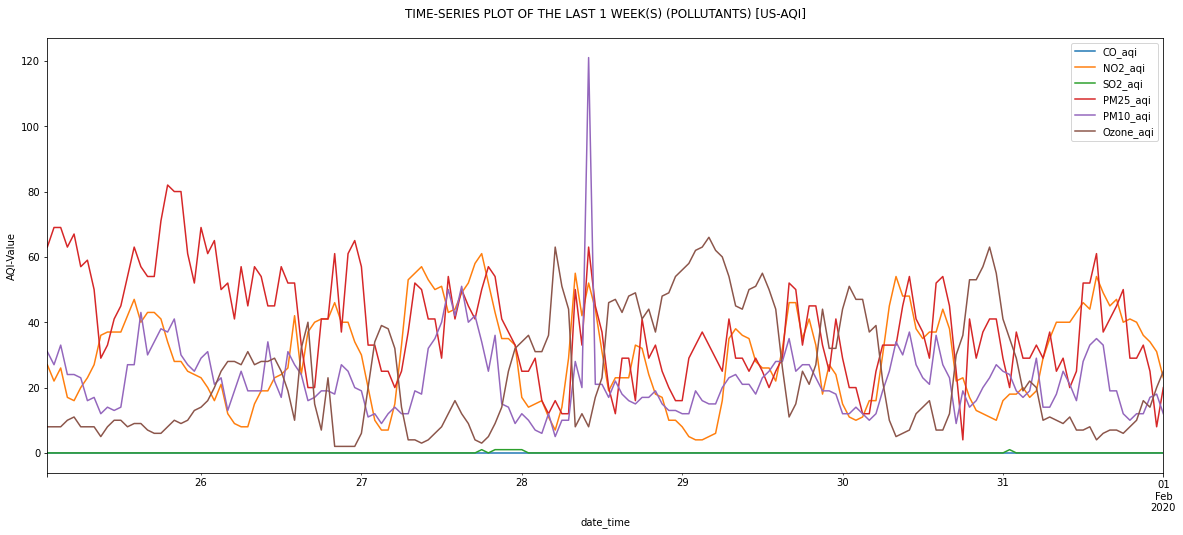

In [242]:
# Last 1 Week
plot_series_data(data=us_individual_pollutants, period='week', length=1, 
                 multi_variate=True, title="(Pollutants) [US-AQI]", reversed=True)

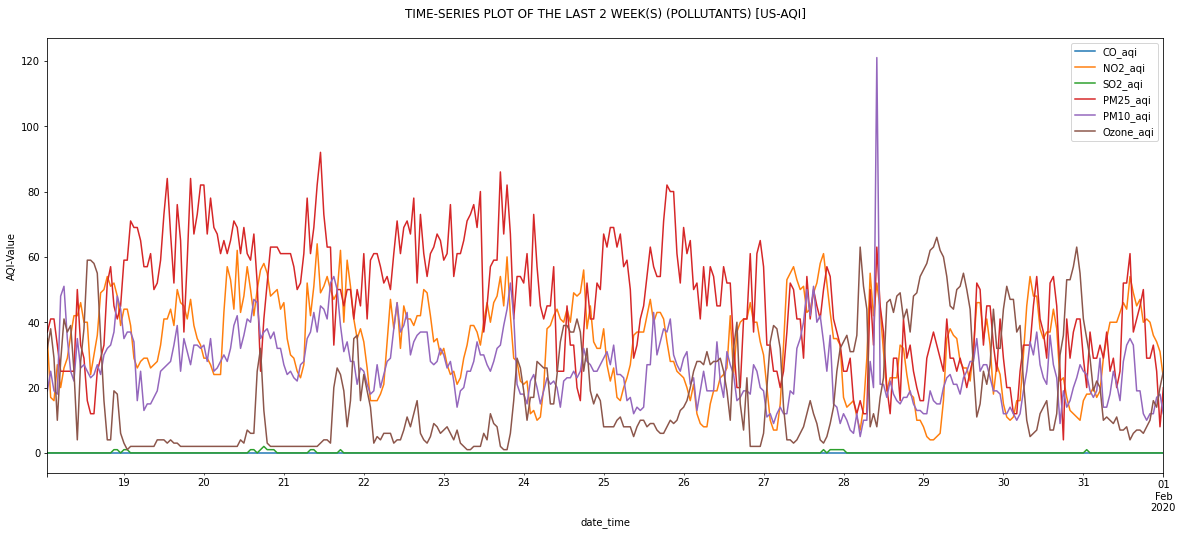

In [243]:
# Last 2 Weeks
plot_series_data(data=us_individual_pollutants, period='week', length=2, 
                 multi_variate=True, title="(Pollutants) [US-AQI]", reversed=True)

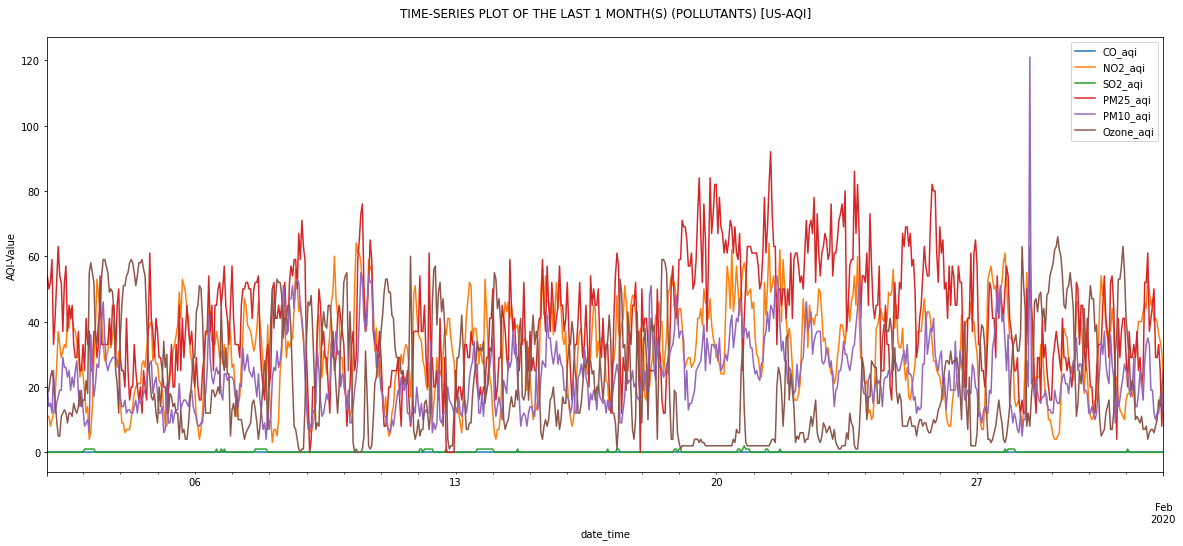

In [244]:
# Last 1 Month
plot_series_data(data=us_individual_pollutants, period='month', length=1, 
                 multi_variate=True, title="(Pollutants) [US-AQI]", reversed=True)

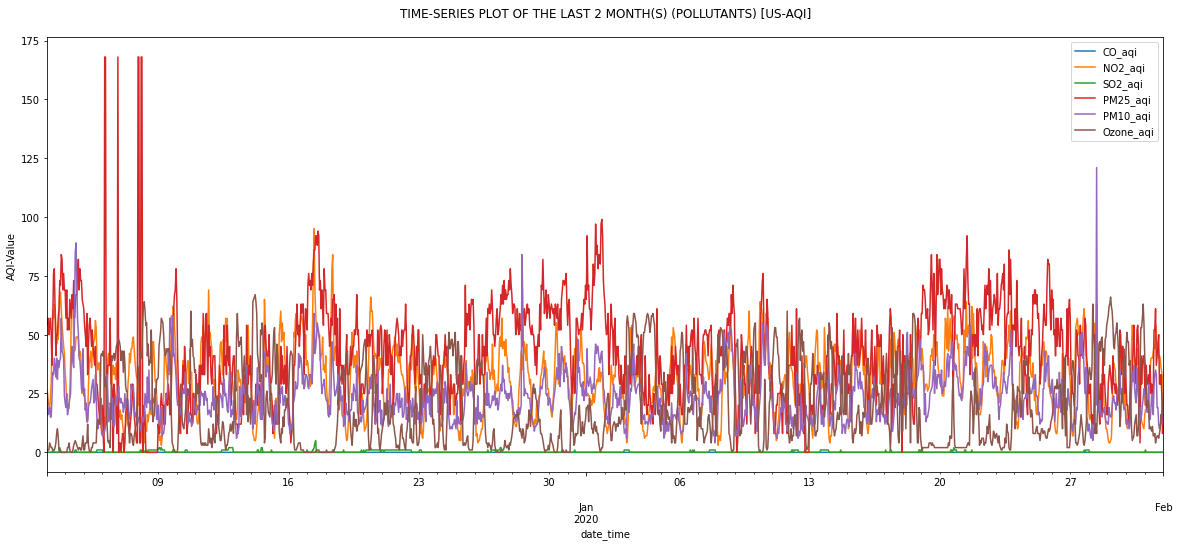

In [256]:
# Last 2 Months
plot_series_data(data=us_individual_pollutants, period='month', length=2, 
                 multi_variate=True, title="(Pollutants) [US-AQI]", reversed=True)

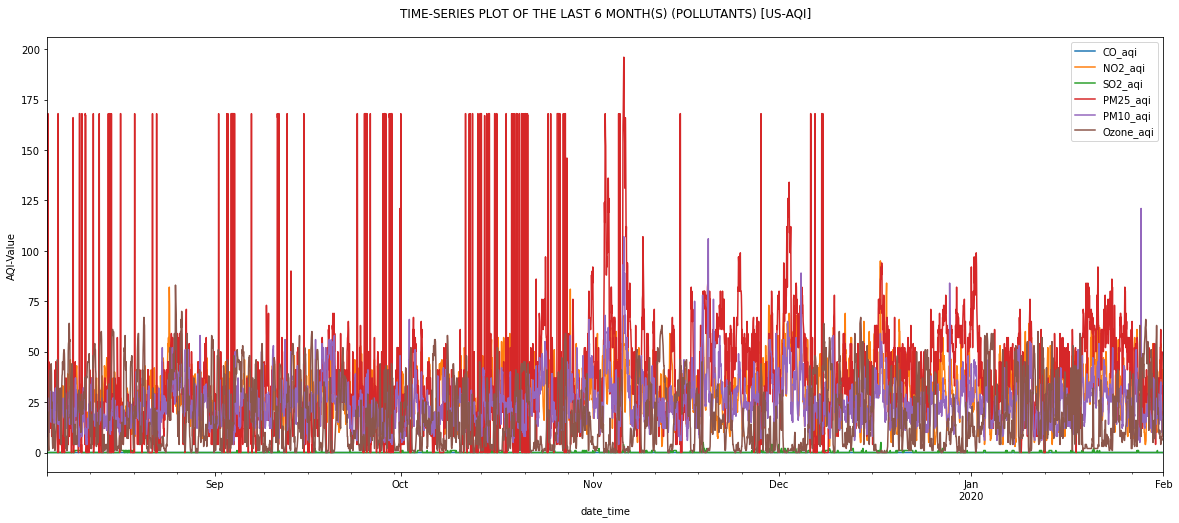

In [245]:
# Last 6 Months
plot_series_data(data=us_individual_pollutants, period='month', length=6, 
                 multi_variate=True, title="(Pollutants) [US-AQI]", reversed=True)

# UK-BASED AQI COMPUTATIONS

Calculations is based on UK-DAQI:
- [DAQI Website](https://uk-air.defra.gov.uk/air-pollution/)
- [Documentation](https://uk-air.defra.gov.uk/assets/documents/reports/cat14/1406191156_060618_Guide_to_UK_Air_Pollution_Information_Resources-issue_2-FINAL.pdf)

In [185]:
new_pollution_dataset_uk

Date_0    Time_1   CO        NO2      SO2       PM10  PM25  \
4      01/01/2010  01:00:00  0.2  69.000000  3.00000  69.000000   0.0   
5      01/01/2010  02:00:00  0.3  73.000000  0.00000  65.000000   0.0   
6      01/01/2010  03:00:00  0.2  73.000000  0.00000  43.000000   0.0   
7      01/01/2010  04:00:00  0.5  69.000000  0.00000  36.000000   0.0   
8      01/01/2010  05:00:00  0.3  73.000000  0.00000  33.000000   0.0   
...           ...       ...  ...        ...      ...        ...   ...   
88391   1/31/2020  20:00:00  0.0  85.200760  1.40223  14.500000   7.0   
88392   1/31/2020  21:00:00  0.0  77.818779  1.40223  13.500000   8.0   
88393   1/31/2020  22:00:00  0.0  73.426224  1.40223  19.299999   6.0   
88394   1/31/2020  23:00:00  0.0  65.285332  1.26201  20.299999   2.0   
88395   1/31/2020  24:00:00  0.0  50.838131  1.61256  13.500000   5.0   

          Ozone  
4      58.00000  
5      52.00000  
6      54.00000  
7      56.00000  
8      60.00000  
...         ...  
88391  12.87783  
88392  20.76424  
88393  17.86923  
88394  25.25651  
88395  31.94499  

[88392 rows x 8 columns]

**Dropping the CO pollutant since it is not captured in the UK-DAQI index computation**

In [186]:
new_pollution_dataset_uk.drop(columns='CO', inplace=True)

In [187]:
new_pollution_dataset_uk.head()

Date_0    Time_1   NO2  SO2  PM10  PM25  Ozone
4  01/01/2010  01:00:00  69.0  3.0  69.0   0.0   58.0
5  01/01/2010  02:00:00  73.0  0.0  65.0   0.0   52.0
6  01/01/2010  03:00:00  73.0  0.0  43.0   0.0   54.0
7  01/01/2010  04:00:00  69.0  0.0  36.0   0.0   56.0
8  01/01/2010  05:00:00  73.0  0.0  33.0   0.0   60.0

In [188]:
uk_aqi_lookup_df

o3    o3_revised      pm25_24  pm25_revised       pm10_24  \
0       (0, 33)       (0, 34)      (0, 11)       (0, 17)       (0, 16)   
1      (34, 66)      (35, 69)     (12, 23)      (18, 33)      (17, 33)   
2     (67, 100)     (70, 104)     (24, 35)      (34, 49)      (34, 50)   
3    (101, 120)    (105, 126)     (36, 41)      (50, 58)      (51, 58)   
4    (121, 140)    (127, 147)     (42, 47)      (59, 66)      (59, 66)   
5    (141, 160)    (148, 169)     (48, 53)      (67, 73)      (67, 75)   
6    (161, 187)    (170, 187)     (54, 58)      (74, 83)      (76, 83)   
7    (188, 213)    (188, 213)     (59, 64)      (84, 92)      (84, 91)   
8    (214, 240)    (214, 240)     (65, 70)     (93, 100)     (92, 100)   
9  (241, 10000)  (241, 10000)  (71, 10000)  (101, 10000)  (101, 10000)   

   pm10_revised            so2           no2  AQI    category  
0       (0, 22)        (0, 88)       (0, 67)    1       Low_1  
1      (23, 45)      (89, 177)     (68, 134)    2       Low_2  
2      (46, 67)     (178, 266)    (135, 200)    3       Low_3  
3      (68, 80)     (267, 354)    (201, 267)    4  Moderate_1  
4      (81, 93)     (355, 443)    (268, 334)    5  Moderate_2  
5     (94, 106)     (444, 532)    (335, 400)    6  Moderate_3  
6    (107, 130)     (533, 710)    (401, 467)    7      High_1  
7    (131, 153)     (711, 887)    (468, 534)    8      High_2  
8    (154, 176)    (888, 1064)    (535, 600)    9      High_3  
9  (177, 10000)  (1065, 10000)  (601, 10000)   10   Very_high

In [189]:
cols_map_uk = {'NO2':'no2', 'SO2':'so2', 'PM10':'pm10_revised', 'PM25':'pm25_revised', 'Ozone':'o3_revised'}

In [190]:
uk_computed_aqi_ds = pd.DataFrame()

for key,val in cols_map_uk.items():
    uk_computed_aqi_ds[f'{key}_aqi'] = new_pollution_dataset_uk[key].apply(
        lambda x: get_AQI_UK(x, colname=val, lookup_table=uk_aqi_lookup_df)["aqi_result"])
    print(f'Done for col: {key}')

Done for col: NO2
Done for col: SO2
Done for col: PM10
Done for col: PM25
Done for col: Ozone


In [191]:
uk_computed_aqi_ds.head()

NO2_aqi  SO2_aqi  PM10_aqi  PM25_aqi  Ozone_aqi
4        2        1         4         1          2
5        2        1         3         1          2
6        2        1         2         1          2
7        2        1         2         1          2
8        2        1         2         1          2

In [192]:
uk_target_label = uk_computed_aqi_ds.max(axis=1)
uk_aqi_category = uk_target_label.apply(lambda x: get_aqi_category_uk(x, lookup_table=uk_aqi_lookup_df))

## Merging the dataset based on UK-Based Computed AQI (DAQI)

In [193]:
uk_merged_pollution_dataset = pd.concat([new_pollution_dataset_uk, uk_computed_aqi_ds], axis=1)

# regulating Time value from 1-24hrs into 0-23hrs
uk_merged_pollution_dataset.Time_1 = uk_merged_pollution_dataset.Time_1.apply(regulate_time)

# Combining date and time fields as date_time
uk_merged_pollution_dataset['date_time'] = uk_merged_pollution_dataset.Date_0 + " " + uk_merged_pollution_dataset.Time_1
uk_merged_pollution_dataset.date_time = uk_merged_pollution_dataset.date_time.astype(np.datetime64)

# Adding the target label and category columns
uk_merged_pollution_dataset['target_label'] = uk_target_label
uk_merged_pollution_dataset['aqi_category'] = uk_aqi_category

In [194]:
uk_merged_pollution_dataset.date_time.head()

4   2010-01-01 01:00:00
5   2010-01-01 02:00:00
6   2010-01-01 03:00:00
7   2010-01-01 04:00:00
8   2010-01-01 05:00:00
Name: date_time, dtype: datetime64[ns]

In [195]:
uk_merged_pollution_dataset.head()

Date_0    Time_1   NO2  SO2  PM10  PM25  Ozone  NO2_aqi  SO2_aqi  \
4  01/01/2010  01:00:00  69.0  3.0  69.0   0.0   58.0        2        1   
5  01/01/2010  02:00:00  73.0  0.0  65.0   0.0   52.0        2        1   
6  01/01/2010  03:00:00  73.0  0.0  43.0   0.0   54.0        2        1   
7  01/01/2010  04:00:00  69.0  0.0  36.0   0.0   56.0        2        1   
8  01/01/2010  05:00:00  73.0  0.0  33.0   0.0   60.0        2        1   

   PM10_aqi  PM25_aqi  Ozone_aqi           date_time  target_label  \
4         4         1          2 2010-01-01 01:00:00             4   
5         3         1          2 2010-01-01 02:00:00             3   
6         2         1          2 2010-01-01 03:00:00             2   
7         2         1          2 2010-01-01 04:00:00             2   
8         2         1          2 2010-01-01 05:00:00             2   

  aqi_category  
4   Moderate_1  
5        Low_3  
6        Low_2  
7        Low_2  
8        Low_2

In [196]:
uk_merged_pollution_dataset.tail()

Date_0    Time_1        NO2      SO2       PM10  PM25     Ozone  \
88391  1/31/2020  20:00:00  85.200760  1.40223  14.500000   7.0  12.87783   
88392  1/31/2020  21:00:00  77.818779  1.40223  13.500000   8.0  20.76424   
88393  1/31/2020  22:00:00  73.426224  1.40223  19.299999   6.0  17.86923   
88394  1/31/2020  23:00:00  65.285332  1.26201  20.299999   2.0  25.25651   
88395  1/31/2020  00:00:00  50.838131  1.61256  13.500000   5.0  31.94499   

       NO2_aqi  SO2_aqi  PM10_aqi  PM25_aqi  Ozone_aqi           date_time  \
88391        2        1         1         1          1 2020-01-31 20:00:00   
88392        2        1         1         1          1 2020-01-31 21:00:00   
88393        2        1         1         1          1 2020-01-31 22:00:00   
88394        1        1         1         1          1 2020-01-31 23:00:00   
88395        1        1         1         1          1 2020-01-31 00:00:00   

       target_label aqi_category  
88391             2        Low_2  
88392             2        Low_2  
88393             2        Low_2  
88394             1        Low_1  
88395             1        Low_1

In [197]:
uk_merged_pollution_dataset.shape

(88392, 15)

In [198]:
uk_merged_pollution_dataset.columns

Index(['Date_0', 'Time_1', 'NO2', 'SO2', 'PM10', 'PM25', 'Ozone', 'NO2_aqi',
       'SO2_aqi', 'PM10_aqi', 'PM25_aqi', 'Ozone_aqi', 'date_time',
       'target_label', 'aqi_category'],
      dtype='object')

In [199]:
uk_merged_pollution_dataset = uk_merged_pollution_dataset[[
    'date_time', 'Date_0', 'Time_1', 'NO2', 'SO2', 'PM10', 'PM25', 'Ozone', 'NO2_aqi',
     'SO2_aqi', 'PM10_aqi', 'PM25_aqi', 'Ozone_aqi', 'target_label', 'aqi_category'
]]

uk_merged_pollution_dataset.set_index(keys='date_time', drop=True, inplace=True)

# Renaming Columns
uk_merged_pollution_dataset.rename(columns={'Date_0':'Date', 'Time_1':'Time'}, inplace=True)

In [200]:
uk_merged_pollution_dataset.head()

Date      Time   NO2  SO2  PM10  PM25  Ozone  \
date_time                                                                 
2010-01-01 01:00:00  01/01/2010  01:00:00  69.0  3.0  69.0   0.0   58.0   
2010-01-01 02:00:00  01/01/2010  02:00:00  73.0  0.0  65.0   0.0   52.0   
2010-01-01 03:00:00  01/01/2010  03:00:00  73.0  0.0  43.0   0.0   54.0   
2010-01-01 04:00:00  01/01/2010  04:00:00  69.0  0.0  36.0   0.0   56.0   
2010-01-01 05:00:00  01/01/2010  05:00:00  73.0  0.0  33.0   0.0   60.0   

                     NO2_aqi  SO2_aqi  PM10_aqi  PM25_aqi  Ozone_aqi  \
date_time                                                              
2010-01-01 01:00:00        2        1         4         1          2   
2010-01-01 02:00:00        2        1         3         1          2   
2010-01-01 03:00:00        2        1         2         1          2   
2010-01-01 04:00:00        2        1         2         1          2   
2010-01-01 05:00:00        2        1         2         1          2   

                     target_label aqi_category  
date_time                                       
2010-01-01 01:00:00             4   Moderate_1  
2010-01-01 02:00:00             3        Low_3  
2010-01-01 03:00:00             2        Low_2  
2010-01-01 04:00:00             2        Low_2  
2010-01-01 05:00:00             2        Low_2

## Saving a copy of the cleaned UK dataset

In [201]:
# Saving a copy of the cleaned dataset
uk_merged_pollution_dataset.index = pd.date_range(start='2010-01-01 01:00:0', end='2020-02-1 00:00:00',freq="H")
uk_merged_pollution_dataset.to_csv('cleaned_data/uk_merged_pollution_dataset.csv')

In [202]:
# Retrieving the saved Dataset
uk_merged_pollution_dataset = pd.read_csv('cleaned_data/uk_merged_pollution_dataset.csv', index_col=0, parse_dates=True)
uk_merged_pollution_dataset.head()

Date      Time   NO2  SO2  PM10  PM25  Ozone  \
2010-01-01 01:00:00  01/01/2010  01:00:00  69.0  3.0  69.0   0.0   58.0   
2010-01-01 02:00:00  01/01/2010  02:00:00  73.0  0.0  65.0   0.0   52.0   
2010-01-01 03:00:00  01/01/2010  03:00:00  73.0  0.0  43.0   0.0   54.0   
2010-01-01 04:00:00  01/01/2010  04:00:00  69.0  0.0  36.0   0.0   56.0   
2010-01-01 05:00:00  01/01/2010  05:00:00  73.0  0.0  33.0   0.0   60.0   

                     NO2_aqi  SO2_aqi  PM10_aqi  PM25_aqi  Ozone_aqi  \
2010-01-01 01:00:00        2        1         4         1          2   
2010-01-01 02:00:00        2        1         3         1          2   
2010-01-01 03:00:00        2        1         2         1          2   
2010-01-01 04:00:00        2        1         2         1          2   
2010-01-01 05:00:00        2        1         2         1          2   

                     target_label aqi_category  
2010-01-01 01:00:00             4   Moderate_1  
2010-01-01 02:00:00             3        Low_3  
2010-01-01 03:00:00             2        Low_2  
2010-01-01 04:00:00             2        Low_2  
2010-01-01 05:00:00             2        Low_2

In [203]:
uk_merged_pollution_dataset.tail()

Date      Time       NO2      SO2  PM10  PM25  \
2020-01-31 20:00:00  1/31/2020  20:00:00  85.20076  1.40223  14.5   7.0   
2020-01-31 21:00:00  1/31/2020  21:00:00  77.81878  1.40223  13.5   8.0   
2020-01-31 22:00:00  1/31/2020  22:00:00  73.42622  1.40223  19.3   6.0   
2020-01-31 23:00:00  1/31/2020  23:00:00  65.28533  1.26201  20.3   2.0   
2020-02-01 00:00:00  1/31/2020  00:00:00  50.83813  1.61256  13.5   5.0   

                        Ozone  NO2_aqi  SO2_aqi  PM10_aqi  PM25_aqi  \
2020-01-31 20:00:00  12.87783        2        1         1         1   
2020-01-31 21:00:00  20.76424        2        1         1         1   
2020-01-31 22:00:00  17.86923        2        1         1         1   
2020-01-31 23:00:00  25.25651        1        1         1         1   
2020-02-01 00:00:00  31.94499        1        1         1         1   

                     Ozone_aqi  target_label aqi_category  
2020-01-31 20:00:00          1             2        Low_2  
2020-01-31 21:00:00          1             2        Low_2  
2020-01-31 22:00:00          1             2        Low_2  
2020-01-31 23:00:00          1             1        Low_1  
2020-02-01 00:00:00          1             1        Low_1

# Visual Analysis


## Analyzing the Computed UK-DAQI for each pollutant across Manchester

In [204]:
uk_merged_pollution_dataset.index = pd.date_range(start='2010-01-01 01:00:0', end='2020-02-1 00:00:00',freq="H")
uk_merged_pollution_dataset.index.freq

<Hour>

In [208]:
uk_merged_pollution_dataset[uk_merged_pollution_dataset.columns[7:]].head()

NO2_aqi  SO2_aqi  PM10_aqi  PM25_aqi  Ozone_aqi  \
2010-01-01 01:00:00        2        1         4         1          2   
2010-01-01 02:00:00        2        1         3         1          2   
2010-01-01 03:00:00        2        1         2         1          2   
2010-01-01 04:00:00        2        1         2         1          2   
2010-01-01 05:00:00        2        1         2         1          2   

                     target_label aqi_category  
2010-01-01 01:00:00             4   Moderate_1  
2010-01-01 02:00:00             3        Low_3  
2010-01-01 03:00:00             2        Low_2  
2010-01-01 04:00:00             2        Low_2  
2010-01-01 05:00:00             2        Low_2

### Analyzing for the Entire Manchester

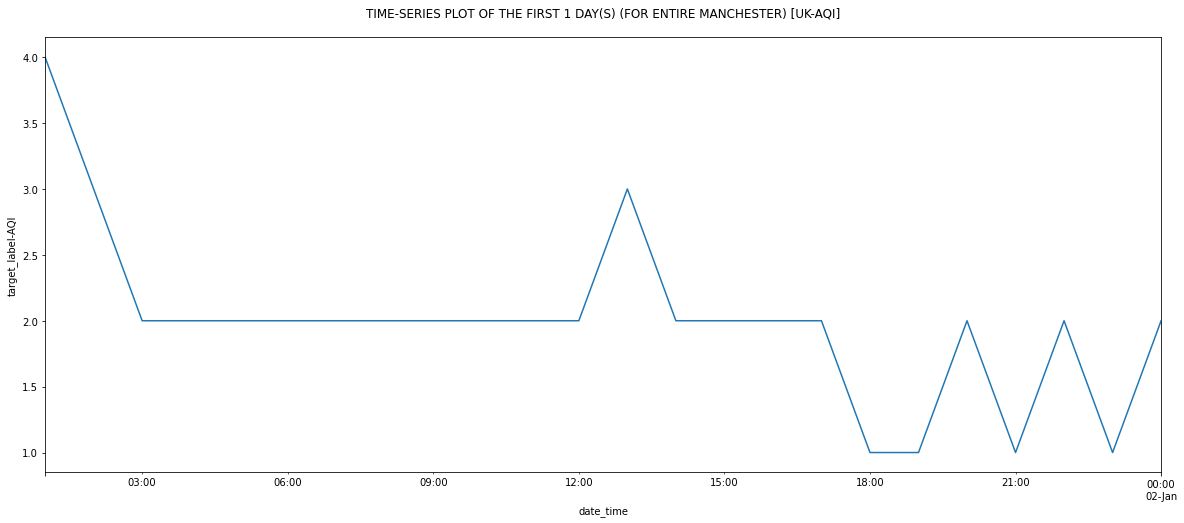

In [209]:
# First 1 Day for the Entire Manchester
plot_series_data(data=uk_merged_pollution_dataset.target_label, period='day', 
                 length=1, title='(FOR ENTIRE MANCHESTER) [UK-AQI]')

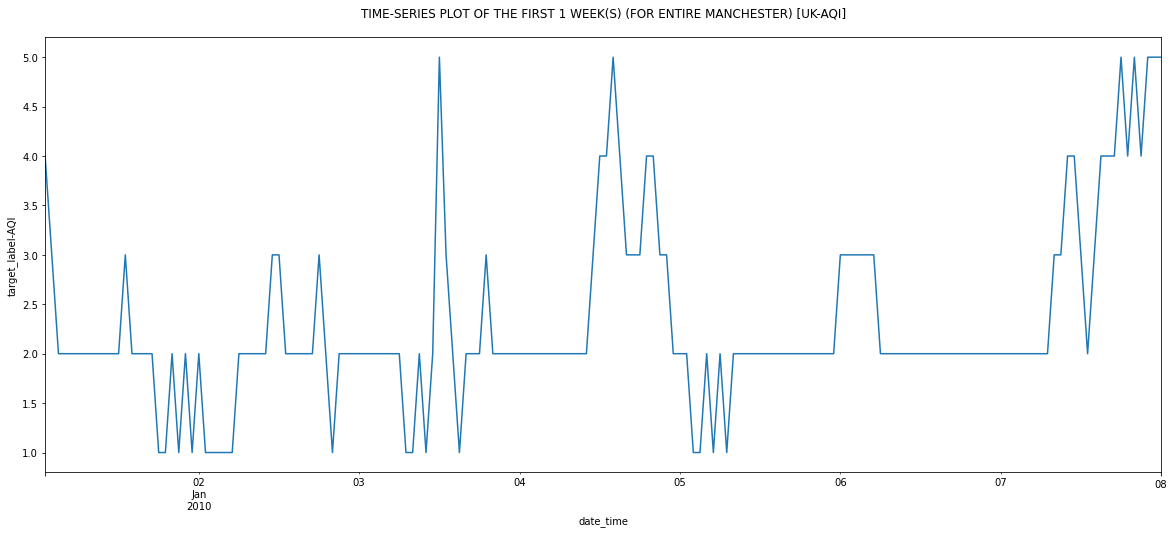

In [210]:
# First 1 Week for the Entire Manchester
plot_series_data(data=uk_merged_pollution_dataset.target_label, period='week', 
                 length=1, title='(FOR ENTIRE MANCHESTER) [UK-AQI]')

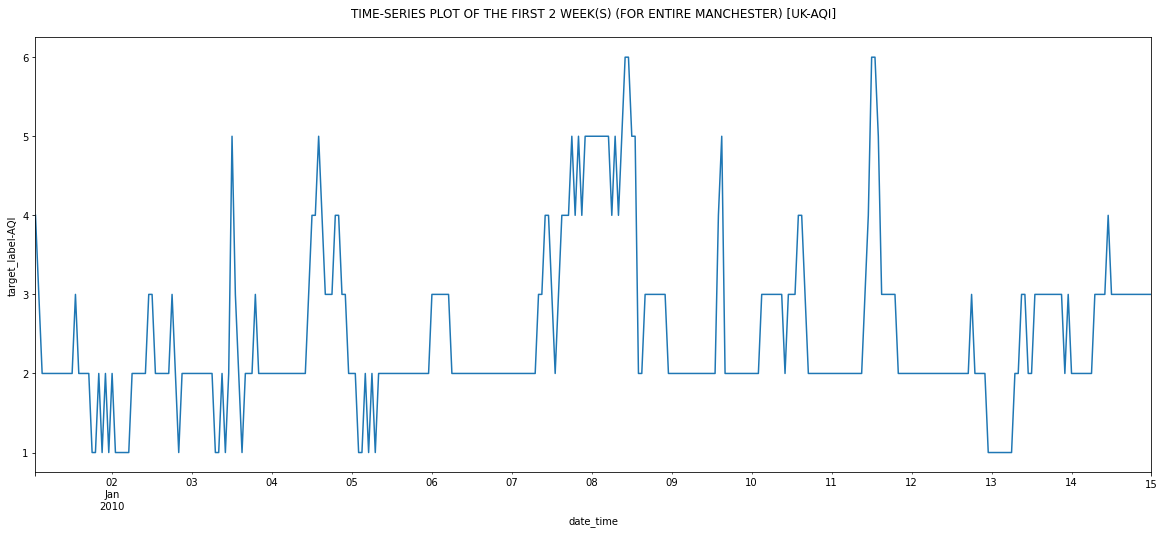

In [211]:
# First 2 Week for the Entire Manchester
plot_series_data(data=uk_merged_pollution_dataset.target_label, 
                 period='week', length=2, title='(FOR ENTIRE MANCHESTER) [UK-AQI]')

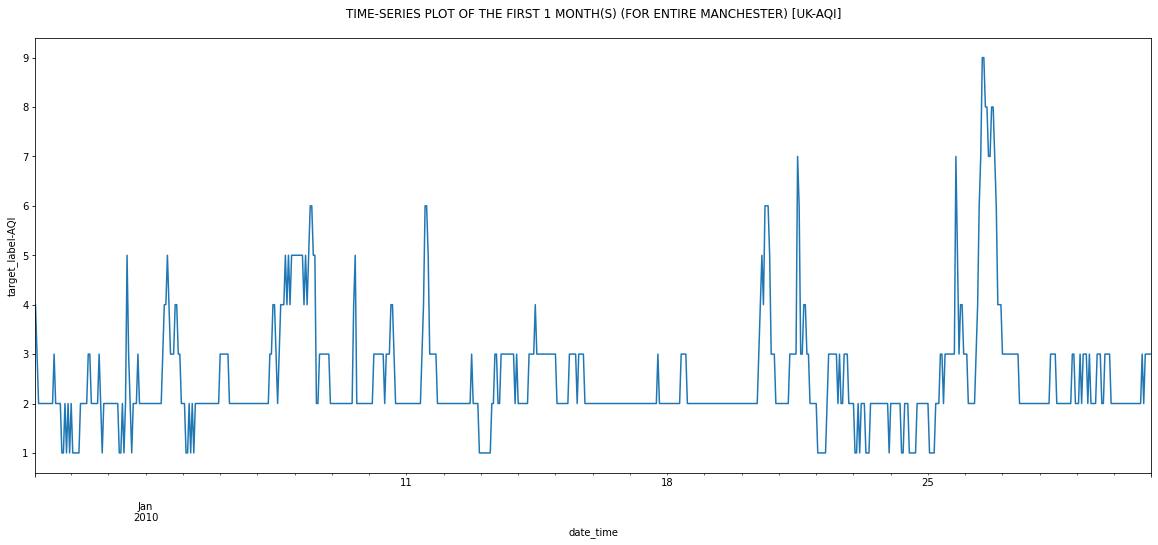

In [212]:
# First 1 Month for the Entire Manchester
plot_series_data(data=uk_merged_pollution_dataset.target_label, 
                 period='month', length=1, title='(FOR ENTIRE MANCHESTER) [UK-AQI]')

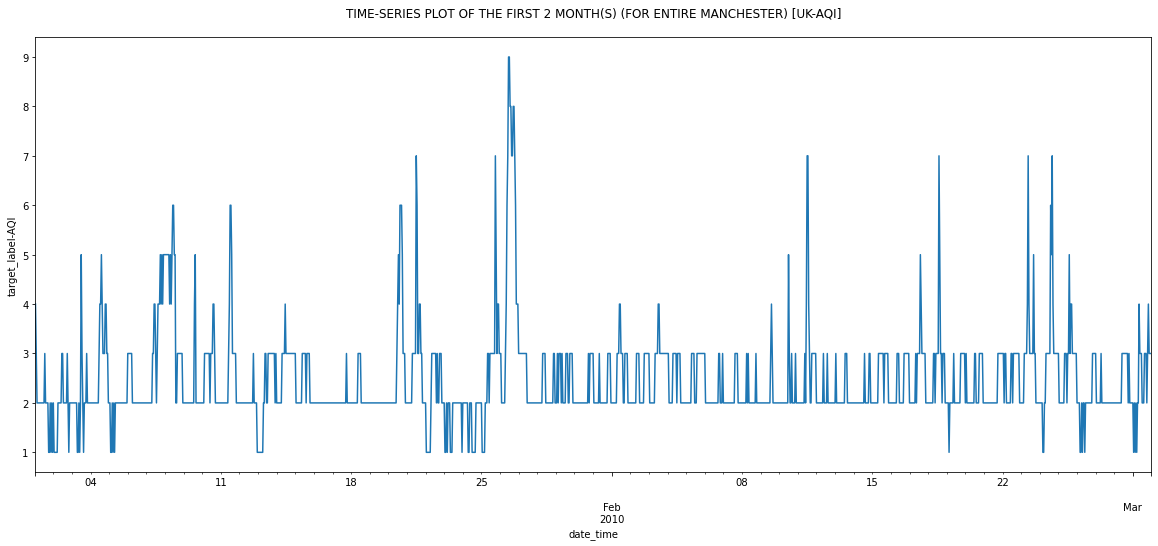

In [257]:
# First 2 Months for the Entire Manchester
plot_series_data(data=uk_merged_pollution_dataset.target_label, 
                 period='month', length=2, title='(FOR ENTIRE MANCHESTER) [UK-AQI]')

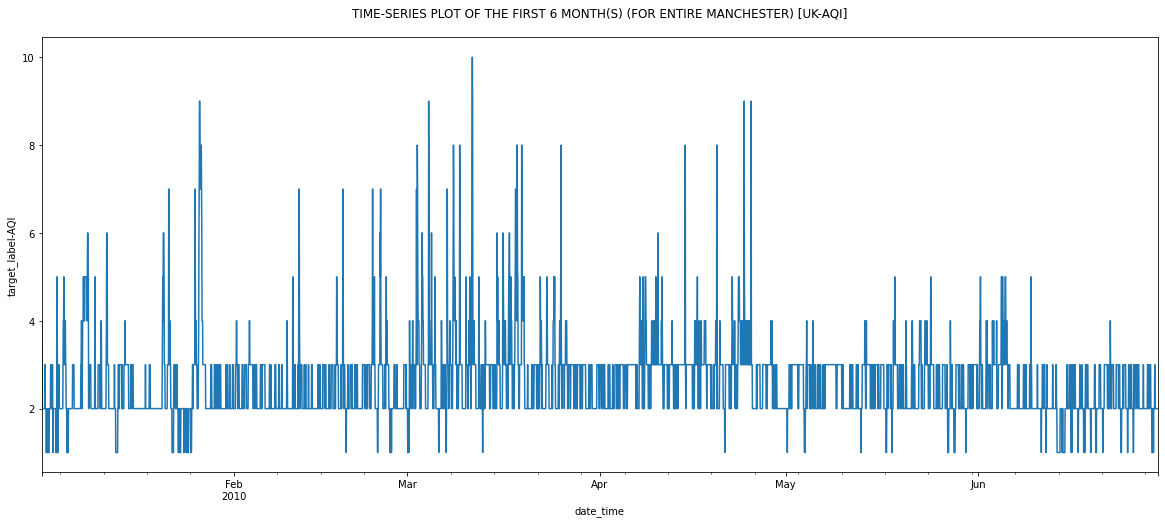

In [213]:
# First 6 Month for the Entire Manchester
plot_series_data(data=uk_merged_pollution_dataset.target_label, 
                 period='month', length=6, title='(FOR ENTIRE MANCHESTER) [UK-AQI]')

#### Recent Time

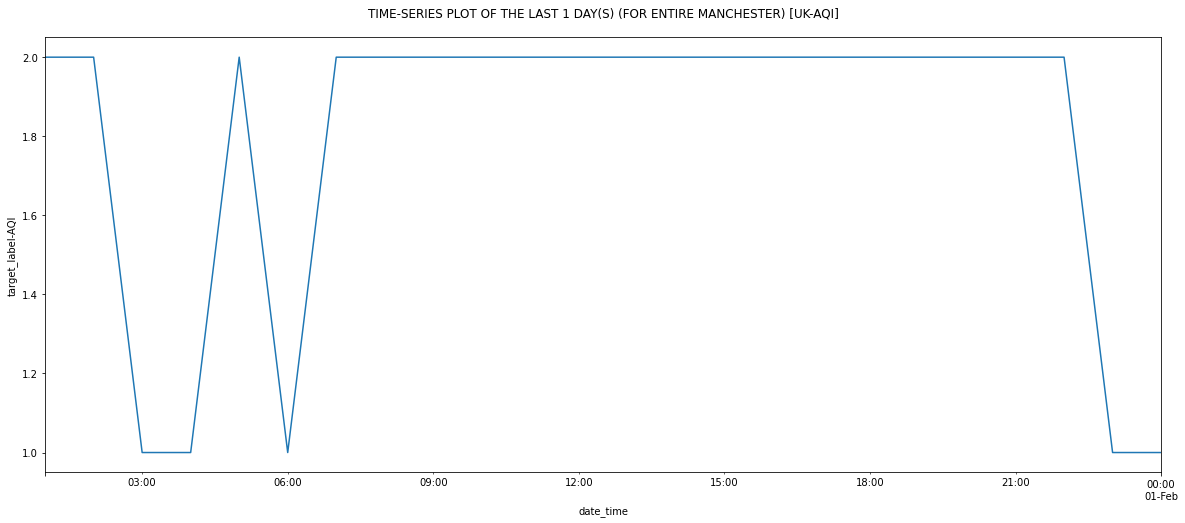

In [246]:
# Last 1 Day for the Entire Manchester
plot_series_data(data=uk_merged_pollution_dataset.target_label, period='day', 
                 length=1, title='(FOR ENTIRE MANCHESTER) [UK-AQI]', reversed=True)

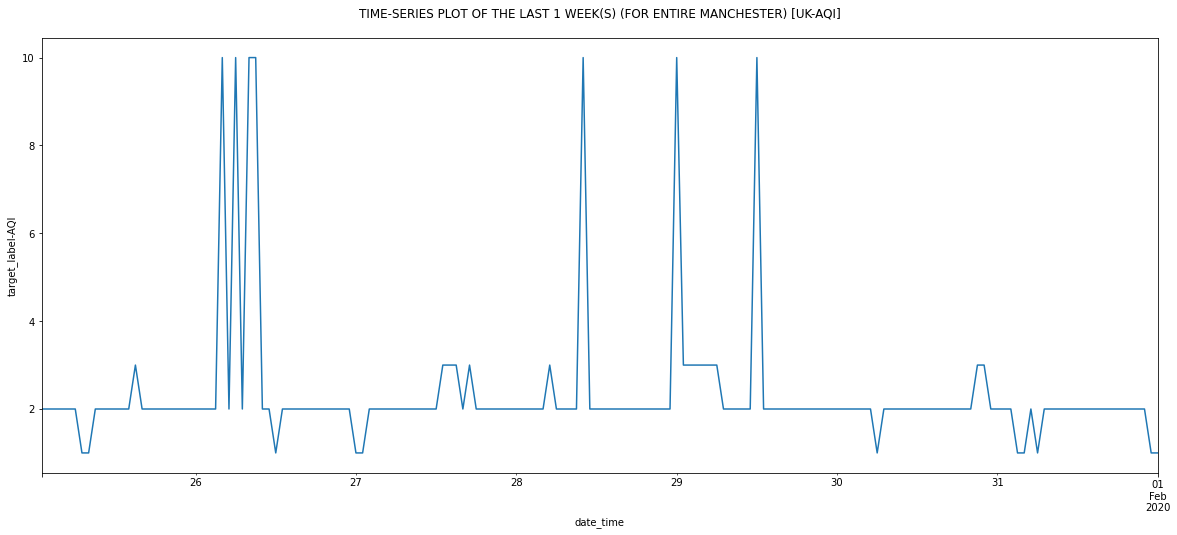

In [247]:
# Last 1 Week for the Entire Manchester
plot_series_data(data=uk_merged_pollution_dataset.target_label, period='week', 
                 length=1, title='(FOR ENTIRE MANCHESTER) [UK-AQI]', reversed=True)

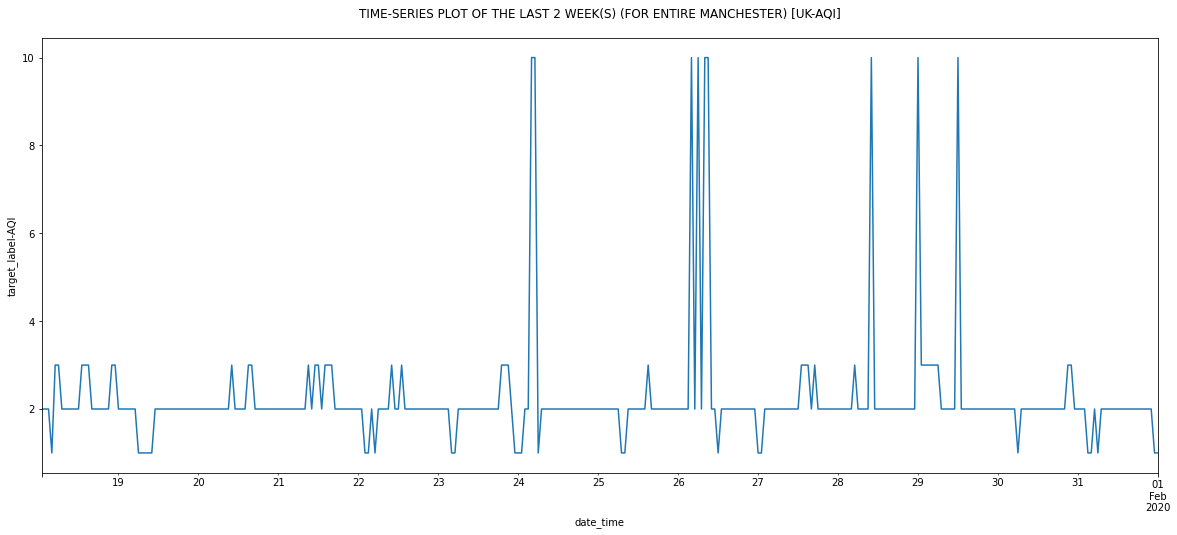

In [248]:
# Last 2 Weeks for the Entire Manchester
plot_series_data(data=uk_merged_pollution_dataset.target_label, period='week', 
                 length=2, title='(FOR ENTIRE MANCHESTER) [UK-AQI]', reversed=True)

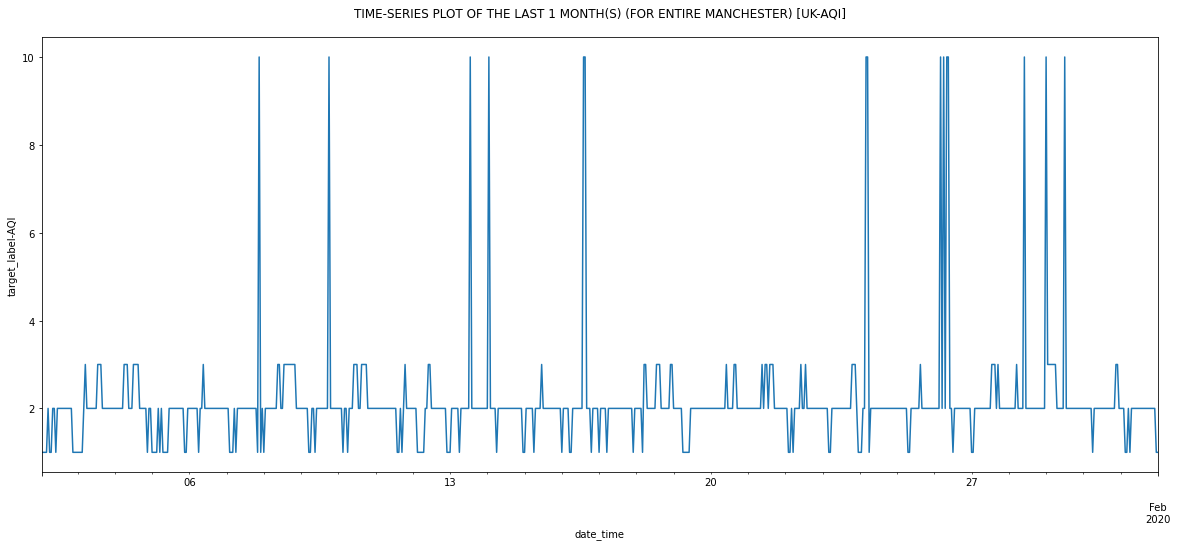

In [214]:
# Last 1 Month for the Entire Manchester
plot_series_data(data=uk_merged_pollution_dataset.target_label, period='month', 
                 length=1, title='(FOR ENTIRE MANCHESTER) [UK-AQI]', reversed=True)

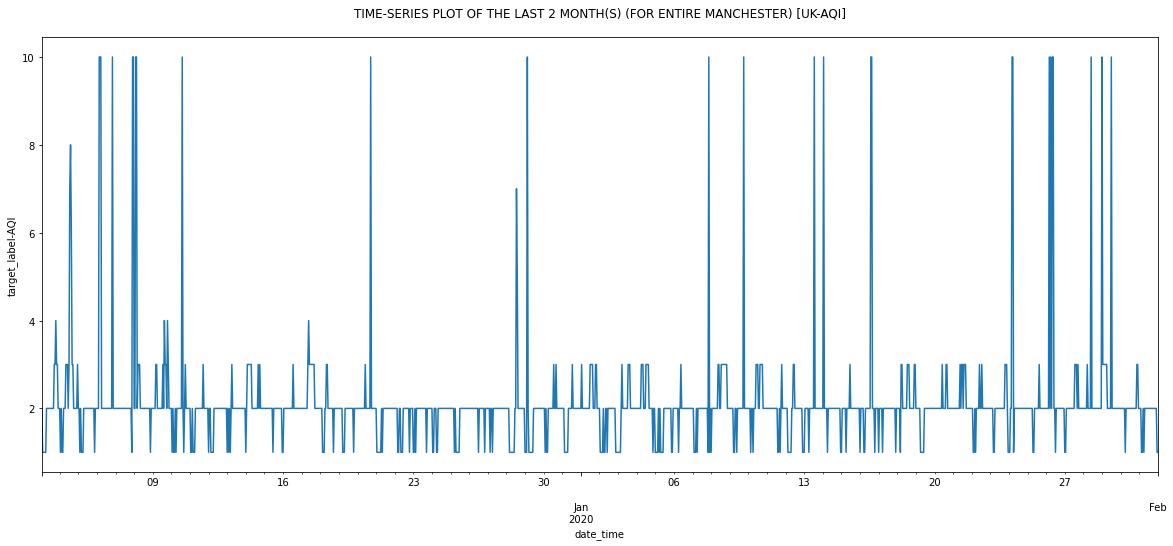

In [258]:
# Last 2 Months for the Entire Manchester
plot_series_data(data=uk_merged_pollution_dataset.target_label, period='month', 
                 length=2, title='(FOR ENTIRE MANCHESTER) [UK-AQI]', reversed=True)

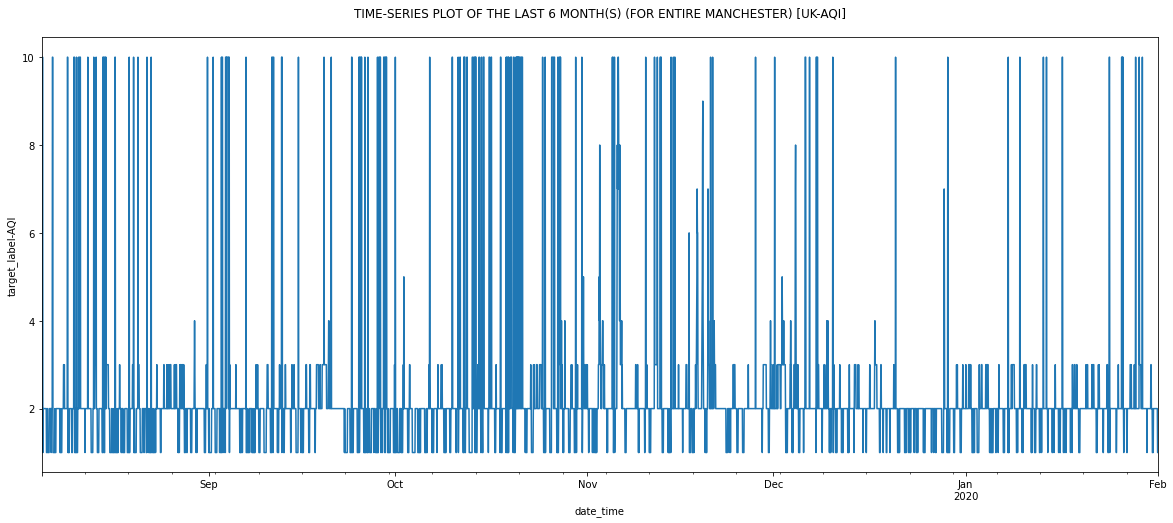

In [249]:
# Last 6 Months for the Entire Manchester
plot_series_data(data=uk_merged_pollution_dataset.target_label, period='month', 
                 length=6, title='(FOR ENTIRE MANCHESTER) [UK-AQI]', reversed=True)

### Analyzing for Individual Pollutant

In [217]:
uk_individual_pollutants = uk_merged_pollution_dataset[['NO2_aqi', 'SO2_aqi', 'PM25_aqi', 'PM10_aqi', 'Ozone_aqi']]

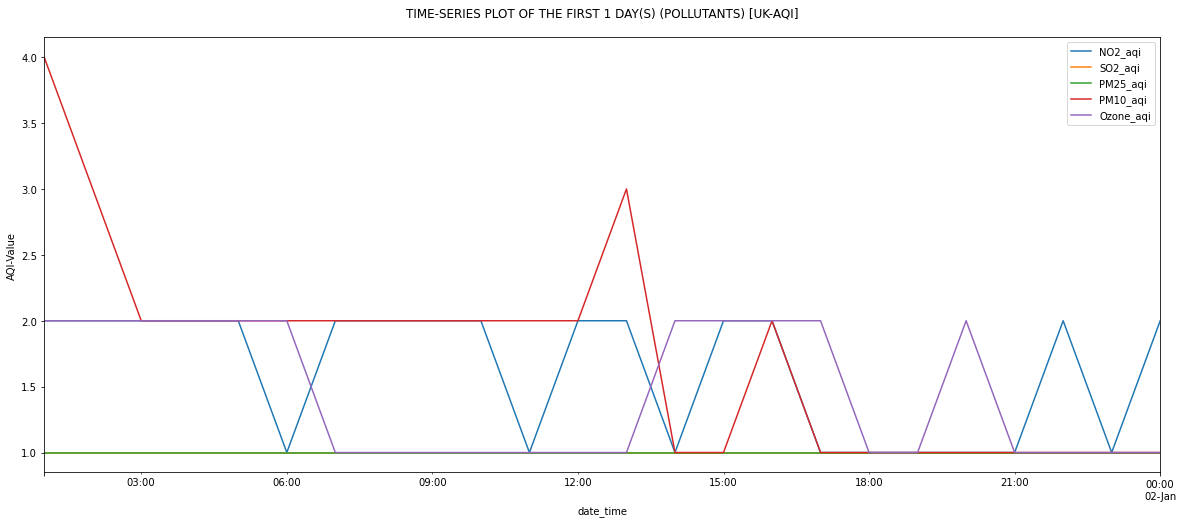

In [218]:
# First 1 Day
plot_series_data(data=uk_individual_pollutants, period='day', length=1, multi_variate=True, title="(Pollutants) [UK-AQI]")

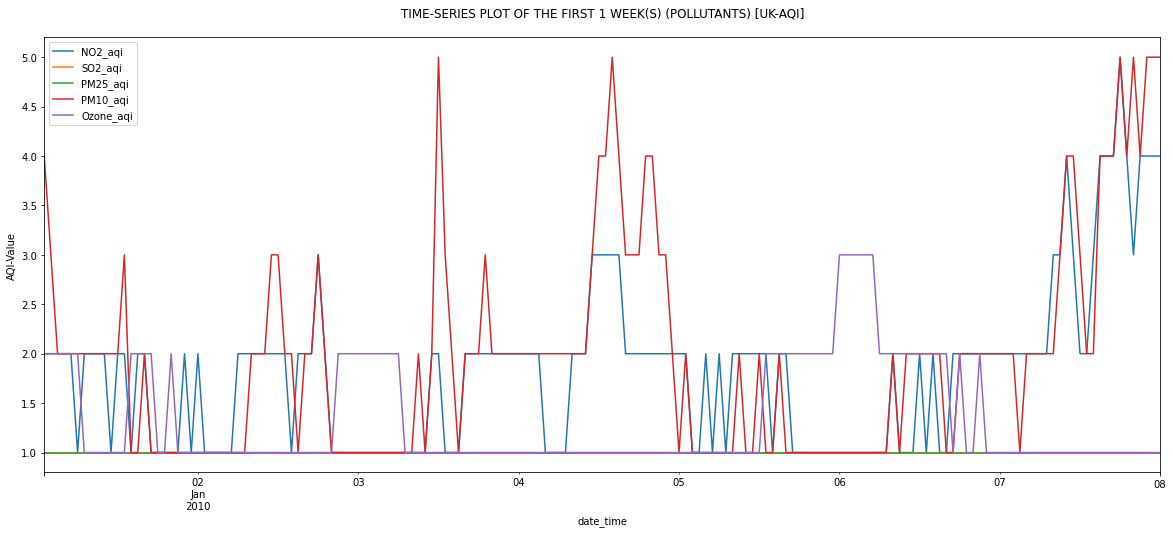

In [219]:
# First 1 Week
plot_series_data(data=uk_individual_pollutants, period='week', length=1, multi_variate=True, title="(Pollutants) [UK-AQI]")

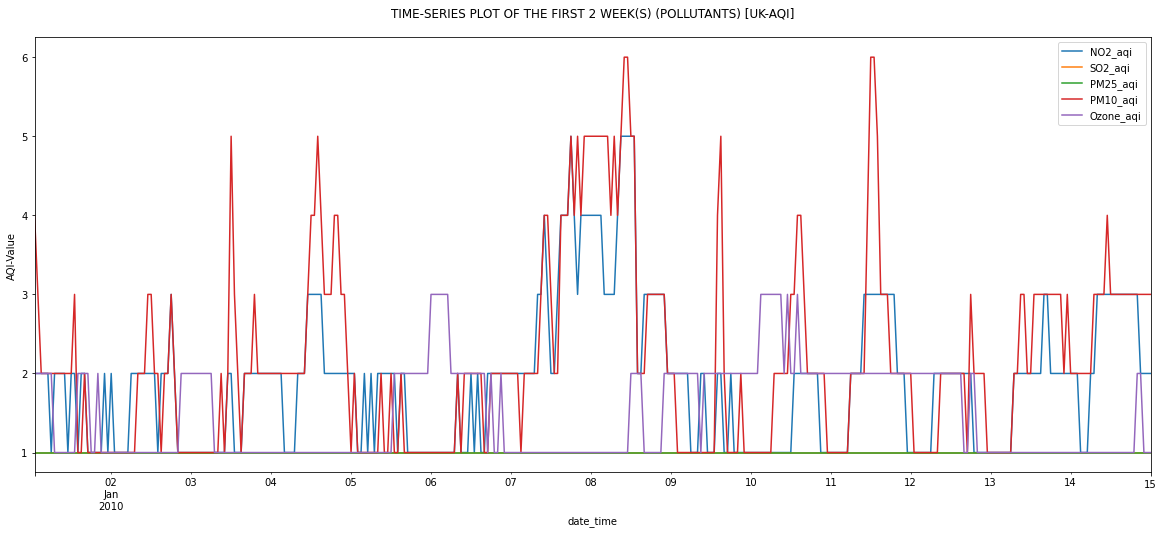

In [220]:
# First 2 Weeks
plot_series_data(data=uk_individual_pollutants, period='week', length=2, multi_variate=True, title="(Pollutants) [UK-AQI]")

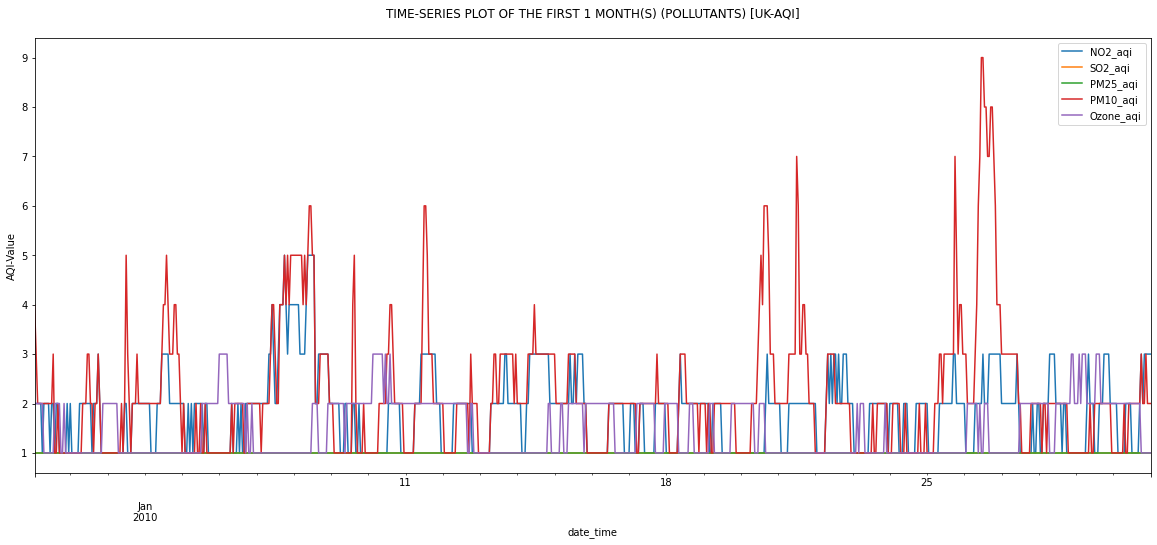

In [250]:
# First 1 Month
plot_series_data(data=uk_individual_pollutants, period='month', length=1, multi_variate=True, title="(Pollutants) [UK-AQI]")

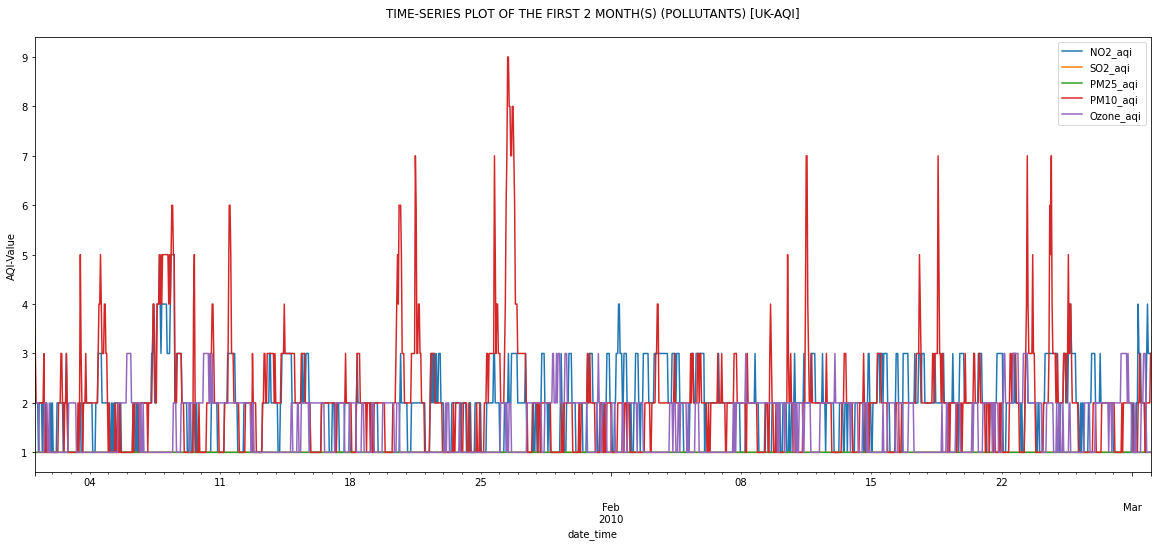

In [259]:
# First 2 Months
plot_series_data(data=uk_individual_pollutants, period='month', length=2, multi_variate=True, title="(Pollutants) [UK-AQI]")

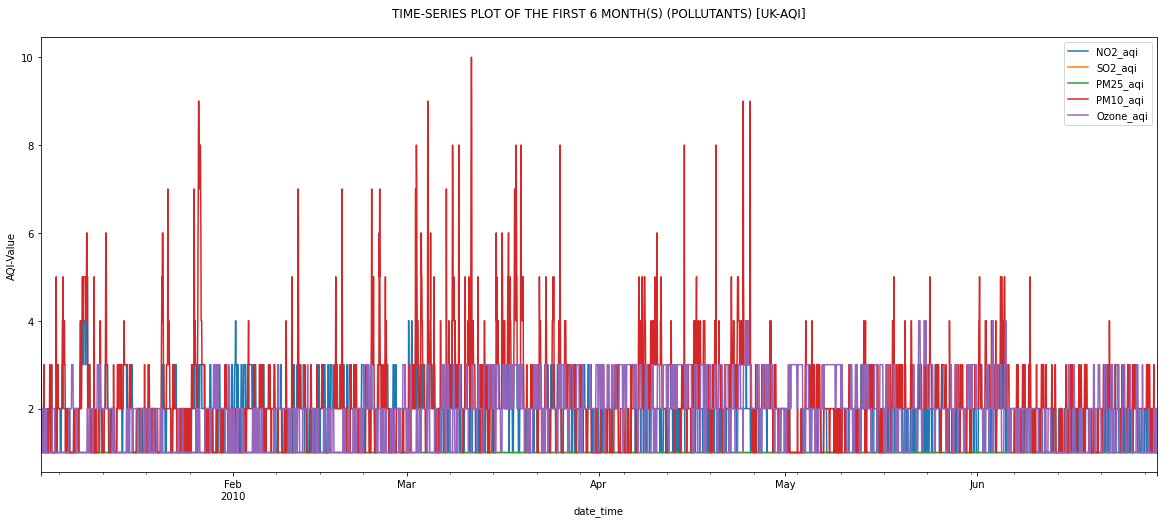

In [251]:
# First 6 Months
plot_series_data(data=uk_individual_pollutants, period='month', length=6, multi_variate=True, title="(Pollutants) [UK-AQI]")

#### Recent Times

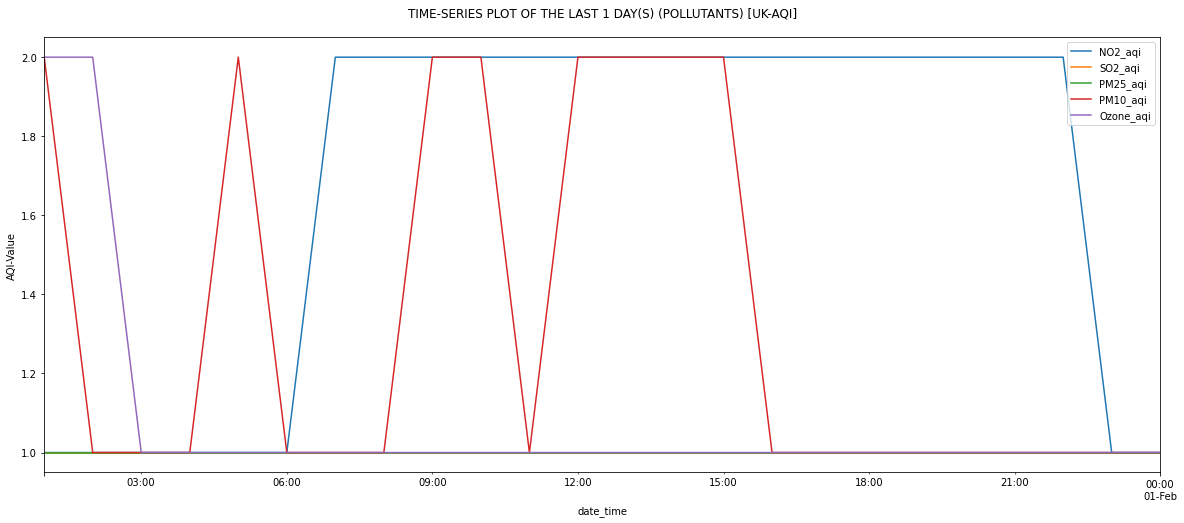

In [221]:
# Last 1 Day
plot_series_data(data=uk_individual_pollutants, period='day', length=1, 
                 multi_variate=True, title="(Pollutants) [UK-AQI]", reversed=True)

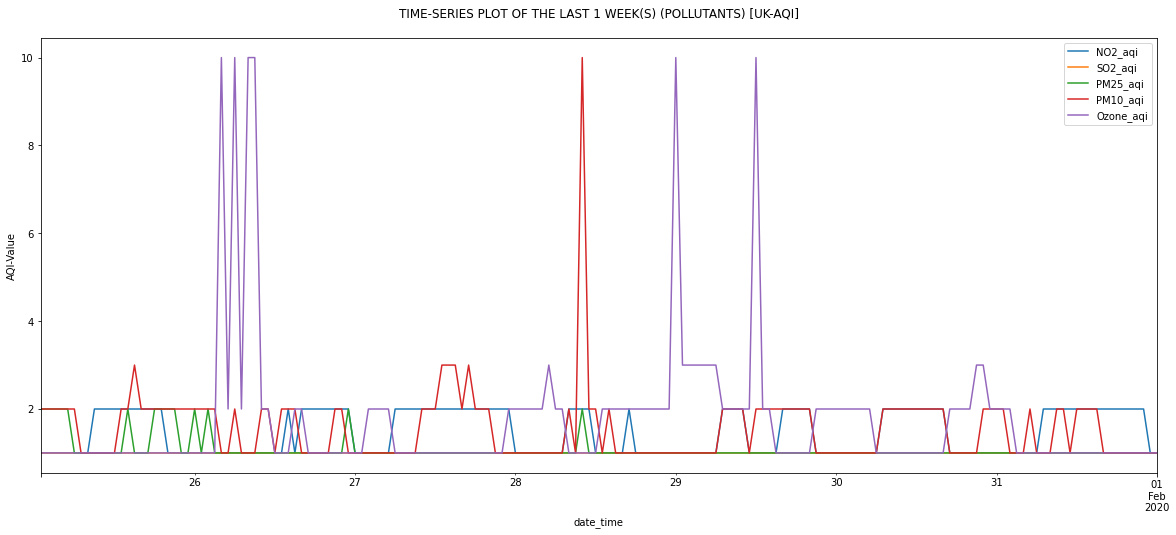

In [222]:
# Last 1 Week
plot_series_data(data=uk_individual_pollutants, period='week', length=1, 
                 multi_variate=True, title="(Pollutants) [UK-AQI]", reversed=True)

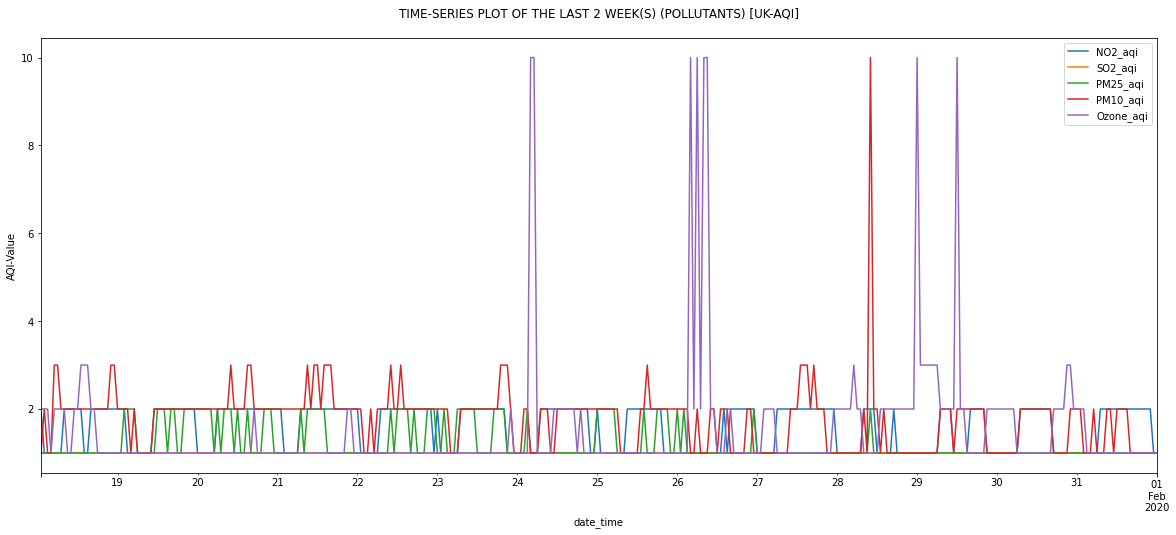

In [223]:
# Last 2 Weeks
plot_series_data(data=uk_individual_pollutants, period='week', length=2, 
                 multi_variate=True, title="(Pollutants) [UK-AQI]", reversed=True)

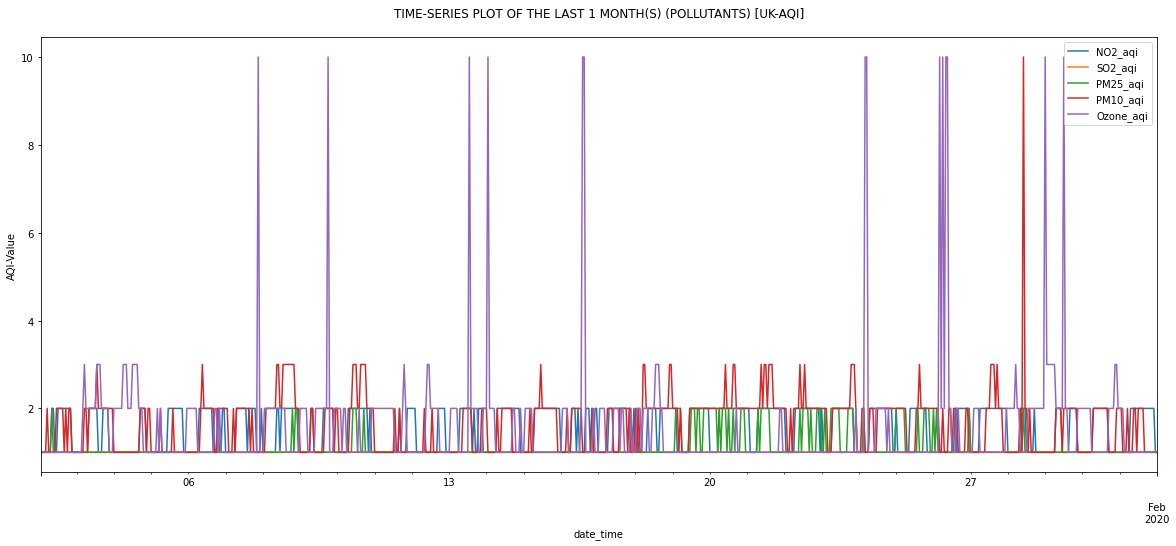

In [224]:
# Last 1 Month
plot_series_data(data=uk_individual_pollutants, period='month', length=1, 
                 multi_variate=True, title="(Pollutants) [UK-AQI]", reversed=True)

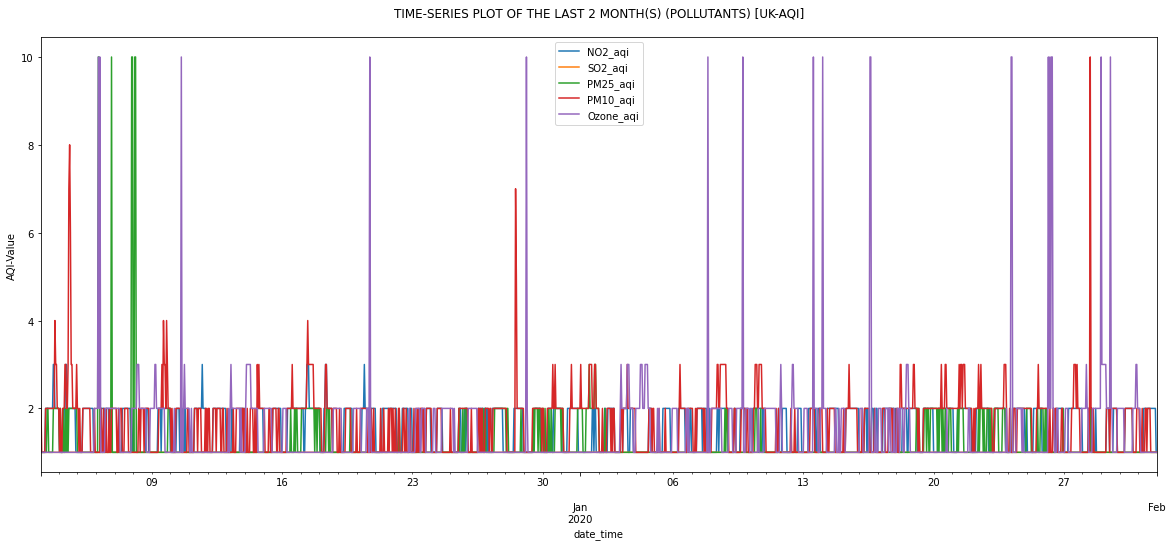

In [260]:
# Last 2 Months
plot_series_data(data=uk_individual_pollutants, period='month', length=2, 
                 multi_variate=True, title="(Pollutants) [UK-AQI]", reversed=True)

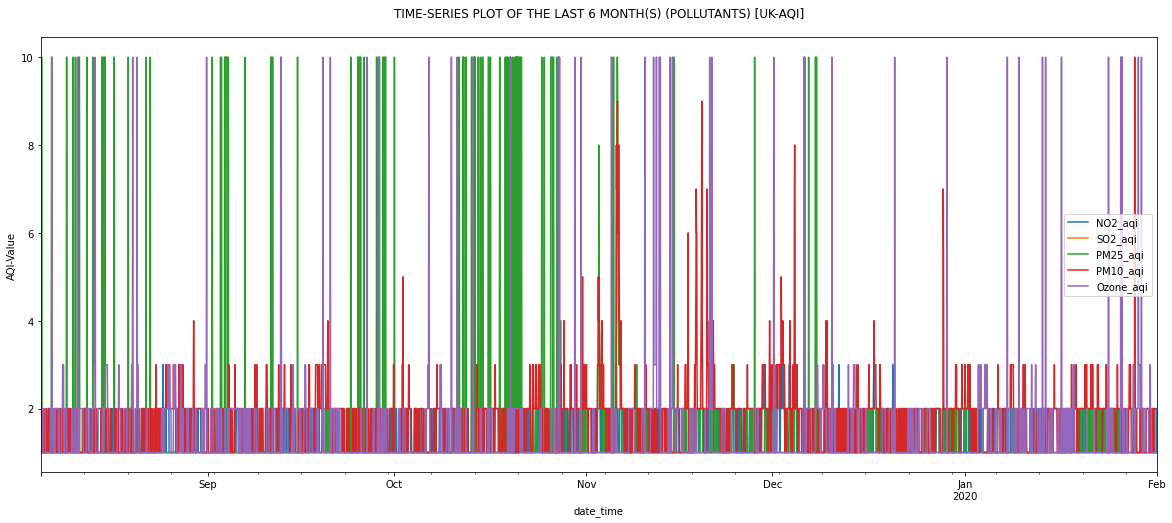

In [252]:
# Last 6 Months
plot_series_data(data=uk_individual_pollutants, period='month', length=6, 
                 multi_variate=True, title="(Pollutants) [UK-AQI]", reversed=True)

## Analyzing Air Pollution Rate for Manchester using US-AQI

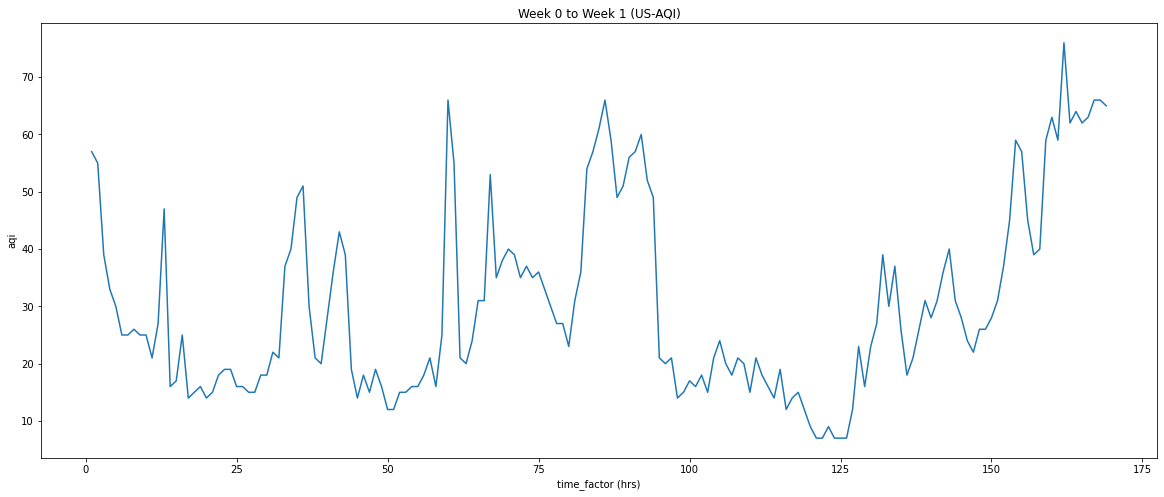

In [661]:
# 1 Week
plot_series(data=us_manchester, period='w', start=0, end=1, aqi_place='US')

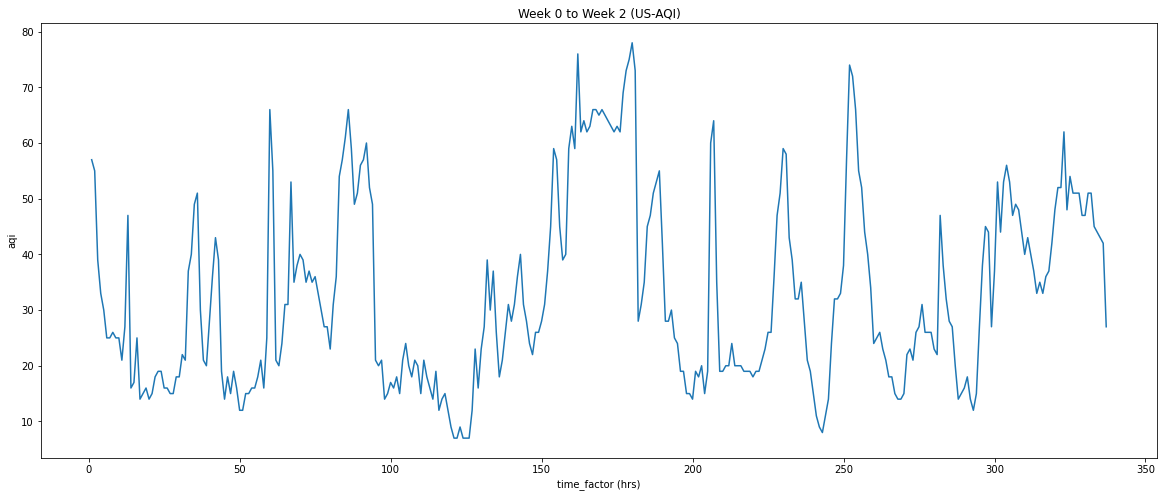

In [662]:
# 2 Week
plot_series(data=us_manchester, period='w', start=0, end=2, aqi_place='US')

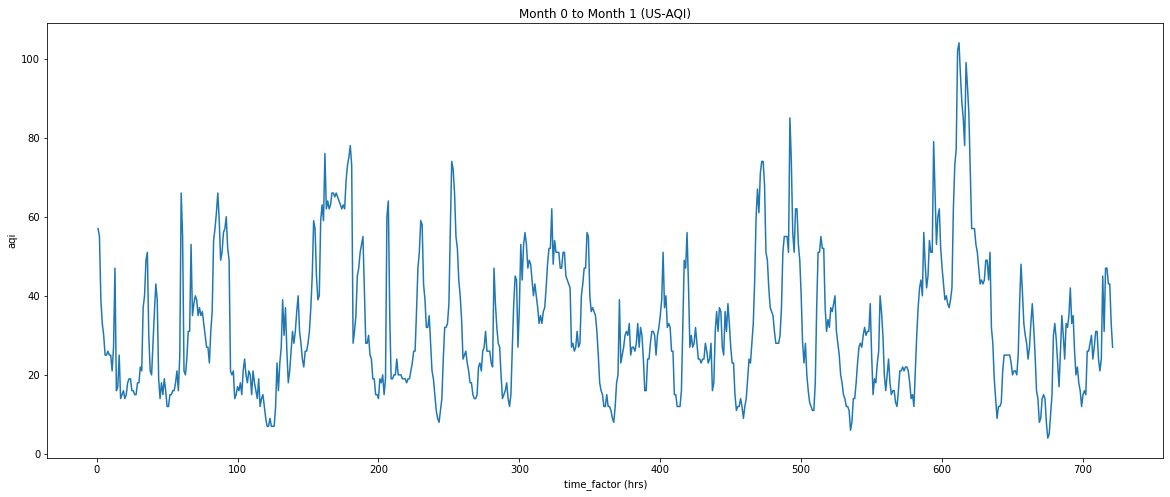

In [663]:
# 1 Month
plot_series(data=us_manchester, period='m', start=0, end=1, aqi_place='US')

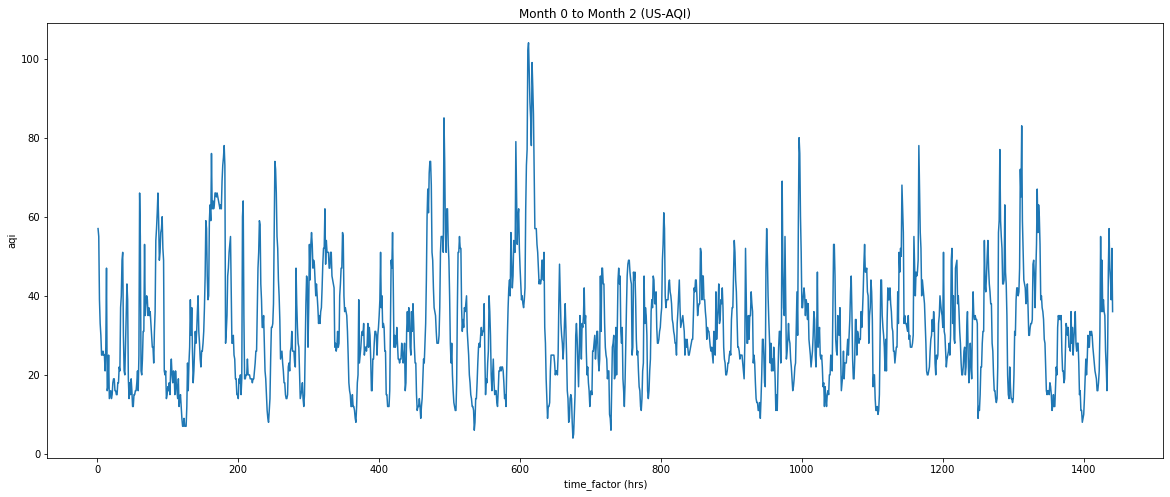

In [664]:
# 2 Months
plot_series(data=us_manchester, period='m', start=0, end=2, aqi_place='US')

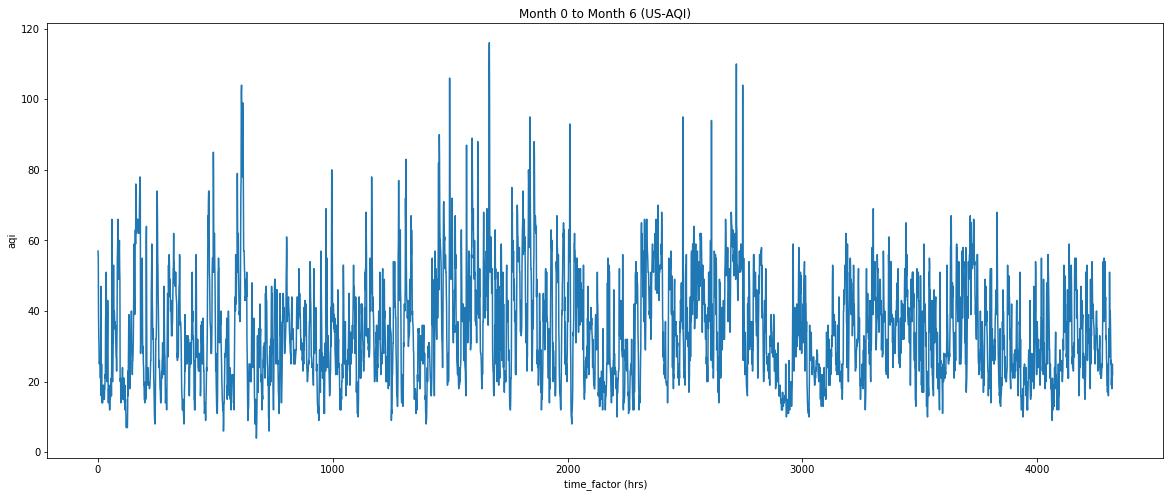

In [665]:
# 6 Months
plot_series(data=us_manchester, period='m', start=0, end=6, aqi_place='US')

## Recent Data Analysis

### UK-AQI

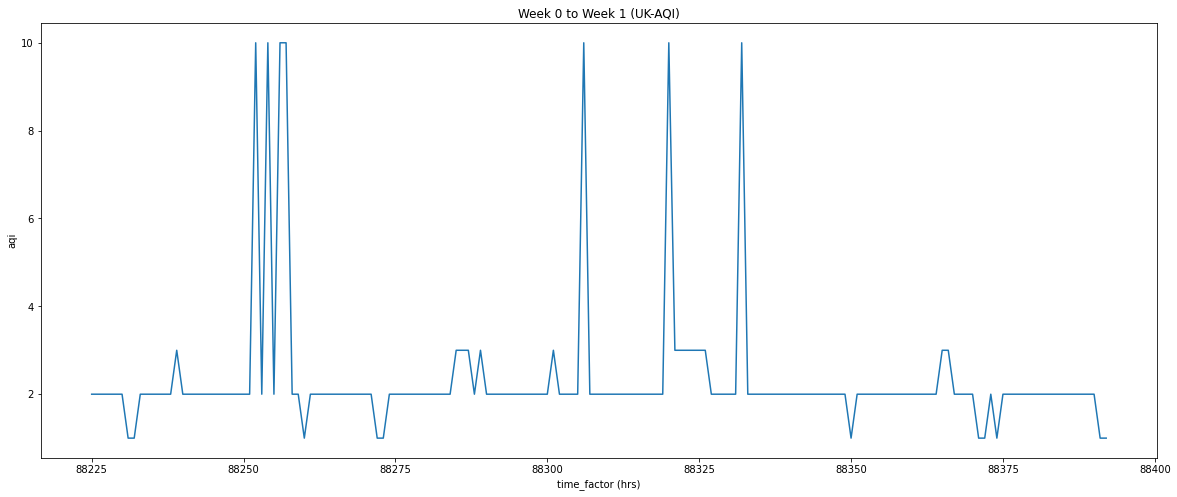

In [680]:
# Last Week

plot_series(data=uk_manchester[-(24 * 7):], period='w', start=0, end=1, aqi_place='UK')

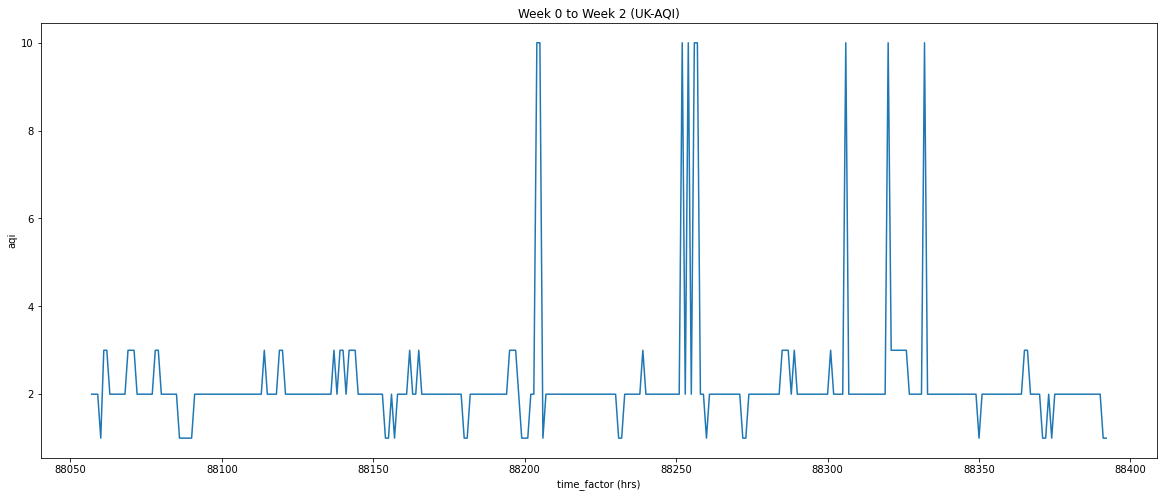

In [681]:
# Last 2 Week

plot_series(data=uk_manchester[-(24 * 7 * 2):], period='w', start=0, end=2, aqi_place='UK')

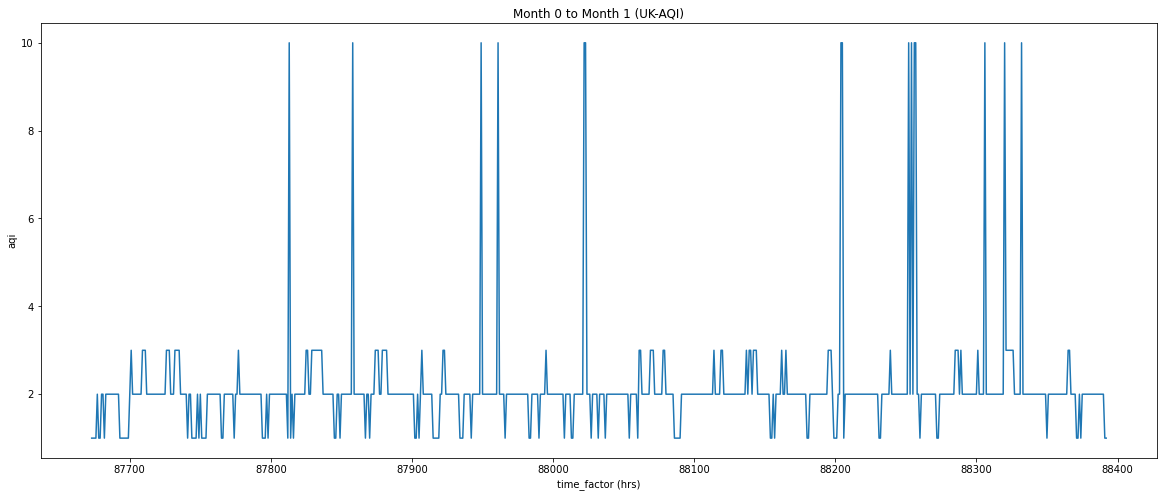

In [682]:
# Last Month

plot_series(data=uk_manchester[-(24 * 30):], period='m', start=0, end=1, aqi_place='UK')

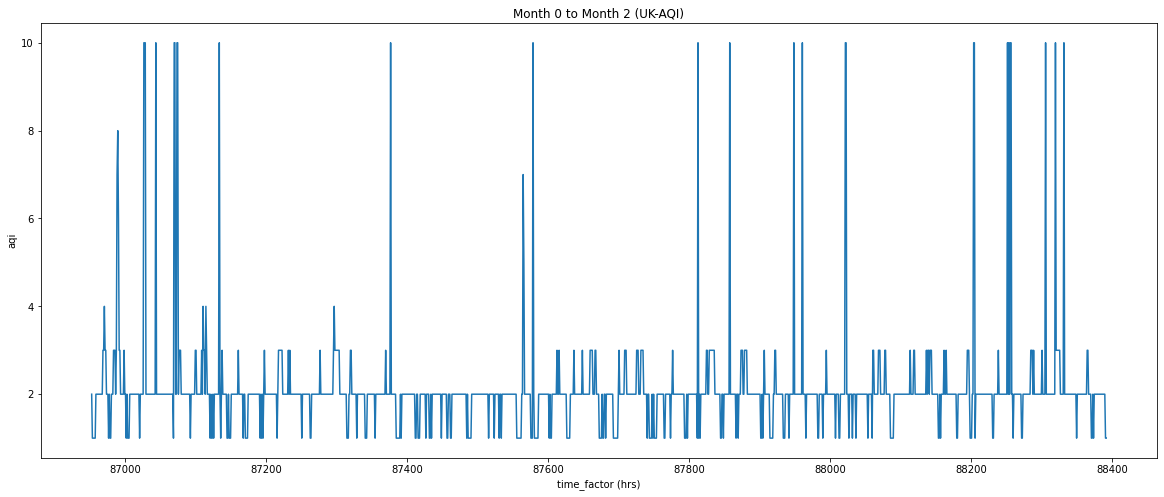

In [683]:
# Last two Months

plot_series(data=uk_manchester[-(24 * 30 * 2):], period='m', start=0, end=2, aqi_place='UK')

### US-AQI

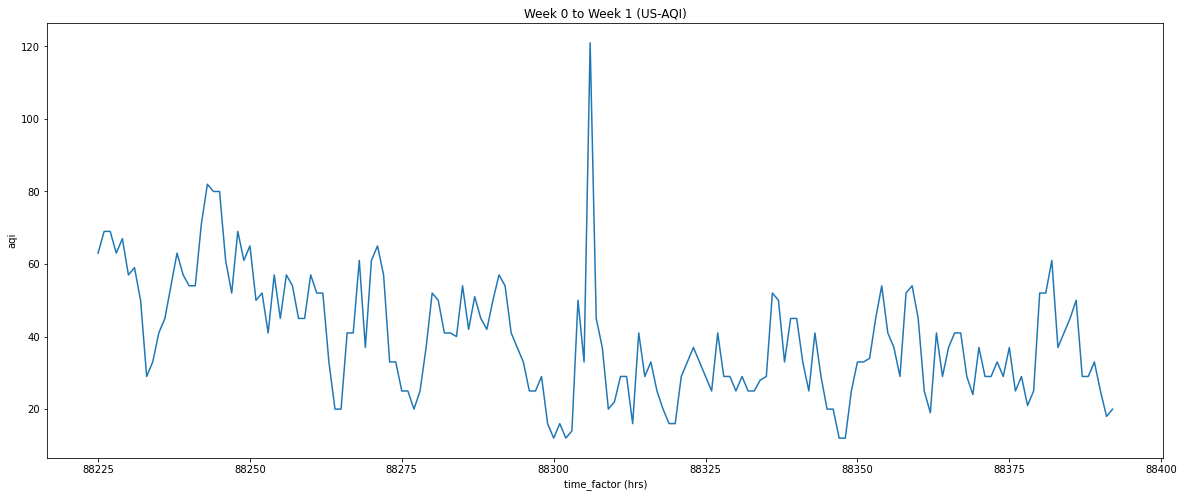

In [674]:
# Last Week

plot_series(data=us_manchester[-(24 * 7):], period='w', start=0, end=1, aqi_place='US')

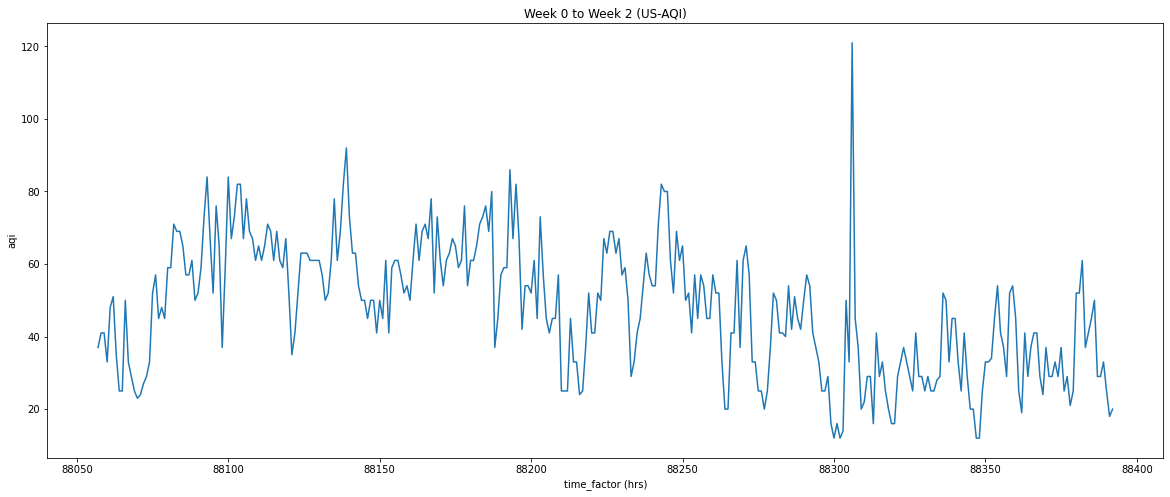

In [676]:
# Last 2 Week

plot_series(data=us_manchester[-(24 * 7 * 2):], period='w', start=0, end=2, aqi_place='US')

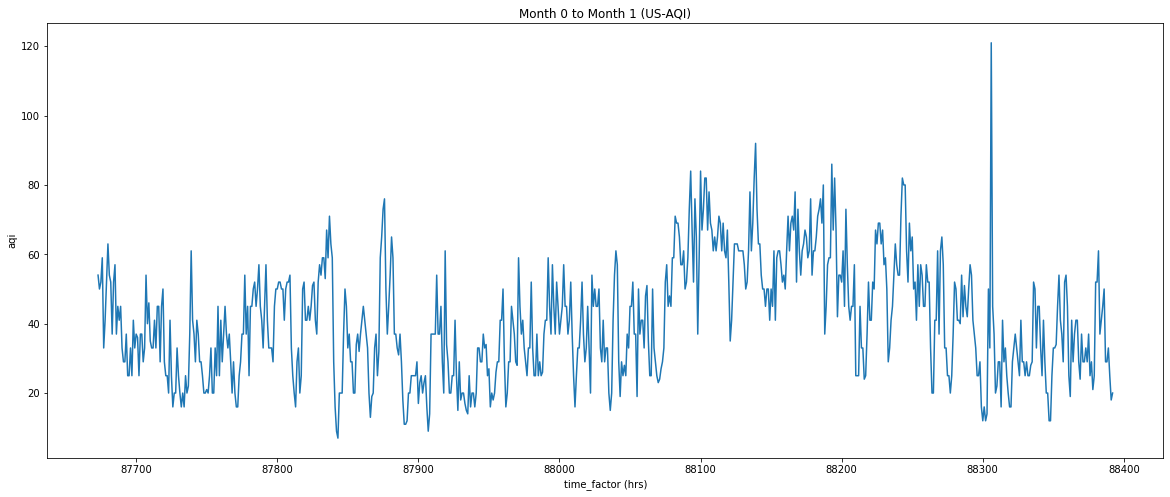

In [677]:
# Last Month

plot_series(data=us_manchester[-(24 * 30):], period='m', start=0, end=1, aqi_place='US')

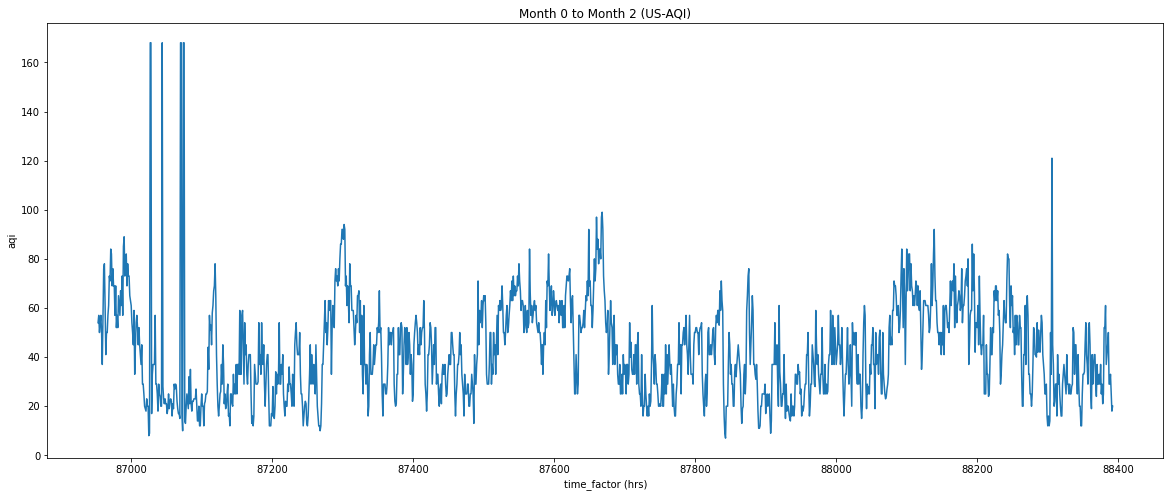

In [678]:
# Last two Months

plot_series(data=us_manchester[-(24 * 30 * 2):], period='m', start=0, end=2, aqi_place='US')

# MODELING AND FORECASTING

## ARIMA

In [278]:
!pip install pmdarima --user

  Using cached pmdarima-2.0.2-cp39-cp39-win_amd64.whl (572 kB)
  Using cached statsmodels-0.13.5-cp39-cp39-win_amd64.whl (9.2 MB)
  Using cached packaging-23.0-py3-none-any.whl (42 kB)


## UK-AQI

In [262]:
uk_data = uk_merged_pollution_dataset.target_label

In [263]:
print("Shape: {uk_data.shape}")
uk_data.head()

Shape: {uk_data.shape}


2010-01-01 01:00:00    4
2010-01-01 02:00:00    3
2010-01-01 03:00:00    2
2010-01-01 04:00:00    2
2010-01-01 05:00:00    2
Freq: H, Name: target_label, dtype: int64

<AxesSubplot:>

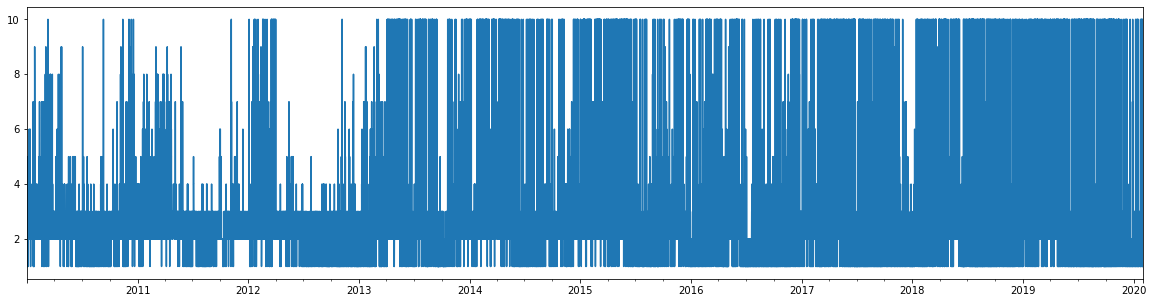

In [265]:
uk_data.plot(figsize=(20,5))

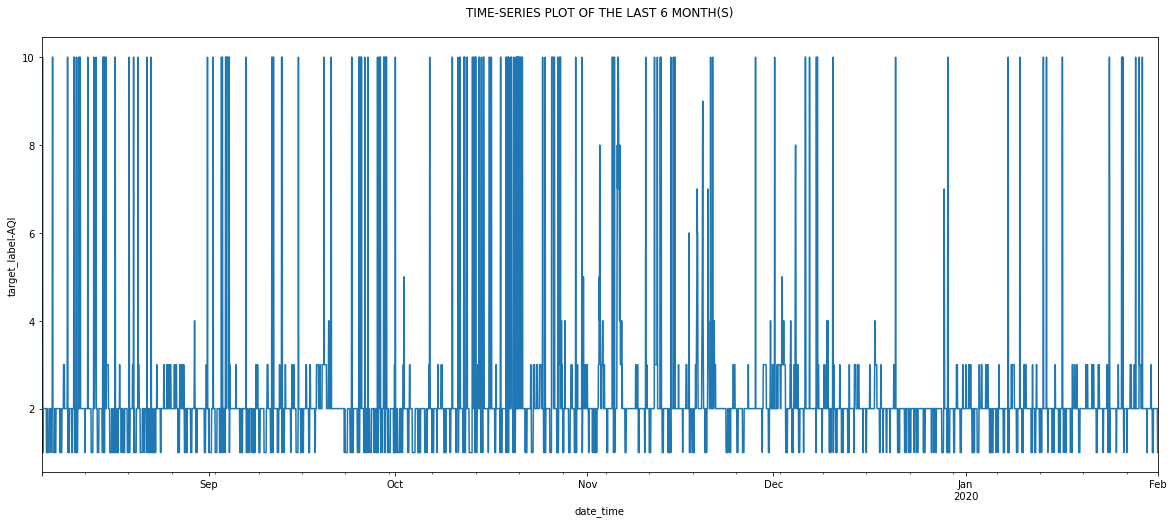

In [269]:
# Plotting the last 2 months
plot_series_data(uk_data, period='month', length=6, reversed=True)

### Testing the data for stationerity, using adfuller test

**NOTE: ARIMA Model requires that data be staionary**

In [271]:
from statsmodels.tsa.stattools import adfuller

In [274]:
def adfuller_test(data):
    results = adfuller(data, autolag='AIC')
    print(f'ADF : {results[0]}')
    print(f'P-value : {results[1]}')
    print(f'No of Lags : {results[2]}')
    print(f'No of observation used for the ADF Regression and Critical value computations : {results[3]}')
    print('Critical Values : ')
    
    for key,val in results[4].items():
        print(f'\t{key} : {val}')
    

In [275]:
adfuller_test(uk_data)

ADF : -25.377449806699165
P-value : 0.0
No of Lags : 66
No of observation used for the ADF Regression and Critical value computations : 88325
Critical Values : 
	1% : -3.4304240389477303
	5% : -2.861572724007266
	10% : -2.566787417852284


**CONCLUSION:**

- **The result of the 'adfuller' test above shows the p-value of less than 0.05, hence series is STATIONARY**

### Estimating the Order for ARIMA Model

In [279]:
from pmdarima import auto_arima

# Supressing harmless warning
import warnings
warnings.filterwarnings('ignore')


In [ ]:
stepwise_search = auto_arima(uk_data, trace=True, suppress_warnings=True, max_p=24, max_d=10, max_q=24)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=224.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=316896.557, Time=3.69 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=301428.475, Time=9.83 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=289767.799, Time=25.64 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=316894.557, Time=2.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=286015.143, Time=66.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=284675.868, Time=113.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=295366.607, Time=12.74 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=283972.882, Time=183.96 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=292798.661, Time=23.38 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=332.18 sec


### Segmenting data into Training and Testing sets

In [ ]:
size = 24 * 30 * 2  # two months
train_set = uk_data[:-size]
test_set = uk_data[-size:] # last two months

print(f"Shape of Original Data : {uk_data.shape}")
print(f"Shape of Training set : {train_set.shape}")
print(f"Shape of Original Data : {test_set.shape}")

### Training the model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
arima_model = ARIMA()